# 0. Import libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from itertools import combinations

from prince import MCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency, f_oneway, kruskal, ttest_ind
from statsmodels.stats.multitest import multipletests

from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from skmultilearn.adapt import MLkNN

# 1. Load, Transform, Prepare and explore the data
'productiveTime_Proposed_sport', 'productiveTime_Proposed_attitude, 'hobbies_mobilePhone', 'hobbies_Proposed_sport', 'alienPerson_Proposed_environment', 'vices_Proposed_leavingHome'

Group ['vices_Proposed_chocolate', 'vices_Proposed_sweet', 'vices_Proposed_eat']

In [156]:
# Load data
encuesta=pd.read_csv('Encuesta.csv')
columns=['temporalMark', 'PP_género', 'PP_edad', 'PP_estado_civil', 'PP_convivencia', 'PP_educación', 'PP_ocupación', 'PP_área', 'PP_dónde_vives', 'PP_zona', 'PP_tiempo_residencia', 'PP_sobre_ti', 'IND_individ_colect', 'IND_proyectos', 'IND_conflicto', 'IND_trabajo_equipo', 'IND_act_comunitarias', 'PUE_preferencias_entorno', 'PUE_rural_ciudad', 'PUE_rural_ciudad2', 'PUE_aire_libre', 'PUE_trabajos_agrícolas', 'PUE_alimmentación', 'PUE_ciudad_urbano', 'PUE_cultural_ciudad', 'PUE_ciudad_siempre', 'OBJ_zona_temperatura', 'OBJ_zona_clima', 'OBJ_zona_clima2', 'OBJ_zona_vivir', 'OBJ_zona_población', 'OBJ_zona_proximidad', 'TFM_espacios', 'TFM_actividades', 'TFM_compartir', 'TFM_compartir_no', 'TFM_muadrse', 'correo']
encuesta.columns = columns
encuesta.drop(['temporalMark'], axis=1, inplace=True)
print(encuesta.shape)
encuesta.head()

(76, 37)


PP_género        PP_edad             PP_estado_civil PP_convivencia   
0    Hombre          55-64  Separado/a // Divorciado/a           Solo  \
1     Mujer          55-64  Separado/a // Divorciado/a     En familia   
2    Hombre          25-34                   Soltero/a           Solo   
3     Mujer          55-64                   Soltero/a     En familia   
4    Hombre  65 años o más                    Casado/a      En pareja   

                  PP_educación   PP_ocupación   
0      Universitario/a (Grado)     Autónomo/a  \
1  Bachillerato / preparatoria     Jubilado/a   
2      Universitario/a (Grado)  Desempleado/a   
3      Universitario/a (Grado)     Jubilado/a   
4         Postgrado / Maestría     Jubilado/a   

                                             PP_área PP_dónde_vives   
0                                Ventas Construccion         Ciudad  \
1  Negocios, administración empresarial, emprendi...         Ciudad   
2                                       Arquitectura         Ciudad   
3  Humanidades y artes;Educación y pedagogía;Serv...         Ciudad   
4  Tecnología y computación;Salud y medicina;Nego...         Ciudad   

                                        PP_zona PP_tiempo_residencia  ...   
0                              Zona residencial             1-5 años  ...  \
1                              Zona residencial             1-5 años  ...   
2                              Zona residencial            6-10 años  ...   
3                              Zona residencial       Más de 10 años  ...   
4  Zona industrial o comercial;Zona residencial       Más de 10 años  ...   

  OBJ_zona_clima2                 OBJ_zona_vivir   
0            Seco                   Zona costera  \
1            Seco                   Zona costera   
2            Seco                Zona de montaña   
3          Húmedo  Zona de montaña;Zona forestal   
4      Cualquiera                  Zona forestal   

                   OBJ_zona_población        OBJ_zona_proximidad   
0  Medio (ciudad pequeña: Granollers)  Mucho (deben estar cerca)  \
1      Alto (ciudad media: Barcelona)                      Medio   
2      Alto (ciudad media: Barcelona)  Mucho (deben estar cerca)   
3  Medio (ciudad pequeña: Granollers)  Mucho (deben estar cerca)   
4      Alto (ciudad media: Barcelona)  Mucho (deben estar cerca)   

                                       TFM_espacios   
0         Dormitorio (dormir + otros);Cocina;Jardín  \
1  Dormitorio (dormir + otros);Cocina;Sala de estar   
2    Dormitorio (dormir + otros);Baño;Sala de estar   
3                       Cocina;Sala de estar;Jardín   
4  Dormitorio (dormir + otros);Sala de estar;Jardín   

                                     TFM_actividades TFM_compartir   
0  Cocinar;Descansar (no cuenta dormir por la noc...            No  \
1  Cocinar;Ver contenido multimedia;Descansar (no...            No   
2                           Ver contenido multimedia            No   
3  Leer;Cocinar;Ver contenido multimedia;Descansa...            No   
4  Leer;Reuniones sociales en el hogar;Descansar ...            No   

  TFM_compartir_no TFM_muadrse                          correo  
0              NaN          No                             NaN  
1              NaN          No  rosalba.loaiza.ayala@gmail.com  
2              NaN          No           juancid3103@gmail.com  
3              NaN          Si                             NaN  
4              NaN          No            medicamex@gmail.com   

[5 rows x 37 columns]

## 1.1 PP (Perfil personal)

### 1.1.1 PP_género_, XX_PP_edad, PP_estado_civil_, PP_convivencia_

PP_género
Mujer         48
Hombre        27
No binario     1
Name: count, dtype: int64

 (76, 40)


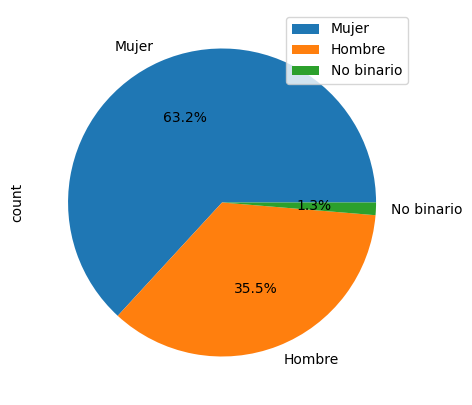

In [157]:
# PP_género_

# plot
print(encuesta['PP_género'].value_counts())
encuesta['PP_género'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(5,5))

# to binary
encuesta.loc[encuesta['PP_género']=="Mujer",'PP_género_Mujer']=1
encuesta['PP_género_Mujer']=encuesta['PP_género_Mujer'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_género']=="Hombre",'PP_género_Hombre']=1
encuesta['PP_género_Hombre']=encuesta['PP_género_Hombre'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_género']=="No binario",'PP_género_NB']=1
encuesta['PP_género_NB']=encuesta['PP_género_NB'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_género']=="Prefiero no decirlo",'PP_género_PND']=1
encuesta['PP_género_PND']=encuesta['PP_género_PND'].fillna(0).astype(int)

# Drop PP_género
encuesta.drop(['PP_género'], axis=1, inplace=True)
print("\n",encuesta.shape)

PP_edad
18-24            20
25-34            19
55-64            17
35-44             8
45-54             7
65 años o más     5
Name: count, dtype: int64

 (76, 40)


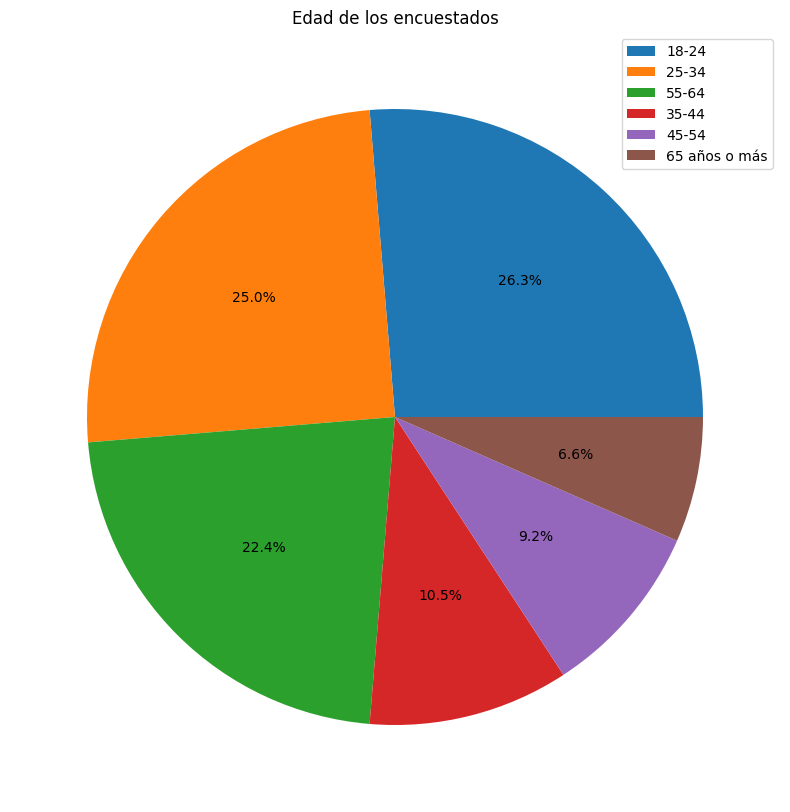

In [158]:
# XX_PP_edad

# plot
print(encuesta['PP_edad'].value_counts())
encuesta['PP_edad'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, title='Edad de los encuestados', labels=None, figsize=(10,10))
#PP_educación_total_pie=PP_educación_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='PP_educación_total_pie',figsize=(8, 8))
plt.ylabel('')

# to categorical
encuesta.loc[encuesta['PP_edad']=="Menos de 18 años",'PP_edadd']=0
encuesta.loc[encuesta['PP_edad']=="18-24",'PP_edadd']=1/6
encuesta.loc[encuesta['PP_edad']=="25-34",'PP_edadd']=2/6
encuesta.loc[encuesta['PP_edad']=="35-44",'PP_edadd']=3/6
encuesta.loc[encuesta['PP_edad']=="45-54",'PP_edadd']=4/6
encuesta.loc[encuesta['PP_edad']=="55-64",'PP_edadd']=5/6
encuesta.loc[encuesta['PP_edad']=="65 años o más",'PP_edadd']=1

# Drop PP_edad
encuesta.drop(['PP_edad'], axis=1, inplace=True)
encuesta.rename(columns={'PP_edadd':'XX_PP_edad'}, inplace=True)
print("\n",encuesta.shape)

PP_estado_civil
Soltero/a                     28
Casado/a                      27
En una relación               17
Separado/a // Divorciado/a     3
Viudo/a                        1
Name: count, dtype: int64

 (76, 44)


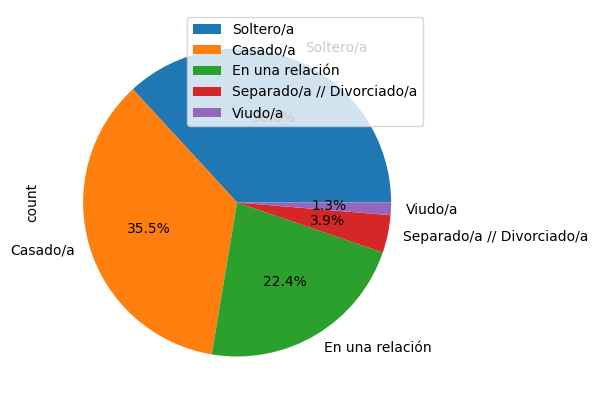

In [159]:
# PP_estado_civil_

# plot
print(encuesta['PP_estado_civil'].value_counts())
encuesta['PP_estado_civil'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(5,5))

# to binary
encuesta.loc[encuesta['PP_estado_civil']=="Soltero/a",'PP_estado_civil_soltero']=1
encuesta['PP_estado_civil_soltero']=encuesta['PP_estado_civil_soltero'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_estado_civil']=="Casado/a",'PP_estado_civil_Casado']=1
encuesta['PP_estado_civil_Casado']=encuesta['PP_estado_civil_Casado'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_estado_civil']=="En una relación",'PP_estado_civil_relación']=1
encuesta['PP_estado_civil_relación']=encuesta['PP_estado_civil_relación'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_estado_civil']=="Separado/a // Divorciado/a",'PP_estado_civil_separado']=1
encuesta['PP_estado_civil_separado']=encuesta['PP_estado_civil_separado'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_estado_civil']=="Viudo/a",'PP_estado_civil_viudo']=1
encuesta['PP_estado_civil_viudo']=encuesta['PP_estado_civil_viudo'].fillna(0).astype(int)

# Drop PP_estado_civil
encuesta.drop(['PP_estado_civil'], axis=1, inplace=True)
print("\n",encuesta.shape)

PP_convivencia
En familia             34
En pareja              14
Solo                    9
Vivo con mis padres     9
Con amigos              8
Otro                    1
Vivo en comunidad       1
Name: count, dtype: int64

 (76, 50)


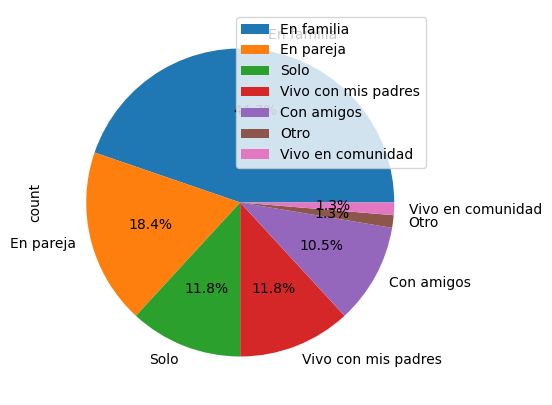

In [160]:
# PP_convivencia_

# plot
print(encuesta['PP_convivencia'].value_counts())
encuesta['PP_convivencia'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(5,5))

# to binary
encuesta.loc[encuesta['PP_convivencia']=="En familia",'PP_convivencia_familia']=1
encuesta['PP_convivencia_familia']=encuesta['PP_convivencia_familia'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_convivencia']=="En pareja",'PP_convivencia_pareja']=1
encuesta['PP_convivencia_pareja']=encuesta['PP_convivencia_pareja'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_convivencia']=="Solo",'PP_convivencia_solo']=1
encuesta['PP_convivencia_solo']=encuesta['PP_convivencia_solo'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_convivencia']=="Vivo con mis padres",'PP_convivencia_padres']=1
encuesta['PP_convivencia_padres']=encuesta['PP_convivencia_padres'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_convivencia']=="Con amigos",'PP_convivencia_amigos']=1
encuesta['PP_convivencia_amigos']=encuesta['PP_convivencia_amigos'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_convivencia']=="Otro",'PP_convivencia_otro']=1
encuesta['PP_convivencia_otro']=encuesta['PP_convivencia_otro'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_convivencia']=="Vivo en comunidad",'PP_convivencia_comunidad']=1
encuesta['PP_convivencia_comunidad']=encuesta['PP_convivencia_comunidad'].fillna(0).astype(int)

# Drop PP_convivencia
encuesta.drop(['PP_convivencia'], axis=1, inplace=True)
print("\n",encuesta.shape)

### 1.1.2 PP_educación_, XX_nivel_formación, PP_ocupación_, XX_nivel_ocupación, PP_área_, PP_área2_, XX_interdisciplinariedad

(76, 59)


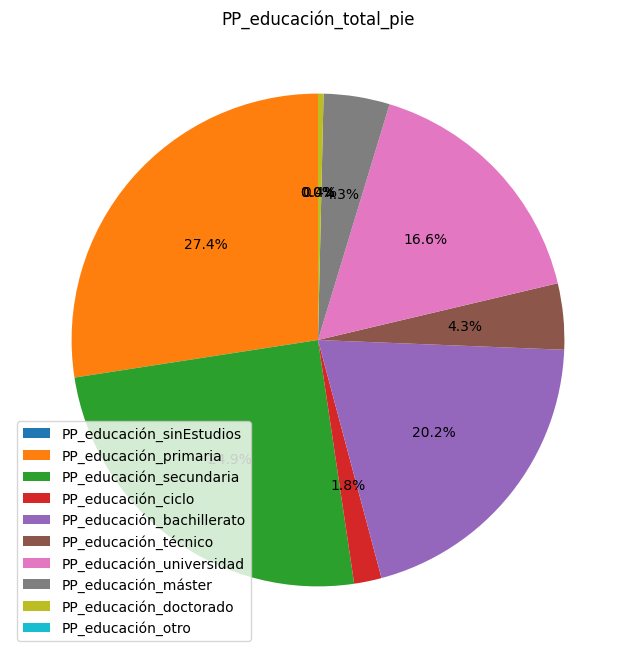

In [161]:
# PP_educación_

# processing
encuesta['PP_educaciónn']=encuesta['PP_educación']
encuesta.loc[encuesta['PP_educaciónn']=="Universitario/a (Grado)",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Universitario/a (Grado)"
encuesta.loc[encuesta['PP_educaciónn']=="Postgrado / Maestría",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Universitario/a (Grado);Postgrado / Maestría"
encuesta.loc[encuesta['PP_educaciónn']=="Bachillerato / preparatoria",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria"
encuesta.loc[encuesta['PP_educaciónn']=="Secundaria",'PP_educaciónn']="Primaria o menos;Secundaria"
encuesta.loc[encuesta['PP_educaciónn']=="Bachillerato / preparatoria;Universitario/a (Grado)",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Universitario/a (Grado)"
encuesta.loc[encuesta['PP_educaciónn']=="Bachillerato / preparatoria;Técnico/a // Formación profesional",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Técnico/a // Formación profesional"
encuesta.loc[encuesta['PP_educaciónn']=="Doctorado",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Universitario/a (Grado);Postgrado / Maestría;Doctorado"
encuesta.loc[encuesta['PP_educaciónn']=="Técnico/a // Formación profesional",'PP_educaciónn']="Primaria o menos;Secundaria;Técnico/a // Formación profesional"
encuesta.loc[encuesta['PP_educaciónn']=="Secundaria;Bachillerato / preparatoria;Técnico/a // Formación profesional;Universitario/a (Grado)",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Técnico/a // Formación profesional;Universitario/a (Grado)"
encuesta.loc[encuesta['PP_educaciónn']=="Ciclo formativo",'PP_educaciónn']="Primaria o menos;Ciclo formativo"
encuesta.loc[encuesta['PP_educaciónn']=="Ciclo formativo;Técnico/a // Formación profesional",'PP_educaciónn']="Primaria o menos;Ciclo formativo;Técnico/a // Formación profesional"
encuesta.loc[encuesta['PP_educaciónn']=="Universitario/a (Grado);Postgrado / Maestría",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Universitario/a (Grado);Postgrado / Maestría"
encuesta.loc[encuesta['PP_educaciónn']=="Secundaria;Bachillerato / preparatoria;Universitario/a (Grado)",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Universitario/a (Grado)"

# replace PP_educación
encuesta.drop(['PP_educación'], axis=1, inplace=True)
encuesta.rename(columns={'PP_educaciónn':'PP_educación'}, inplace=True)

# to binary
encuesta.loc[encuesta['PP_educación'].str.contains('Sin estudios oficiales'),'PP_educación_sinEstudios'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Primaria o menos'),'PP_educación_primaria'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Secundaria'),'PP_educación_secundaria'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Ciclo formativo'),'PP_educación_ciclo'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Bachillerato / preparatoria'),'PP_educación_bachillerato'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Técnico/a // Formación profesional'),'PP_educación_técnico'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Universitario/a (Grado)', regex=False),'PP_educación_universidad'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Postgrado / Maestría'),'PP_educación_máster'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Doctorado'),'PP_educación_doctorado'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Otro'),'PP_educación_otro'] = 1

# compile
encuesta.drop(['PP_educación'], axis=1, inplace=True)# Drop PP_educación
PP_educación=encuesta.filter(regex='^PP_educación').fillna(0)# Fill na
PP_educación = PP_educación.astype(int)# Change PP_educación to int
encuesta[PP_educación.columns] = PP_educación# Add PP_educación to encuesta
print(encuesta.shape)

# calcular XX_nivel_formación
encuesta['XX_nivel_formación']=(encuesta['PP_educación_sinEstudios']*0)+(encuesta['PP_educación_primaria']*1)+(encuesta['PP_educación_secundaria']*2)+(encuesta['PP_educación_ciclo']*2.5)+(encuesta['PP_educación_bachillerato']*3)+(encuesta['PP_educación_técnico']*3.5)+(encuesta['PP_educación_universidad']*4)+(encuesta['PP_educación_máster']*5)+(encuesta['PP_educación_doctorado']*6)+(encuesta['PP_educación_otro']*3)
# standardize to 0-1
encuesta['XX_nivel_formación'] = (encuesta['XX_nivel_formación']-encuesta['XX_nivel_formación'].min())/(encuesta['XX_nivel_formación'].max()-encuesta['XX_nivel_formación'].min())


# plot
PP_educación_total=PP_educación.T
PP_educación_total['total']=PP_educación_total.sum(axis=1)
PP_educación_total_pie=PP_educación_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='PP_educación_total_pie',figsize=(8, 8))
plt.ylabel('')
plt.show()

(76, 66)

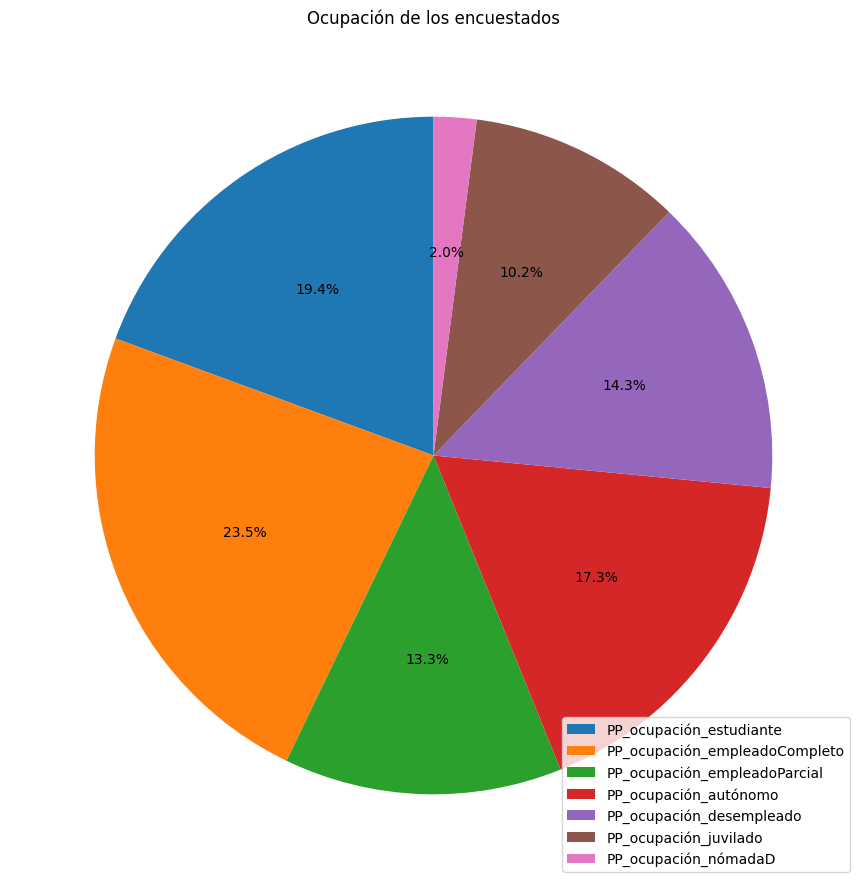

In [162]:
# PP_ocupación_

# processing
encuesta.loc[encuesta['PP_ocupación']=="Estudiante",'PP_ocupación']="Estudiante;Desempleado/a"

# to binary
encuesta.loc[encuesta['PP_ocupación'].str.contains('Estudiante'),'PP_ocupación_estudiante'] = 1
encuesta.loc[encuesta['PP_ocupación'].str.contains('Empleado/a a tiempo completo'),'PP_ocupación_empleadoCompleto'] = 1
encuesta.loc[encuesta['PP_ocupación'].str.contains('Empleado/a a tiempo parcial'),'PP_ocupación_empleadoParcial'] = 1
encuesta.loc[encuesta['PP_ocupación'].str.contains('Autónomo/a'),'PP_ocupación_autónomo'] = 1
encuesta.loc[encuesta['PP_ocupación'].str.contains('Desempleado/a'),'PP_ocupación_desempleado'] = 1
encuesta.loc[encuesta['PP_ocupación'].str.contains('Jubilado/a'),'PP_ocupación_juvilado'] = 1
encuesta.loc[encuesta['PP_ocupación'].str.contains('Nómada digital'),'PP_ocupación_nómadaD'] = 1

# compile
encuesta.drop(['PP_ocupación'], axis=1, inplace=True)# Drop PP_ocupación
PP_ocupación=encuesta.filter(regex='^PP_ocupación').fillna(0)# Fill na
PP_ocupación = PP_ocupación.astype(int)# Change PP_ocupación to int
encuesta[PP_ocupación.columns] = PP_ocupación# Add PP_ocupación to encuesta
print(encuesta.shape)

# calcular XX_nivel_ocupación
encuesta['XX_nivel_ocupación']=(encuesta['PP_ocupación_juvilado']*0.5)+(encuesta['PP_ocupación_desempleado']*1)+(encuesta['PP_ocupación_empleadoParcial']*2)+(encuesta['PP_ocupación_estudiante']*3)+(encuesta['PP_ocupación_nómadaD']*3.5)+(encuesta['PP_ocupación_autónomo']*4)+(encuesta['PP_ocupación_empleadoCompleto']*4)
# standardize to 0-1
encuesta['XX_nivel_ocupación'] = (encuesta['XX_nivel_ocupación']-encuesta['XX_nivel_ocupación'].min())/(encuesta['XX_nivel_ocupación'].max()-encuesta['XX_nivel_ocupación'].min())

#rename 
##########PP_ocupación.rename(columns={'PP_ocupación_estudiante':'Estudiante', 'PP_ocupación_empleadoCompleto': 'Empleado Completo', 'PP_ocupación_empleadoParcial': 'Empleado Parcial', 'PP_ocupación_autónomo': 'Autónomo', 'PP_ocupación_desempleado': 'Desempleado', 'PP_ocupación_juvilado': 'Juvilado', 'PP_ocupación_nómadaD': 'Nómada Digital'}, inplace=True)

# plot
PP_ocupación_total=PP_ocupación.T
PP_ocupación_total['total']=PP_ocupación_total.sum(axis=1)
PP_ocupación_total_pie=PP_ocupación_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='Ocupación de los encuestados',figsize=(11, 11))
plt.ylabel('')
plt.show()

(76, 93)


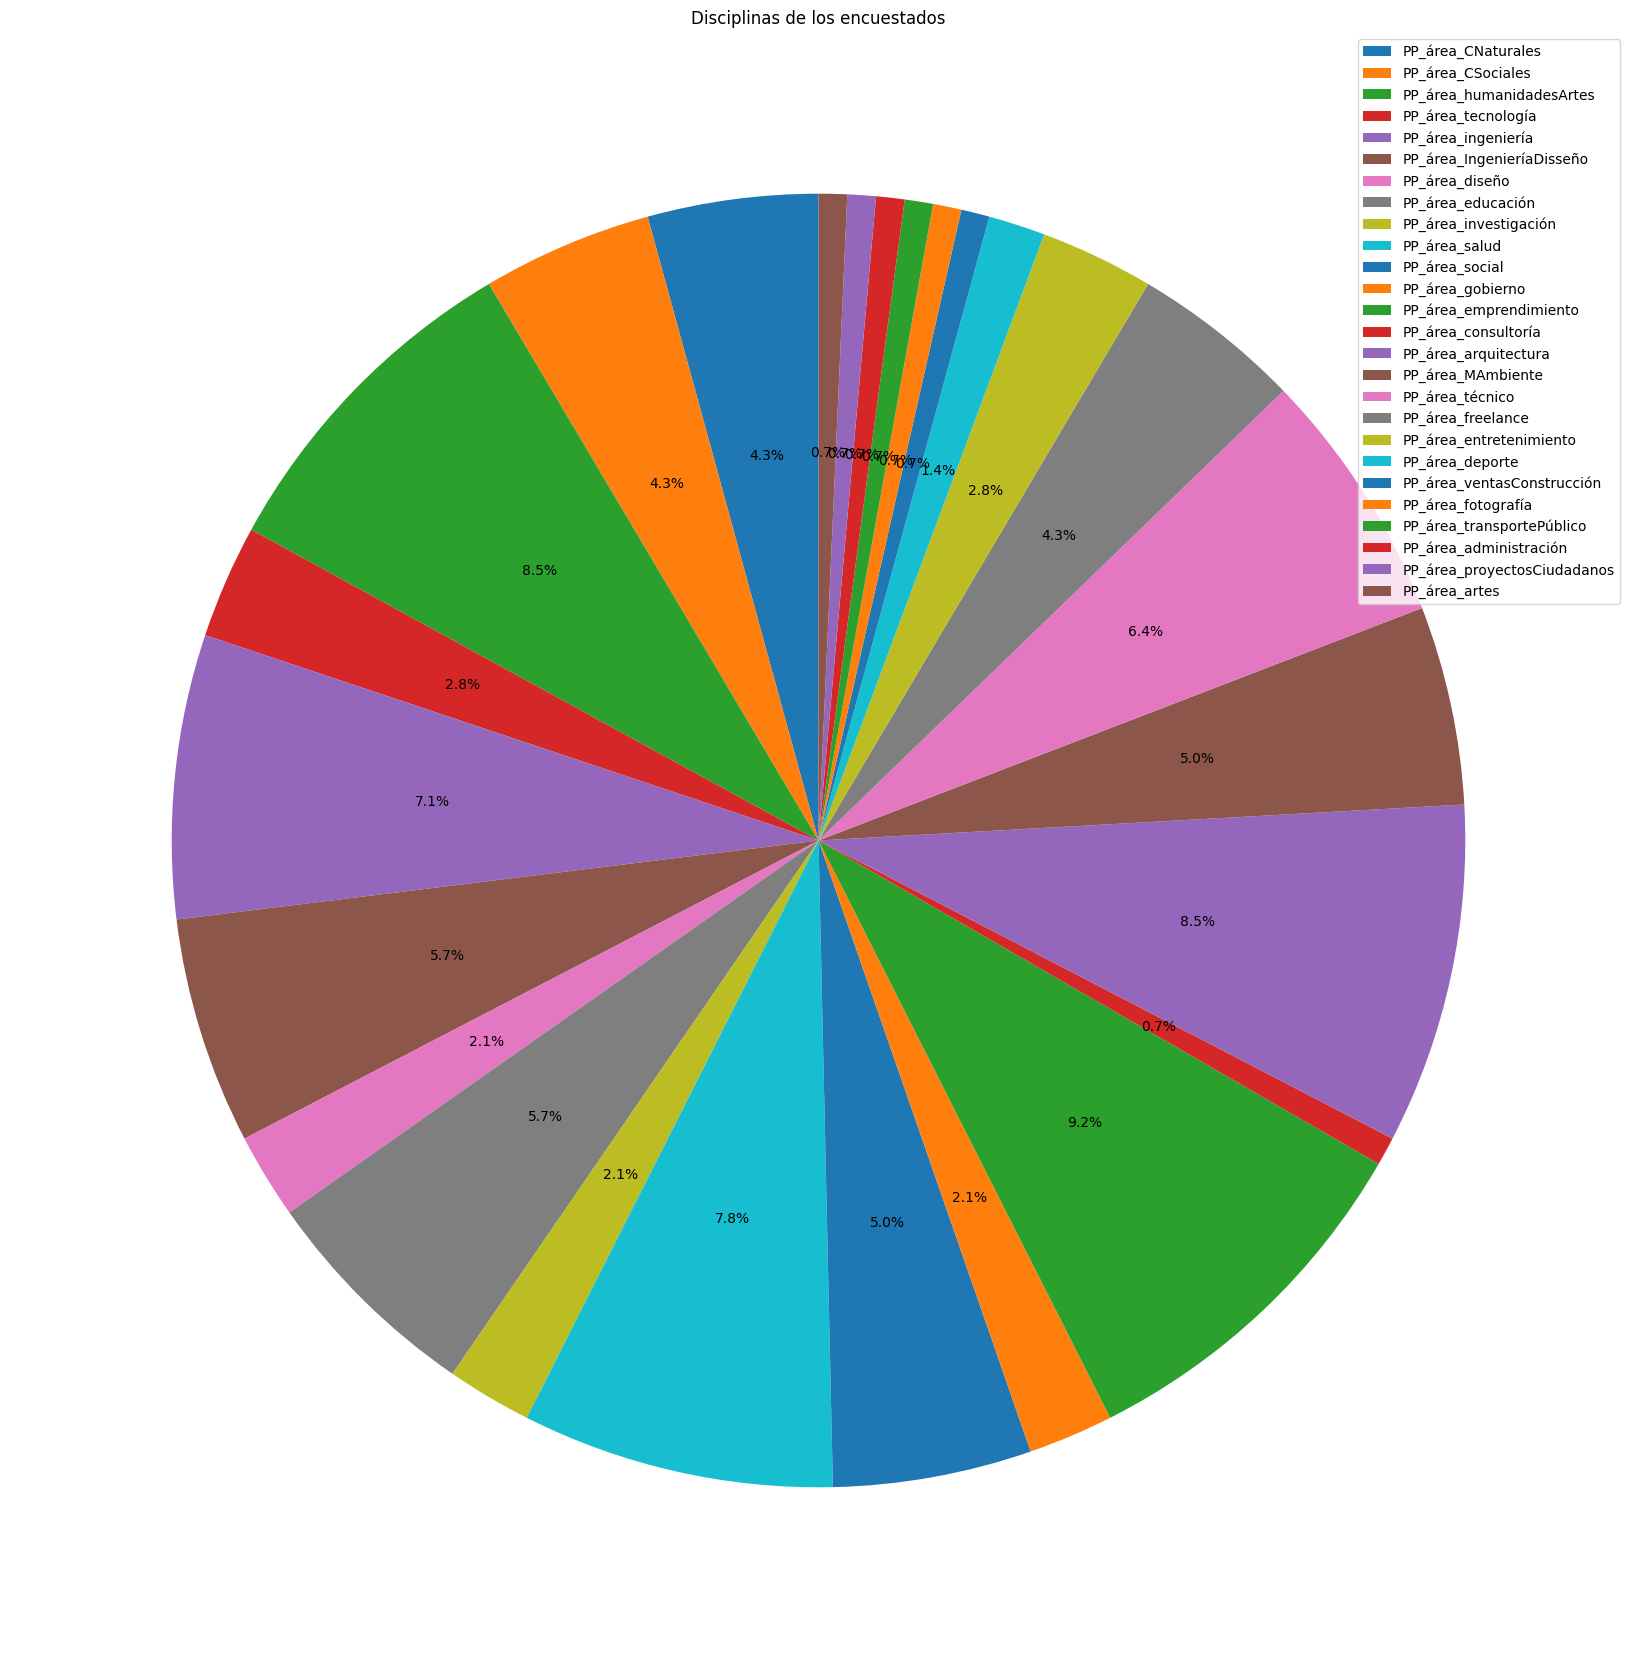

In [163]:
# PP_área_

# to binary
encuesta.loc[encuesta['PP_área'].str.contains('Ciencias naturales'),'PP_área_CNaturales'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ciencias sociales'),'PP_área_CSociales'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Humanidades y artes'),'PP_área_humanidadesArtes'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Tecnología y computación'),'PP_área_tecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ingeniería'),'PP_área_ingeniería'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ingeniería y diseño'),'PP_área_IngenieríaDisseño'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Diseño'),'PP_área_diseño'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Educación y pedagogía'),'PP_área_educación'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Investigación y academia'),'PP_área_investigación'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Salud y medicina'),'PP_área_salud'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Servicios sociales y asistenciales'),'PP_área_social'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Gobierno y servicio público'),'PP_área_gobierno'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Negocios, administración empresarial, emprendimiento y márquetin'),'PP_área_emprendimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Consultoría y análisis'),'PP_área_consultoría'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Arquitectura'),'PP_área_arquitectura'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Agricultura y medio ambiente'),'PP_área_MAmbiente'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Técnico / oficios'),'PP_área_técnico'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Carrera independiente / Freelance'),'PP_área_freelance'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Entretenimiento, medios de comunicación y relaciones públicas'),'PP_área_entretenimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Deporte y actividad física'),'PP_área_deporte'] = 1

encuesta.loc[encuesta['PP_área'].str.contains('Ventas Construccion'),'PP_área_ventasConstrucción'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Fotografia'),'PP_área_fotografía'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Transporte público'),'PP_área_transportePúblico'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Administracion'),'PP_área_administración'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Mediación de proyectos ciudadanos'),'PP_área_proyectosCiudadanos'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Artes y creatividad.'),'PP_área_artes'] = 1

# compile
PP_área=encuesta.filter(regex='^PP_área').fillna(0)# Fill na
PP_área.drop(['PP_área'], axis=1, inplace=True)# Drop PP_área in PP_área group
PP_área = PP_área.astype(int)# Change PP_área to int
encuesta[PP_área.columns] = PP_área# Add PP_área to encuesta
print(encuesta.shape)

# interdisciplinariedad
encuesta['XX_interdisciplinariedad'] = PP_área.sum(axis=1)

#rename
##########PP_área.rename(columns={'PP_área_CNaturales':'Ciencias Naturales', 'PP_área_CSociales': 'Ciencias Sociales', 'PP_área_humanidadesArtes': 'Humanidades y Artes', 'PP_área_tecnología': 'Tecnología', 'PP_área_ingeniería': 'Ingeniería', 'PP_área_IngenieríaDisseño': 'Ingeniería y diseño', 'PP_área_diseño': 'Diseño', 'PP_área_educación': 'Educación', 'PP_área_investigación': 'Investigación', 'PP_área_salud': 'Salud', 'PP_área_social': 'Social', 'PP_área_gobierno': 'Gobierno', 'PP_área_emprendimiento': 'Emprendimiento', 'PP_área_consultoría': 'Consultoría', 'PP_área_arquitectura': 'Arquitectura', 'PP_área_MAmbiente':'Medio Ambiente', 'PP_área_técnico':'Técnico', 'PP_área_freelance':'Freelance', 'PP_área_entretenimiento':'Entretenimiento', 'PP_área_deporte':'Deporte', 'PP_área_ventasConstrucción':'Ventas y Construcción', 'PP_área_fotografía':'Fotografía', 'PP_área_transportePúblico':'Transporte Público', 'PP_área_administración':'Administración', 'PP_área_proyectosCiudadanos':'Proyectos Ciutadanos', 'PP_área_artes': 'Artes'}, inplace=True)


# plot
PP_área_total=PP_área.T
PP_área_total['total']=PP_área_total.sum(axis=1)
PP_área_total_pie=PP_área_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='Disciplinas de los encuestados',figsize=(21, 21))
plt.ylabel('')
plt.show()

(76, 97)


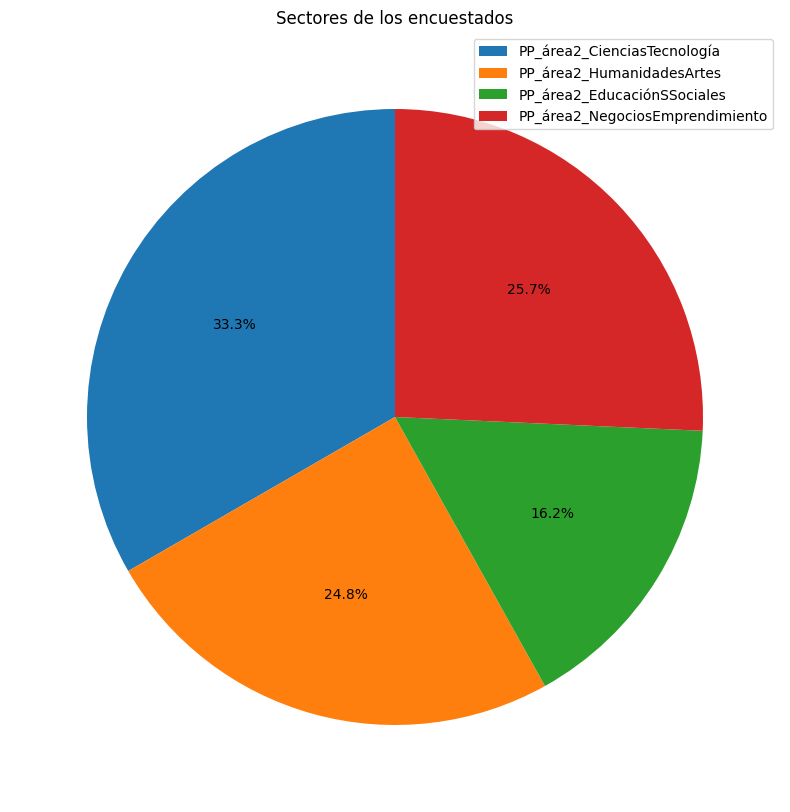

In [164]:
# PP_área2_

# to binary
# PP_área2_CienciasTecnología
encuesta.loc[encuesta['PP_área'].str.contains('Ciencias naturales'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ciencias sociales'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Tecnología y computación'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ingeniería'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ingeniería y diseño'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Salud y medicina'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Investigación y academia'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Agricultura y medio ambiente'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Deporte y actividad física'),'PP_área2_CienciasTecnología'] = 1

# PP_área2_HumanidadesArtes
encuesta.loc[encuesta['PP_área'].str.contains('Humanidades y artes'),'PP_área2_HumanidadesArtes'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Diseño'),'PP_área2_HumanidadesArtes'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Arquitectura'),'PP_área2_HumanidadesArtes'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Entretenimiento, medios de comunicación y relaciones públicas'),'PP_área2_HumanidadesArtes'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Artes y creatividad.'),'PP_área2_HumanidadesArtes'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Fotografia'),'PP_área2_HumanidadesArtes'] = 1

# PP_área2_EducaciónSSociales
encuesta.loc[encuesta['PP_área'].str.contains('Educación y pedagogía'),'PP_área2_EducaciónSSociales'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Servicios sociales y asistenciales'),'PP_área2_EducaciónSSociales'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Gobierno y servicio público'),'PP_área2_EducaciónSSociales'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Transporte público'),'PP_área2_EducaciónSSociales'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Mediación de proyectos ciudadanos'),'PP_área2_EducaciónSSociales'] = 1

# PP_área2_NegociosEmprendimiento
encuesta.loc[encuesta['PP_área'].str.contains('Negocios, administración empresarial, emprendimiento y márquetin'),'PP_área2_NegociosEmprendimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Consultoría y análisis'),'PP_área2_NegociosEmprendimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Técnico / oficios'),'PP_área2_NegociosEmprendimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Carrera independiente / Freelance'),'PP_área2_NegociosEmprendimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ventas Construccion'),'PP_área2_NegociosEmprendimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Administracion'),'PP_área2_NegociosEmprendimiento'] = 1

# compile
encuesta.drop(['PP_área'], axis=1, inplace=True)# Drop PP_área
PP_área2=encuesta.filter(regex='^PP_área2').fillna(0)# Fill na
PP_área2 = PP_área2.astype(int)# Change PP_área2 to int
encuesta[PP_área2.columns] = PP_área2# Add PP_área2 to encuesta
print(encuesta.shape)

# XX_interdisciplinariedad
encuesta['XX_interdisciplinariedad2'] = PP_área2.sum(axis=1)
encuesta['XX_interdisciplinariedad3']=encuesta['XX_interdisciplinariedad']+encuesta['XX_interdisciplinariedad2']
encuesta.drop(['XX_interdisciplinariedad', 'XX_interdisciplinariedad2'], axis=1, inplace=True)# Drop XX_interdisciplinariedad
encuesta.rename(columns={'XX_interdisciplinariedad3':'XX_interdisciplinariedad'}, inplace=True)
encuesta.loc[encuesta['XX_interdisciplinariedad']>10,'XX_interdisciplinariedad']=10
# standardize to 0-1
encuesta['XX_interdisciplinariedad'] = (encuesta['XX_interdisciplinariedad']-encuesta['XX_interdisciplinariedad'].min())/(encuesta['XX_interdisciplinariedad'].max()-encuesta['XX_interdisciplinariedad'].min())

##########PP_área2.rename(columns={'PP_área2_CienciasTecnología':'Ciencias y Tecnología', 'PP_área2_HumanidadesArtes': 'Humanidades y Artes', 'PP_área2_EducaciónSSociales': 'Educación y Servicios Sociales', 'PP_área2_NegociosEmprendimiento': 'Negocios y Emprendimiento'}, inplace=True)

# plot
PP_área2_total=PP_área2.T
PP_área2_total['total']=PP_área2_total.sum(axis=1)
PP_área2_total_pie=PP_área2_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='Sectores de los encuestados',figsize=(10, 10))
plt.ylabel('')
plt.show()

### 1.1.3 PP_dónde_vives_, PP_zona_, XX_PP_tiempo_residencia

(76, 100)


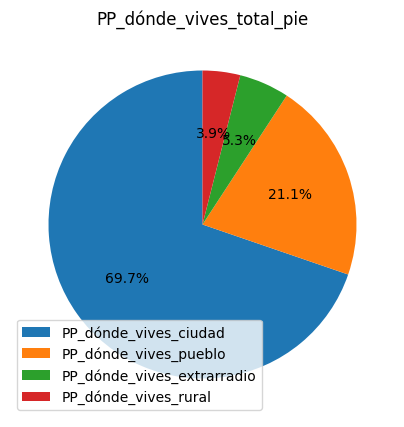

In [165]:
# PP_dónde_vives

# Change PP_dónde_vives to binary
encuesta.loc[encuesta['PP_dónde_vives'].str.contains('Ciudad'),'PP_dónde_vives_ciudad'] = 1
encuesta.loc[encuesta['PP_dónde_vives'].str.contains('Pueblo'),'PP_dónde_vives_pueblo'] = 1
encuesta.loc[encuesta['PP_dónde_vives'].str.contains('Extrarradio de ciudad'),'PP_dónde_vives_extrarradio'] = 1
encuesta.loc[encuesta['PP_dónde_vives'].str.contains('Zona rural'),'PP_dónde_vives_rural'] = 1

# compile
encuesta.drop(['PP_dónde_vives'], axis=1, inplace=True)# Drop PP_dónde_vives
PP_dónde_vives=encuesta.filter(regex='^PP_dónde_vives').fillna(0)# Fill na
PP_dónde_vives = PP_dónde_vives.astype(int)# Change PP_dónde_vives to int
encuesta[PP_dónde_vives.columns] = PP_dónde_vives# Add PP_dónde_vives to encuesta
print(encuesta.shape)

# plot
PP_dónde_vives=encuesta.filter(regex="^PP_dónde_vives")
PP_dónde_vives_total=PP_dónde_vives.T
PP_dónde_vives_total['total']=PP_dónde_vives_total.sum(axis=1)
PP_dónde_vives_total_pie=PP_dónde_vives_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='PP_dónde_vives_total_pie',figsize=(5,5))
plt.ylabel('')
plt.show()

(76, 108)


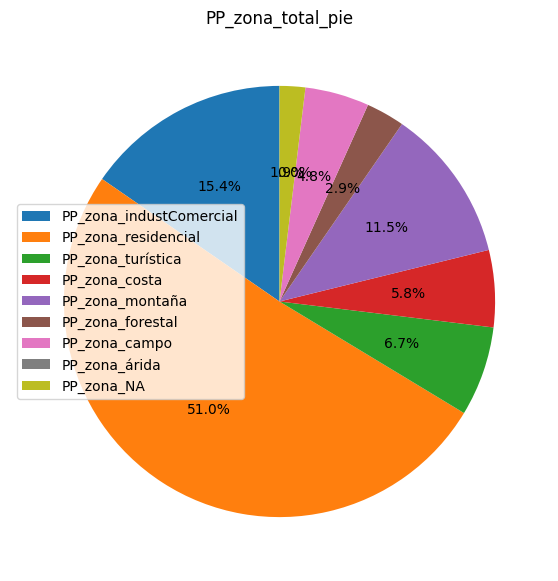

In [166]:
# PP_zona_

# Change PP_zona to binary
encuesta.loc[encuesta['PP_zona'].str.contains('Zona industrial o comercial'),'PP_zona_industComercial'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona residencial'),'PP_zona_residencial'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona turística'),'PP_zona_turística'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona costera'),'PP_zona_costa'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona de montaña'),'PP_zona_montaña'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona forestal'),'PP_zona_forestal'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona de campo'),'PP_zona_campo'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona árida'),'PP_zona_árida'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('No estoy seguro/No aplica'),'PP_zona_NA'] = 1

# compile
encuesta.drop(['PP_zona'], axis=1, inplace=True)# Drop PP_zona
PP_zona=encuesta.filter(regex='^PP_zona').fillna(0)# Fill na
PP_zona = PP_zona.astype(int)# Change PP_zona to int
encuesta[PP_zona.columns] = PP_zona# Add PP_zona to encuesta
print(encuesta.shape)

# plot
PP_zona=encuesta.filter(regex="^PP_zona")
PP_zona_total=PP_zona.T
PP_zona_total['total']=PP_zona_total.sum(axis=1)
PP_zona_total_pie=PP_zona_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='PP_zona_total_pie',figsize=(7,7))
plt.ylabel('')
plt.show()

PP_tiempo_residencia
Más de 10 años    33
1-5 años          26
6-10 años         11
Menos de 1 año     6
Name: count, dtype: int64

 (76, 108)


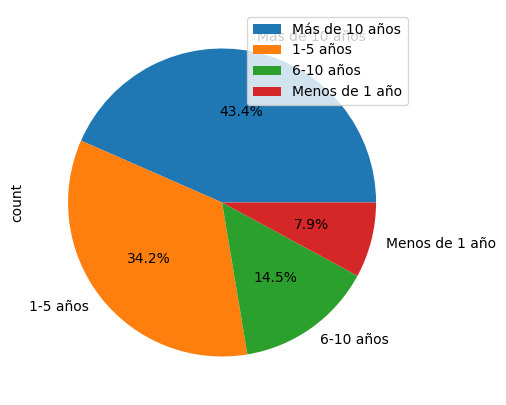

In [167]:
# XX_PP_tiempo_residencia

# plot
print(encuesta['PP_tiempo_residencia'].value_counts())
encuesta['PP_tiempo_residencia'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(5,5))

# to categorical
encuesta.loc[encuesta['PP_tiempo_residencia']=="Menos de 1 año",'PP_tiempo_residenciaa']=0
encuesta.loc[encuesta['PP_tiempo_residencia']=="1-5 años",'PP_tiempo_residenciaa']=1/3
encuesta.loc[encuesta['PP_tiempo_residencia']=="6-10 años",'PP_tiempo_residenciaa']=2/3
encuesta.loc[encuesta['PP_tiempo_residencia']=="Más de 10 años",'PP_tiempo_residenciaa']=1

# Drop PP_edad
encuesta.drop(['PP_tiempo_residencia'], axis=1, inplace=True)
encuesta.rename(columns={'PP_tiempo_residenciaa':'XX_PP_tiempo_residencia'}, inplace=True)
print("\n",encuesta.shape)

### 1.1.4 PP_sobre_ti_

(76, 134)


C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\3298686736.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PP_sobre_ti'].str.contains('No estoy satisfecho si no he aprovechado el día'),'PP_sobre_ti_provechoso'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\3298686736.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Antes playa que montaña'),'PP_sobre_ti_playa'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\3298686736.py:25: Perfo

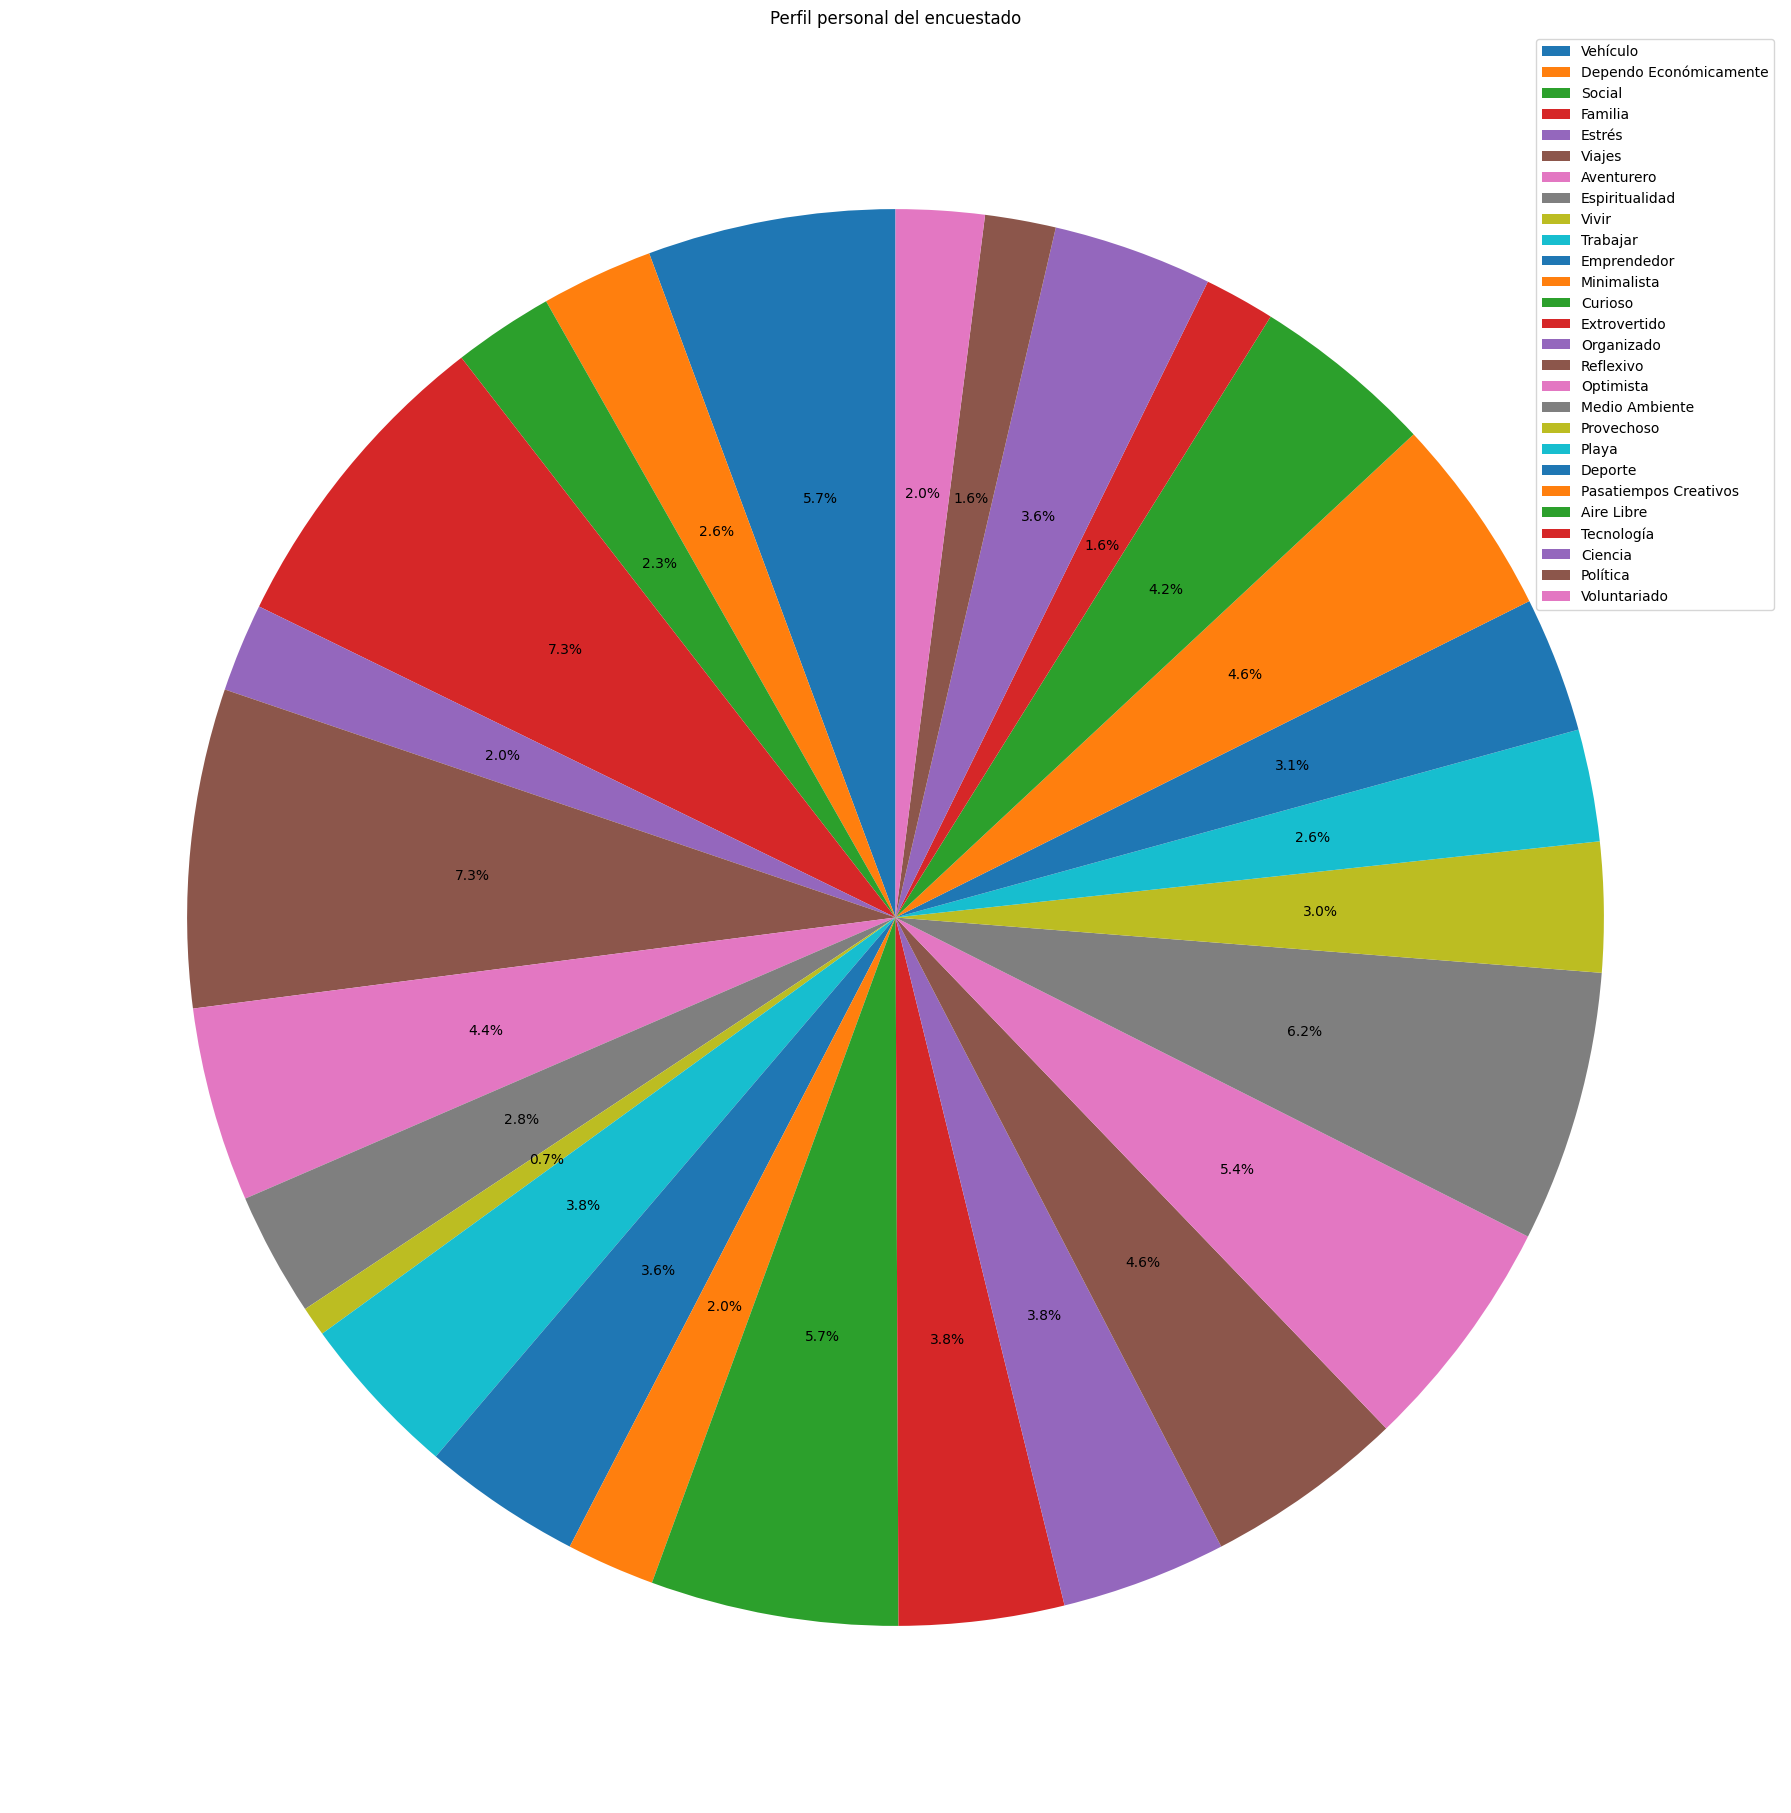

In [168]:
# PP_sobre_ti__

# Change PP_sobre_ti to binary
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Tengo o dispongo de vehículo de transporte'),'PP_sobre_ti_vehículo'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Dependo económicamente de alguien'),'PP_sobre_ti_dependoE'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Le doy mucha importancia a las actividades sociales'),'PP_sobre_ti_social'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('La familia como parte fundamental en mi vida'),'PP_sobre_ti_familia'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Me estreso fácilmente'),'PP_sobre_ti_estres'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Tengo interés en viajar'),'PP_sobre_ti_viajes'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Me considero aventurero / intrépido y disfruto de experiencias emocionantes'),'PP_sobre_ti_aventurero'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('La espiritualidad o religión desempeñan un papel importante en mi vida'),'PP_sobre_ti_espiritualidad'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Vivir para trabajar'),'PP_sobre_ti_vivir'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Trabajar para vivir'),'PP_sobre_ti_trabajar'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Mentalidad emprendedora'),'PP_sobre_ti_emprendedor'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Me considero minimalista en mi estilo de vida'),'PP_sobre_ti_minimalista'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Mente curiosa'),'PP_sobre_ti_curioso'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Soy extrovertido'),'PP_sobre_ti_extrovertido'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Soy meticuloso y organizado'),'PP_sobre_ti_organizado'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Soy una persona reflexiva / filosófica'),'PP_sobre_ti_reflexivo'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Me considero optimista'),'PP_sobre_ti_optimista'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Me preocupa el medio ambiente'),'PP_sobre_ti_MAmbiente'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('No estoy satisfecho si no he aprovechado el día'),'PP_sobre_ti_provechoso'] = 1

encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Antes playa que montaña'),'PP_sobre_ti_playa'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Practico deporte regularmente'),'PP_sobre_ti_deporte'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Disfruto de pasatiempos creativos (pintura, escritura, música, etc.)', regex=False),'PP_sobre_ti_pasatiemposCreativos'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Aficiones al aire libre (senderismo, camping, etc.)', regex=False),'PP_sobre_ti_aireLibre'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Afición a la tecnología'),'PP_sobre_ti_tecnología'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Interés en la ciencia'),'PP_sobre_ti_ciéncia'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Interés en la política'),'PP_sobre_ti_política'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Participo en actividades de voluntariado o trabajo social'),'PP_sobre_ti_voluntariado'] = 1

# compile
encuesta.drop(['PP_sobre_ti'], axis=1, inplace=True)# Drop PP_sobre_ti
PP_sobre_ti=encuesta.filter(regex='^PP_sobre_ti').fillna(0)# Fill na
PP_sobre_ti = PP_sobre_ti.astype(int)# Change PP_sobre_ti to int
encuesta[PP_sobre_ti.columns] = PP_sobre_ti# Add PP_sobre_ti to encuesta
print(encuesta.shape)

# plot
PP_sobre_ti=encuesta.filter(regex="^PP_sobre_ti")
##########PP_sobre_ti.rename(columns={'PP_sobre_ti_vehículo':'Vehículo', 'PP_sobre_ti_dependoE': 'Dependo Económicamente', 'PP_sobre_ti_social': 'Social', 'PP_sobre_ti_familia': 'Familia', 'PP_sobre_ti_estres': 'Estrés', 'PP_sobre_ti_viajes': 'Viajes', 'PP_sobre_ti_aventurero': 'Aventurero', 'PP_sobre_ti_espiritualidad': 'Espiritualidad', 'PP_sobre_ti_vivir': 'Vivir', 'PP_sobre_ti_trabajar': 'Trabajar', 'PP_sobre_ti_emprendedor': 'Emprendedor', 'PP_sobre_ti_minimalista': 'Minimalista', 'PP_sobre_ti_curioso': 'Curioso', 'PP_sobre_ti_extrovertido': 'Extrovertido', 'PP_sobre_ti_organizado': 'Organizado', 'PP_sobre_ti_reflexivo':'Reflexivo', 'PP_sobre_ti_optimista':'Optimista', 'PP_sobre_ti_MAmbiente':'Medio Ambiente', 'PP_sobre_ti_provechoso':'Provechoso', 'PP_sobre_ti_playa':'Playa', 'PP_sobre_ti_deporte':'Deporte', 'PP_sobre_ti_pasatiemposCreativos':'Pasatiempos Creativos', 'PP_sobre_ti_aireLibre':'Aire Libre', 'PP_sobre_ti_tecnología':'Tecnología', 'PP_sobre_ti_ciéncia':'Ciencia', 'PP_sobre_ti_política': 'Política', 'PP_sobre_ti_voluntariado': 'Voluntariado'}, inplace=True)
PP_sobre_ti_total=PP_sobre_ti.T
PP_sobre_ti_total['total']=PP_sobre_ti_total.sum(axis=1)
PP_sobre_ti_total_pie=PP_sobre_ti_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='Perfil personal del encuestado',figsize=(23, 23))
plt.ylabel('')
plt.show()

## 1.2 IND (Individualidad-colectivismo): IND_individ_colect_, IND_proyectosEquipo, XX_IND_conflicto, XX_IND_trabajo_equipo, XX_IND_act_comunitarias, XX_IND_ratioColectivismo

C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\3272089401.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_individ_colect'].str.contains('Me gusta asumir responsabilidades y liderar proyectos'),'IND_individ_colect_liderar'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\3272089401.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_individ_colect'].str.contains('Prefiero roles de liderazgo en proyectos.'),'IND_individ_colect_liderar2'] = 1
C:\Users\xavie\AppData\

(76, 145)


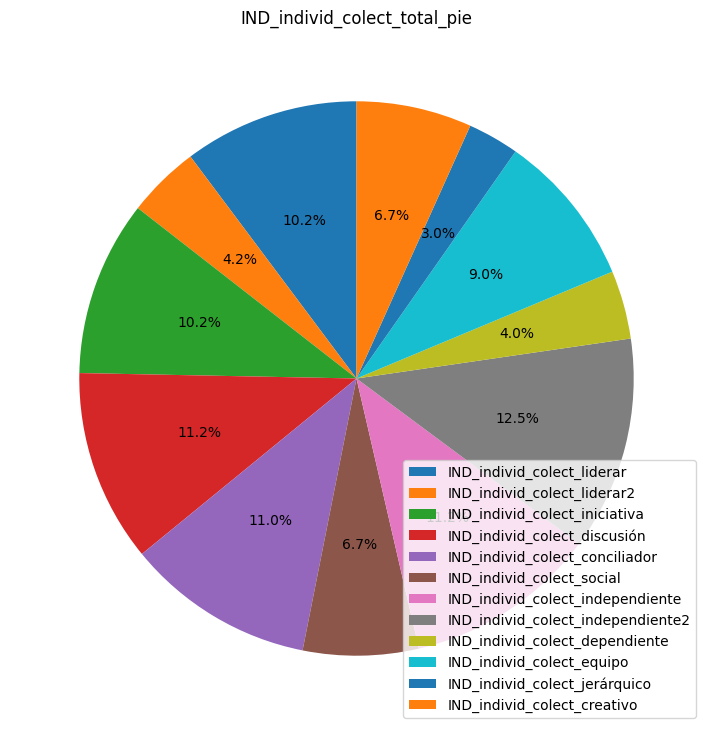

C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\3272089401.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta['IND_ratioColectivismo']=encuesta['IND_individ_colect_liderar']*-1+encuesta['IND_individ_colect_liderar2']*-1+encuesta['IND_individ_colect_iniciativa']*-1+encuesta['IND_individ_colect_discusión']*1+encuesta['IND_individ_colect_conciliador']*1+encuesta['IND_individ_colect_social']*1+encuesta['IND_individ_colect_independiente']*-1+encuesta['IND_individ_colect_independiente2']*-1+encuesta['IND_individ_colect_dependiente']*1+encuesta['IND_individ_colect_equipo']*1+encuesta['IND_individ_colect_jerárquico']*1+encuesta['IND_individ_colect_creativo']*-1


In [63]:
# IND_individ_colect_

# Change IND_individ_colect to binary
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Me gusta asumir responsabilidades y liderar proyectos'),'IND_individ_colect_liderar'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Prefiero roles de liderazgo en proyectos.'),'IND_individ_colect_liderar2'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Tengo iniciativa y tomo la delantera en las tareas'),'IND_individ_colect_iniciativa'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Soy comunicativo y disfruto en conversaciones y discusiones'),'IND_individ_colect_discusión'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Soy conciliador y trato de resolver conflictos de manera pacífica'),'IND_individ_colect_conciliador'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Mantengo una amplia red de amigos y conexiones sociales'),'IND_individ_colect_social'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Valorizo tener criterio propio y tomar decisiones independientes'),'IND_individ_colect_independiente'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Disfruto de la autonomía en mi trabajo.'),'IND_individ_colect_independiente2'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Prefiero seguir las directrices de otros cuando no me siento seguro de manejar una situación'),'IND_individ_colect_dependiente'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Me siento cómodo trabajando en grupos grandes y colaborando en proyectos de equipo'),'IND_individ_colect_equipo'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Trabajo mejor en un entorno estructurado y jerárquico'),'IND_individ_colect_jerárquico'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Me considero un solucionador de problemas creativo.'),'IND_individ_colect_creativo'] = 1

# compile
encuesta.drop(['IND_individ_colect'], axis=1, inplace=True)# Drop IND_individ_colect
IND_individ_colect=encuesta.filter(regex='^IND_individ_colect').fillna(0)# Fill na
IND_individ_colect = IND_individ_colect.astype(int)# Change IND_individ_colect to int
encuesta[IND_individ_colect.columns] = IND_individ_colect# Add IND_individ_colect to encuesta
print(encuesta.shape)

# plot
IND_individ_colect=encuesta.filter(regex="^IND_individ_colect")
IND_individ_colect_total=IND_individ_colect.T
IND_individ_colect_total['total']=IND_individ_colect_total.sum(axis=1)
IND_individ_colect_total_pie=IND_individ_colect_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='IND_individ_colect_total_pie',figsize=(9,9))
plt.ylabel('')
plt.show()

# IND_individ_colect
encuesta['IND_ratioColectivismo']=encuesta['IND_individ_colect_liderar']*-1+encuesta['IND_individ_colect_liderar2']*-1+encuesta['IND_individ_colect_iniciativa']*-1+encuesta['IND_individ_colect_discusión']*1+encuesta['IND_individ_colect_conciliador']*1+encuesta['IND_individ_colect_social']*1+encuesta['IND_individ_colect_independiente']*-1+encuesta['IND_individ_colect_independiente2']*-1+encuesta['IND_individ_colect_dependiente']*1+encuesta['IND_individ_colect_equipo']*1+encuesta['IND_individ_colect_jerárquico']*1+encuesta['IND_individ_colect_creativo']*-1

IND_proyectos
Proyectos que involucran colaboración y trabajo en equipo.     45
Proyectos que te permiten trabajar de manera independiente.    31
Name: count, dtype: int64

 (76, 146)


C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\3497413139.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_proyectos']=="Proyectos que involucran colaboración y trabajo en equipo.",'IND_proyectos_']=1
C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\3497413139.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_proyectosEquipo']==1,'IND_ratioColectivismo2'] = 3


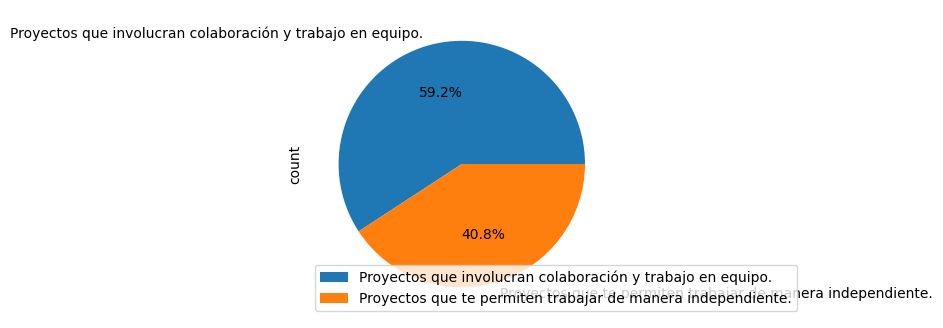

In [64]:
# IND_proyectosEquipo

# plot
print(encuesta['IND_proyectos'].value_counts())
encuesta['IND_proyectos'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['IND_proyectos']=="Proyectos que involucran colaboración y trabajo en equipo.",'IND_proyectos_']=1
encuesta['IND_proyectos_']=encuesta['IND_proyectos_'].fillna(0).astype(int)

# Drop IND_proyectos
encuesta.drop(['IND_proyectos'], axis=1, inplace=True)
encuesta.rename(columns={'IND_proyectos_':'IND_proyectosEquipo'}, inplace=True)
print("\n",encuesta.shape)

# IND_ratioColectivismo2
encuesta.loc[encuesta['IND_proyectosEquipo']==1,'IND_ratioColectivismo2'] = 3
encuesta.loc[encuesta['IND_proyectosEquipo']==0,'IND_ratioColectivismo2'] = -3

C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\1049448535.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_conflicto']=="No, generalmente busco ganar la disputa.",'IND_conflicto_']=0


IND_conflicto
Sí, siempre busco soluciones mutuamente beneficiosas.    57
A veces, dependiendo de la situación.                    19
Name: count, dtype: int64

 (76, 147)


C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\1049448535.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_IND_conflicto']==1,'IND_ratioColectivismo3'] = 3


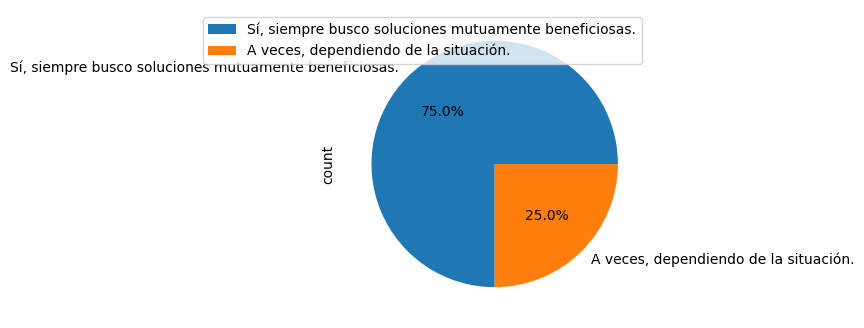

In [65]:
# XX_IND_conflicto

# plot
print(encuesta['IND_conflicto'].value_counts())
encuesta['IND_conflicto'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['IND_conflicto']=="No, generalmente busco ganar la disputa.",'IND_conflicto_']=0
encuesta.loc[encuesta['IND_conflicto']=="A veces, dependiendo de la situación.",'IND_conflicto_']=0.5
encuesta.loc[encuesta['IND_conflicto']=="Sí, siempre busco soluciones mutuamente beneficiosas.",'IND_conflicto_']=1

# Drop IND_conflicto
encuesta.drop(['IND_conflicto'], axis=1, inplace=True)
encuesta.rename(columns={'IND_conflicto_':'XX_IND_conflicto'}, inplace=True)
print("\n",encuesta.shape)

# IND_ratioColectivismo3
encuesta.loc[encuesta['XX_IND_conflicto']==1,'IND_ratioColectivismo3'] = 3
encuesta.loc[encuesta['XX_IND_conflicto']==0.5,'IND_ratioColectivismo3'] = 0
encuesta.loc[encuesta['XX_IND_conflicto']==0,'IND_ratioColectivismo3'] = -3

IND_trabajo_equipo
A menudo     50
Siempre      24
Raramente     2
Name: count, dtype: int64

 (76, 148)


C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\1324814273.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_trabajo_equipo']=="Nunca",'IND_trabajo_equipo_']=0
C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\1324814273.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_IND_trabajo_equipo']==0,'IND_ratioColectivismo4'] = -3


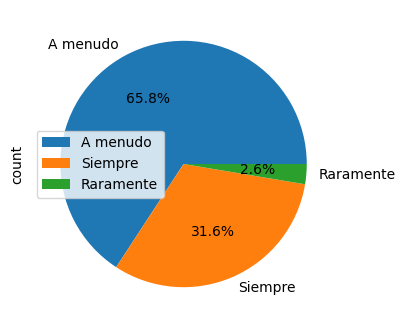

In [66]:
# XX_IND_trabajo_equipo

# plot
print(encuesta['IND_trabajo_equipo'].value_counts())
encuesta['IND_trabajo_equipo'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['IND_trabajo_equipo']=="Nunca",'IND_trabajo_equipo_']=0
encuesta.loc[encuesta['IND_trabajo_equipo']=="Raramente",'IND_trabajo_equipo_']=1/3
encuesta.loc[encuesta['IND_trabajo_equipo']=="A menudo",'IND_trabajo_equipo_']=2/3
encuesta.loc[encuesta['IND_trabajo_equipo']=="Siempre",'IND_trabajo_equipo_']=1

# Drop IND_trabajo_equipo
encuesta.drop(['IND_trabajo_equipo'], axis=1, inplace=True)
encuesta.rename(columns={'IND_trabajo_equipo_':'XX_IND_trabajo_equipo'}, inplace=True)
print("\n",encuesta.shape)

# IND_ratioColectivismo4
encuesta.loc[encuesta['XX_IND_trabajo_equipo']==0,'IND_ratioColectivismo4'] = -3
encuesta.loc[encuesta['XX_IND_trabajo_equipo']==1/3,'IND_ratioColectivismo4'] = -2
encuesta.loc[encuesta['XX_IND_trabajo_equipo']==2/3,'IND_ratioColectivismo4'] = 2
encuesta.loc[encuesta['XX_IND_trabajo_equipo']==1,'IND_ratioColectivismo4'] = 3

IND_act_comunitarias
Raramente    34
A menudo     18
Nunca        14
Siempre      10
Name: count, dtype: int64

 (76, 149)


C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\3824557154.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_act_comunitarias']=="Nunca",'IND_act_comunitarias_']=0
C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\3824557154.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_IND_act_comunitarias']==0,'IND_ratioColectivismo5'] = -3


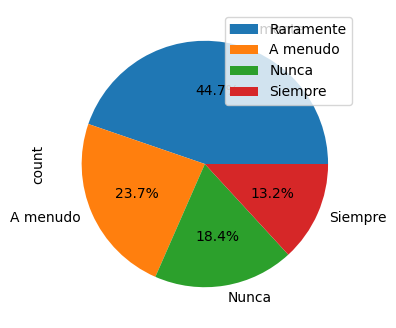

In [67]:
# XX_IND_act_comunitarias

# plot
print(encuesta['IND_act_comunitarias'].value_counts())
encuesta['IND_act_comunitarias'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['IND_act_comunitarias']=="Nunca",'IND_act_comunitarias_']=0
encuesta.loc[encuesta['IND_act_comunitarias']=="Raramente",'IND_act_comunitarias_']=1/3
encuesta.loc[encuesta['IND_act_comunitarias']=="A menudo",'IND_act_comunitarias_']=2/3
encuesta.loc[encuesta['IND_act_comunitarias']=="Siempre",'IND_act_comunitarias_']=1

# Drop IND_act_comunitarias
encuesta.drop(['IND_act_comunitarias'], axis=1, inplace=True)
encuesta.rename(columns={'IND_act_comunitarias_':'XX_IND_act_comunitarias'}, inplace=True)
print("\n",encuesta.shape)

# IND_ratioColectivismo5
encuesta.loc[encuesta['XX_IND_act_comunitarias']==0,'IND_ratioColectivismo5'] = -3
encuesta.loc[encuesta['XX_IND_act_comunitarias']==1/3,'IND_ratioColectivismo5'] = 1
encuesta.loc[encuesta['XX_IND_act_comunitarias']==2/3,'IND_ratioColectivismo5'] = 2
encuesta.loc[encuesta['XX_IND_act_comunitarias']==1,'IND_ratioColectivismo5'] = 3

In [68]:
# XX_IND_ratioColectivismo

encuesta['IND_ratioColectivismoo']=encuesta['IND_ratioColectivismo']+encuesta['IND_ratioColectivismo2']+encuesta['IND_ratioColectivismo3']+encuesta['IND_ratioColectivismo4']+encuesta['IND_ratioColectivismo5']
encuesta.drop(['IND_ratioColectivismo', 'IND_ratioColectivismo2', 'IND_ratioColectivismo3', 'IND_ratioColectivismo4', 'IND_ratioColectivismo5'], axis=1, inplace=True)
encuesta.rename(columns={'IND_ratioColectivismoo':'XX_IND_ratioColectivismo'}, inplace=True)

# standarize to 0-1
encuesta['XX_IND_ratioColectivismo'] = (encuesta['XX_IND_ratioColectivismo']-encuesta['XX_IND_ratioColectivismo'].min())/(encuesta['XX_IND_ratioColectivismo'].max()-encuesta['XX_IND_ratioColectivismo'].min())
print(encuesta.shape)

(76, 146)


C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\1177412996.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta['IND_ratioColectivismoo']=encuesta['IND_ratioColectivismo']+encuesta['IND_ratioColectivismo2']+encuesta['IND_ratioColectivismo3']+encuesta['IND_ratioColectivismo4']+encuesta['IND_ratioColectivismo5']


## 1.3 PUE (Pueblo-ciudad): PUE_preferencias_entorno_, XX_PUE_rural_ciudad, PUE_rural_ciudad2, XX_PUE_aire_libre, PUE_trabajos_agrícolas, XX_PUE_alimmentación, XX_PUE_ciudad_urbano, XX_PUE_cultural_ciudad, PUE_ciudad_siempre, XX_PUE_ratioPueblo

C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\1062145472.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Me siento en paz en espacios naturales como bosques o campos.'),'PUE_preferencias_entorno_naturalezaPaz'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\1062145472.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Disfruto de las opciones culturales y de entretenimiento que ofrece la

(76, 160)


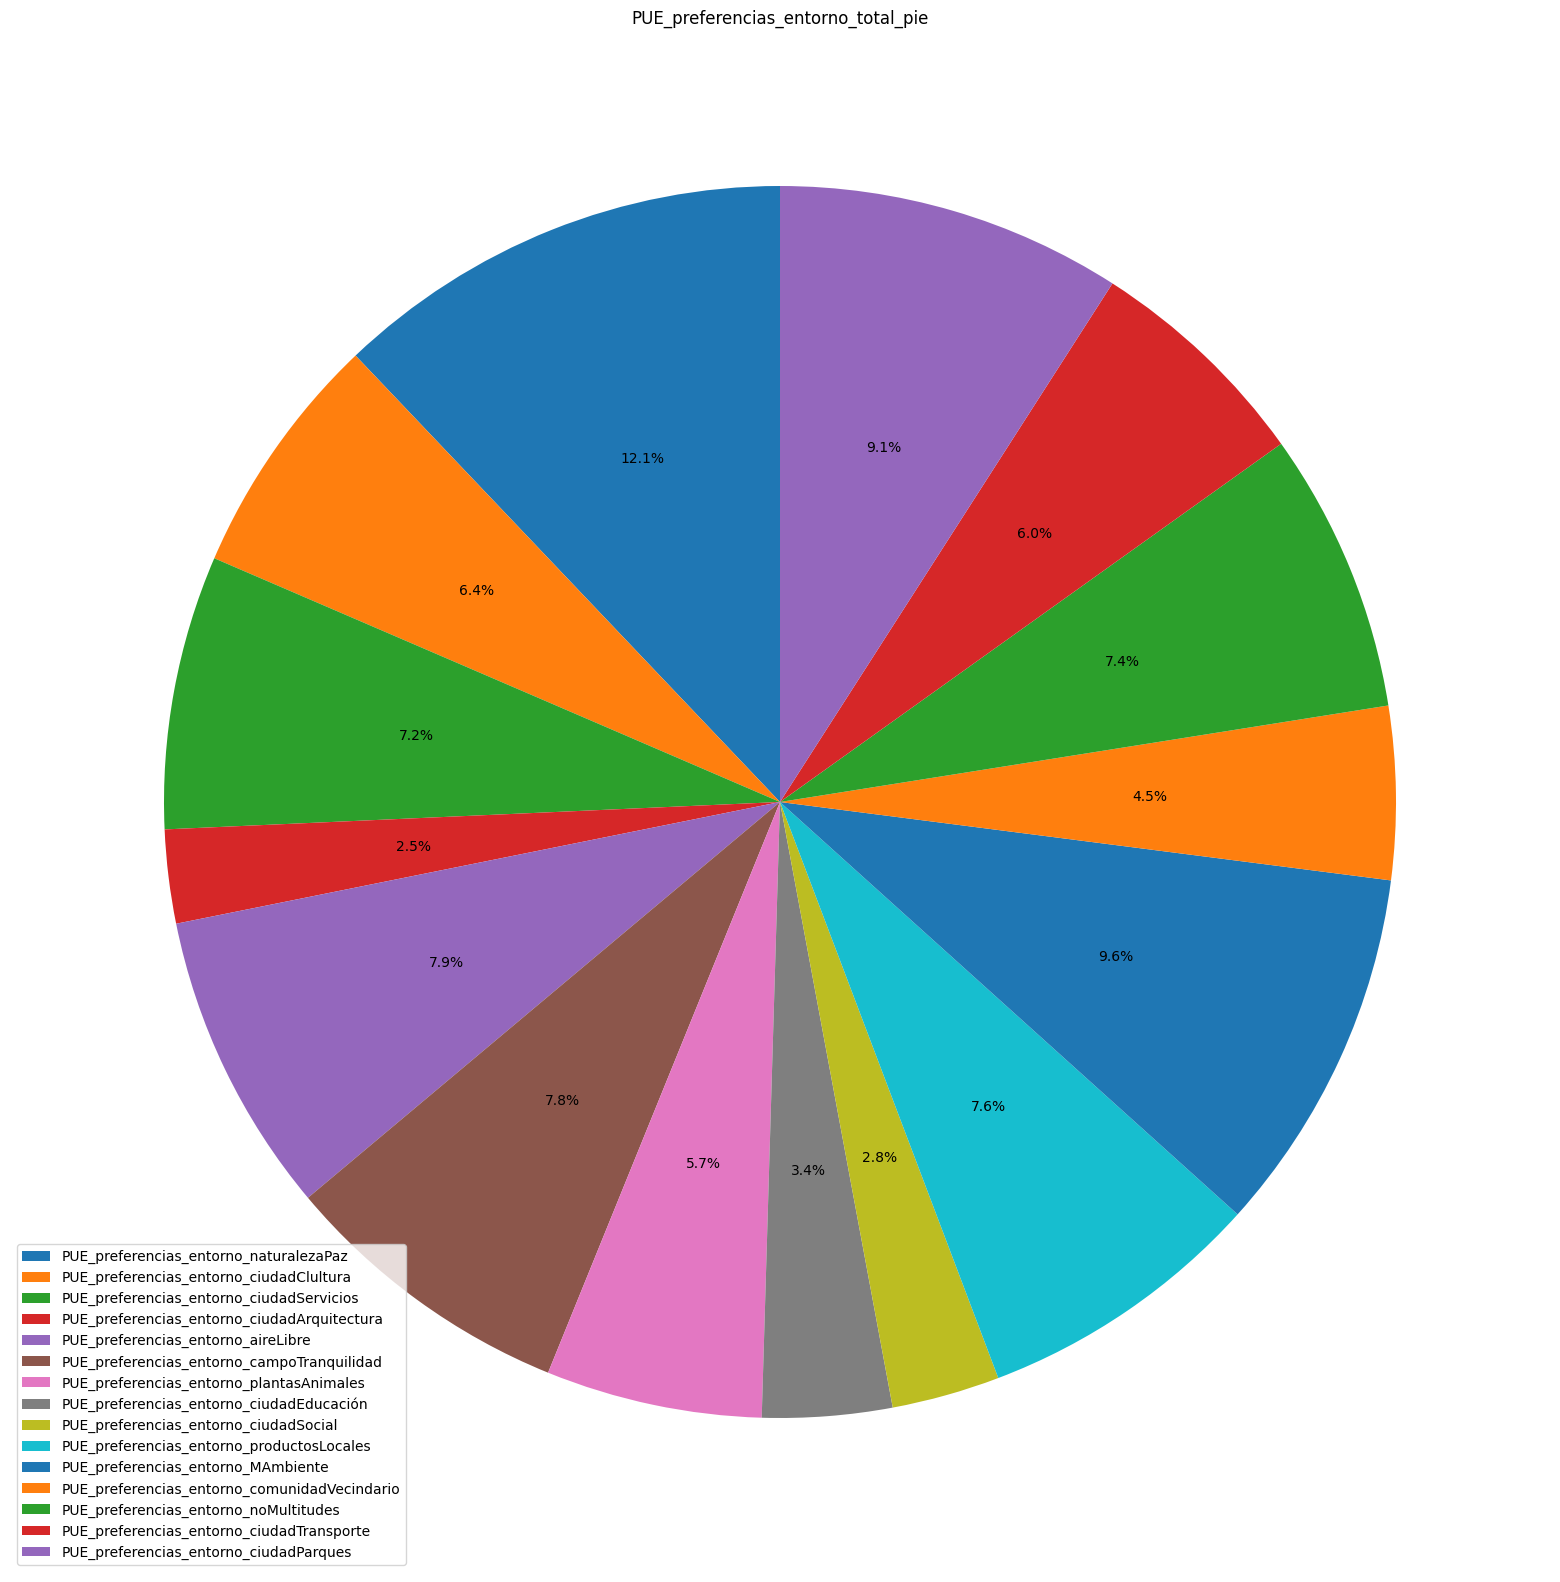

C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\1062145472.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta['PUE_ratioPueblo']=encuesta['PUE_preferencias_entorno_naturalezaPaz']*1+encuesta['PUE_preferencias_entorno_ciudadClultura']*-1+encuesta['PUE_preferencias_entorno_ciudadServicios']*-1+encuesta['PUE_preferencias_entorno_ciudadArquitectura']*-1+encuesta['PUE_preferencias_entorno_aireLibre']*1+encuesta['PUE_preferencias_entorno_campoTranquilidad']*1+encuesta['PUE_preferencias_entorno_plantasAnimales']*1+encuesta['PUE_preferencias_entorno_ciudadEducación']*-1+encuesta['PUE_preferencias_entorno_ciudadSocial']*-1+encuesta['PUE_preferencias_entorno_productosLocales']*1+encuesta['PUE_preferencias_entorno_MAmbiente']*1+encuesta['PUE_preferencias_

In [69]:
# PUE_preferencias_entorno_

# Change PUE_preferencias_entorno to binary
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Me siento en paz en espacios naturales como bosques o campos.'),'PUE_preferencias_entorno_naturalezaPaz'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Disfruto de las opciones culturales y de entretenimiento que ofrece la vida en la ciudad.'),'PUE_preferencias_entorno_ciudadClultura'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Valorizo la comodidad de tener acceso a tiendas y servicios cercanos.'),'PUE_preferencias_entorno_ciudadServicios'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Encuentro inspiración en la arquitectura urbana y la vida en la ciudad.'),'PUE_preferencias_entorno_ciudadArquitectura'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Disfruto de actividades al aire libre como senderismo o campamentos.'),'PUE_preferencias_entorno_aireLibre'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Prefiero la tranquilidad del campo a la vida en la ciudad.'),'PUE_preferencias_entorno_campoTranquilidad'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Me gusta trabajar en el jardín y cuidar de las plantas y animales.'),'PUE_preferencias_entorno_plantasAnimales'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Valorizo las oportunidades de carrera y educación en áreas urbanas.'),'PUE_preferencias_entorno_ciudadEducación'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Me emociona la idea de conocer gente nueva constantemente.'),'PUE_preferencias_entorno_ciudadSocial'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Prefiero los productos agrícolas frescos y locales.'),'PUE_preferencias_entorno_productosLocales'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Me preocupa el impacto ambiental.'),'PUE_preferencias_entorno_MAmbiente'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Valoro la comunidad y la colaboración en mi vecindario.'),'PUE_preferencias_entorno_comunidadVecindario'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('No me gustan las multitudes.'),'PUE_preferencias_entorno_noMultitudes'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Valoro la accesibilidad de los medios de transporte en la ciudad.'),'PUE_preferencias_entorno_ciudadTransporte'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Valoro la proximidad a parques y espacios verdes en la ciudad:'),'PUE_preferencias_entorno_ciudadParques'] = 1

# compile
encuesta.drop(['PUE_preferencias_entorno'], axis=1, inplace=True)# Drop PUE_preferencias_entorno
PUE_preferencias_entorno=encuesta.filter(regex='^PUE_preferencias_entorno').fillna(0)# Fill na
PUE_preferencias_entorno = PUE_preferencias_entorno.astype(int)# Change PUE_preferencias_entorno to int
encuesta[PUE_preferencias_entorno.columns] = PUE_preferencias_entorno# Add PUE_preferencias_entorno to encuesta
print(encuesta.shape)

# plot
PUE_preferencias_entorno_total=PUE_preferencias_entorno.T
PUE_preferencias_entorno_total['total']=PUE_preferencias_entorno_total.sum(axis=1)
PUE_preferencias_entorno_total_pie=PUE_preferencias_entorno_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='PUE_preferencias_entorno_total_pie',figsize=(20,20))
plt.ylabel('')
plt.show()

# PUE_ratioPueblo
encuesta['PUE_ratioPueblo']=encuesta['PUE_preferencias_entorno_naturalezaPaz']*1+encuesta['PUE_preferencias_entorno_ciudadClultura']*-1+encuesta['PUE_preferencias_entorno_ciudadServicios']*-1+encuesta['PUE_preferencias_entorno_ciudadArquitectura']*-1+encuesta['PUE_preferencias_entorno_aireLibre']*1+encuesta['PUE_preferencias_entorno_campoTranquilidad']*1+encuesta['PUE_preferencias_entorno_plantasAnimales']*1+encuesta['PUE_preferencias_entorno_ciudadEducación']*-1+encuesta['PUE_preferencias_entorno_ciudadSocial']*-1+encuesta['PUE_preferencias_entorno_productosLocales']*1+encuesta['PUE_preferencias_entorno_MAmbiente']*1+encuesta['PUE_preferencias_entorno_comunidadVecindario']*0.5+encuesta['PUE_preferencias_entorno_noMultitudes']*1+encuesta['PUE_preferencias_entorno_ciudadTransporte']*-1+encuesta['PUE_preferencias_entorno_ciudadParques']*0.5

PUE_rural_ciudad
Un poco más cómodo/a en el campo     24
Mucho más cómodo/a en el campo       23
Un poco más cómodo/a en la ciudad    21
Mucho más cómodo/a en la ciudad       8
Name: count, dtype: int64

 (76, 161)


C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\1710572191.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_rural_ciudad']=="Mucho más cómodo/a en la ciudad",'PUE_rural_ciudad_']=0
C:\Users\xavie\AppData\Local\Temp\ipykernel_10992\1710572191.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_PUE_rural_ciudad']==0,'PUE_ratioPueblo2'] = -4


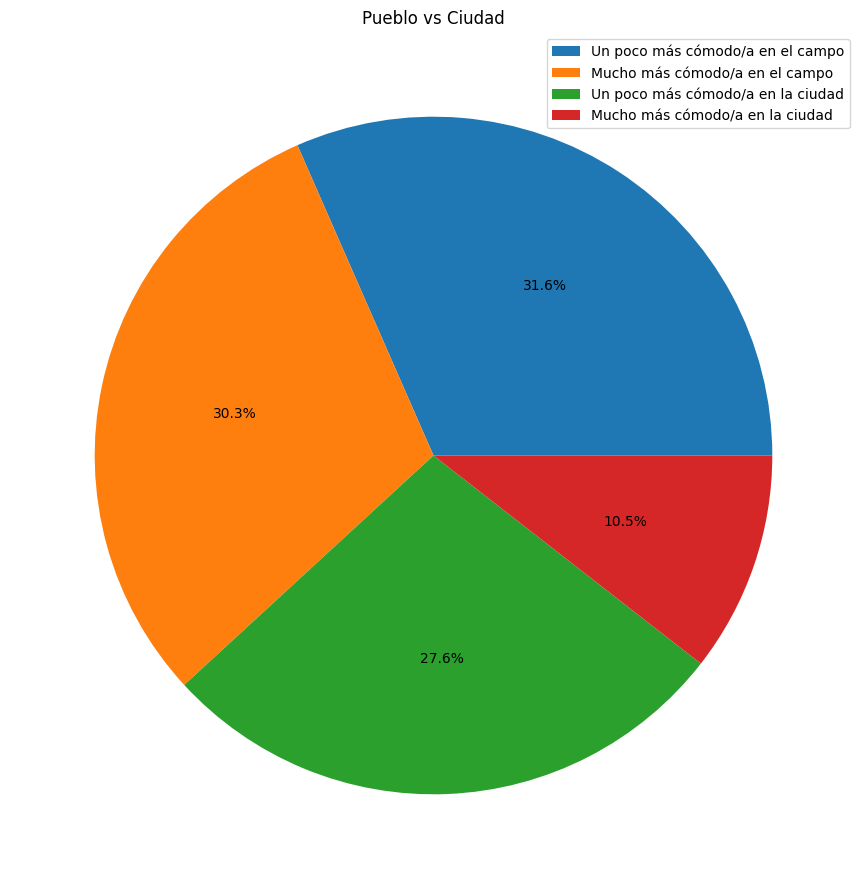

In [70]:
# XX_PUE_rural_ciudad

# plot
print(encuesta['PUE_rural_ciudad'].value_counts())
encuesta['PUE_rural_ciudad'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, labels=None, title='Pueblo vs Ciudad', figsize=(11,11))
plt.ylabel('')


# to categorical
encuesta.loc[encuesta['PUE_rural_ciudad']=="Mucho más cómodo/a en la ciudad",'PUE_rural_ciudad_']=0
encuesta.loc[encuesta['PUE_rural_ciudad']=="Un poco más cómodo/a en la ciudad",'PUE_rural_ciudad_']=1/3
encuesta.loc[encuesta['PUE_rural_ciudad']=="Un poco más cómodo/a en el campo",'PUE_rural_ciudad_']=2/3
encuesta.loc[encuesta['PUE_rural_ciudad']=="Mucho más cómodo/a en el campo",'PUE_rural_ciudad_']=1

# Drop PUE_rural_ciudad
encuesta.drop(['PUE_rural_ciudad'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_rural_ciudad_':'XX_PUE_rural_ciudad'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo2
encuesta.loc[encuesta['XX_PUE_rural_ciudad']==0,'PUE_ratioPueblo2'] = -4
encuesta.loc[encuesta['XX_PUE_rural_ciudad']==1/3,'PUE_ratioPueblo2'] = -2
encuesta.loc[encuesta['XX_PUE_rural_ciudad']==2/3,'PUE_ratioPueblo2'] = 2
encuesta.loc[encuesta['XX_PUE_rural_ciudad']==1,'PUE_ratioPueblo2'] = 4

C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\2520301247.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_rural_ciudad2']=="Un entorno rural donde todos se conocen.",'PUE_rural_ciudad2_']=1


PUE_rural_ciudad2
Un entorno rural donde todos se conocen.         47
Un entorno urbano con diversidad de personas.    29
Name: count, dtype: int64

 (76, 162)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\2520301247.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_rural_ciudad2_Rural']==0,'PUE_ratioPueblo3'] = -4


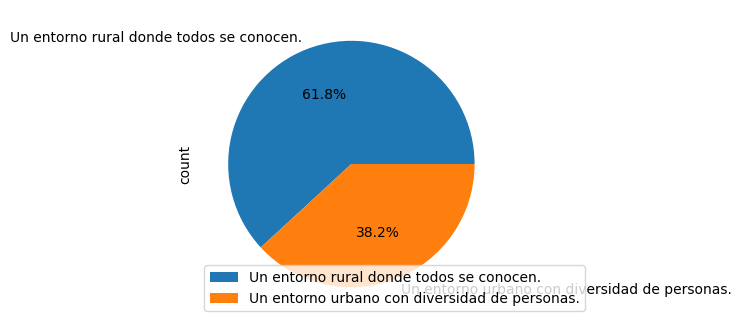

In [23]:
# PUE_rural_ciudad2

# plot
print(encuesta['PUE_rural_ciudad2'].value_counts())
encuesta['PUE_rural_ciudad2'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['PUE_rural_ciudad2']=="Un entorno rural donde todos se conocen.",'PUE_rural_ciudad2_']=1
encuesta['PUE_rural_ciudad2_']=encuesta['PUE_rural_ciudad2_'].fillna(0).astype(int)

# Drop PUE_rural_ciudad2
encuesta.drop(['PUE_rural_ciudad2'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_rural_ciudad2_':'PUE_rural_ciudad2_Rural'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo3
encuesta.loc[encuesta['PUE_rural_ciudad2_Rural']==0,'PUE_ratioPueblo3'] = -4
encuesta.loc[encuesta['PUE_rural_ciudad2_Rural']==1,'PUE_ratioPueblo3'] = 4

PUE_aire_libre
A menudo     41
Raramente    23
Siempre      10
Nunca         2
Name: count, dtype: int64

 (76, 163)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\770222681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_aire_libre']=="Nunca",'PUE_aire_libre_']=0
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\770222681.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_PUE_aire_libre']==0,'PUE_ratioPueblo4'] = -4


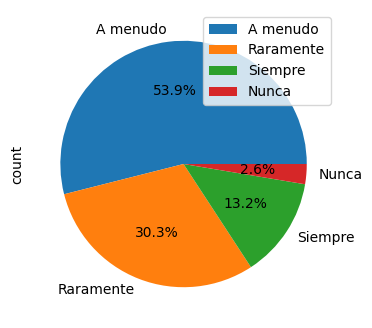

In [24]:
# XX_PUE_aire_libre

# plot
print(encuesta['PUE_aire_libre'].value_counts())
encuesta['PUE_aire_libre'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['PUE_aire_libre']=="Nunca",'PUE_aire_libre_']=0
encuesta.loc[encuesta['PUE_aire_libre']=="Raramente",'PUE_aire_libre_']=1/3
encuesta.loc[encuesta['PUE_aire_libre']=="A menudo",'PUE_aire_libre_']=2/3
encuesta.loc[encuesta['PUE_aire_libre']=="Siempre",'PUE_aire_libre_']=1

# Drop PUE_aire_libre
encuesta.drop(['PUE_aire_libre'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_aire_libre_':'XX_PUE_aire_libre'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo4
encuesta.loc[encuesta['XX_PUE_aire_libre']==0,'PUE_ratioPueblo4'] = -4
encuesta.loc[encuesta['XX_PUE_aire_libre']==1/3,'PUE_ratioPueblo4'] = -2
encuesta.loc[encuesta['XX_PUE_aire_libre']==2/3,'PUE_ratioPueblo4'] = 2
encuesta.loc[encuesta['XX_PUE_aire_libre']==1,'PUE_ratioPueblo4'] = 4

PUE_trabajos_agrícolas
No    51
Sí    25
Name: count, dtype: int64

 (76, 164)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\2571727315.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_trabajos_agrícolas']=="Sí",'PUE_trabajos_agrícolas_']=1
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\2571727315.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_trabajos_agrícolas']==0,'PUE_ratioPueblo5'] = -4


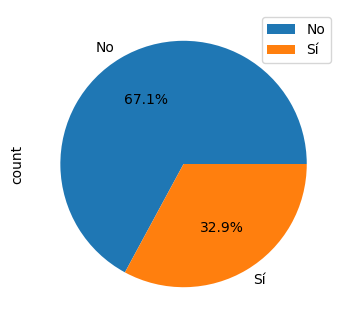

In [25]:
# PUE_trabajos_agrícolas

# plot
print(encuesta['PUE_trabajos_agrícolas'].value_counts())
encuesta['PUE_trabajos_agrícolas'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['PUE_trabajos_agrícolas']=="Sí",'PUE_trabajos_agrícolas_']=1
encuesta['PUE_trabajos_agrícolas_']=encuesta['PUE_trabajos_agrícolas_'].fillna(0).astype(int)

# Drop PUE_trabajos_agrícolas
encuesta.drop(['PUE_trabajos_agrícolas'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_trabajos_agrícolas_':'PUE_trabajos_agrícolas'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo5
encuesta.loc[encuesta['PUE_trabajos_agrícolas']==0,'PUE_ratioPueblo5'] = -4
encuesta.loc[encuesta['PUE_trabajos_agrícolas']==1,'PUE_ratioPueblo5'] = 4

PUE_alimmentación
Compro todo en un supermercado.                                                                                          48
Compro casi todo en el supermercado y cultivo ciertos alimentos (albahaca, rúcula,  menta, fresas, pimientos, etc..).    20
Cultivo vegetales, frutas y complementos alimentarios, y compro el resto en el super mercado.                             5
Compro a domicilio en muchas ocasiones                                                                                    2
No compro nada en el supermercado. (o practicamente nada)                                                                 1
Name: count, dtype: int64


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\3045232950.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_alimmentación']=="Compro a domicilio en muchas ocasiones",'PUE_alimmentación_']=0
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\3045232950.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_PUE_alimmentación']==0,'PUE_ratioPueblo6'] = -4



 (76, 165)


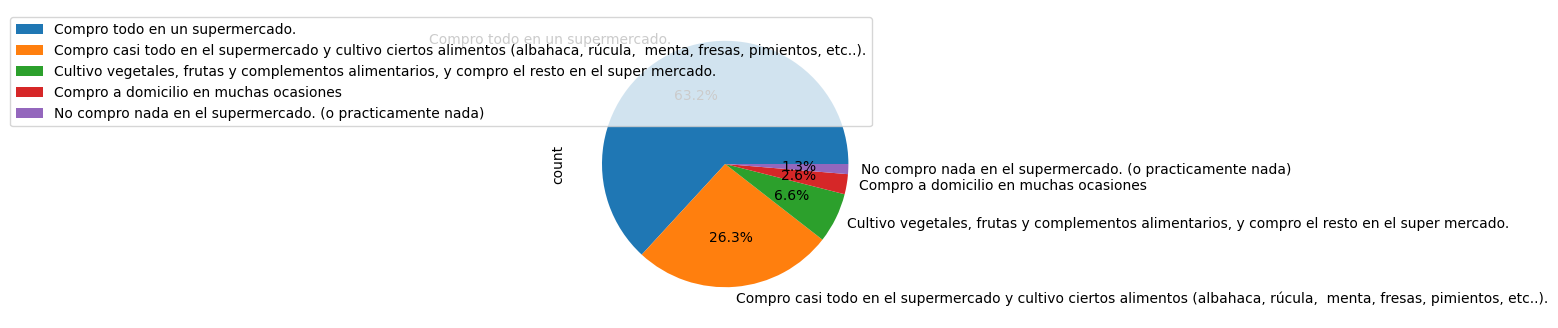

In [26]:
# XX_PUE_alimmentación

# plot
print(encuesta['PUE_alimmentación'].value_counts())
encuesta['PUE_alimmentación'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['PUE_alimmentación']=="Compro a domicilio en muchas ocasiones",'PUE_alimmentación_']=0
encuesta.loc[encuesta['PUE_alimmentación']=="Compro todo en un supermercado.",'PUE_alimmentación_']=1/4
encuesta.loc[encuesta['PUE_alimmentación']=="Compro casi todo en el supermercado y cultivo ciertos alimentos (albahaca, rúcula,  menta, fresas, pimientos, etc..).",'PUE_alimmentación_']=2/4
encuesta.loc[encuesta['PUE_alimmentación']=="Cultivo vegetales, frutas y complementos alimentarios, y compro el resto en el super mercado.",'PUE_alimmentación_']=3/4
encuesta.loc[encuesta['PUE_alimmentación']=="No compro nada en el supermercado. (o practicamente nada)",'PUE_alimmentación_']=1

# Drop PUE_alimmentación
encuesta.drop(['PUE_alimmentación'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_alimmentación_':'XX_PUE_alimmentación'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo6
encuesta.loc[encuesta['XX_PUE_alimmentación']==0,'PUE_ratioPueblo6'] = -4
encuesta.loc[encuesta['XX_PUE_alimmentación']==1/4,'PUE_ratioPueblo6'] = -2
encuesta.loc[encuesta['XX_PUE_alimmentación']==2/4,'PUE_ratioPueblo6'] = 0
encuesta.loc[encuesta['XX_PUE_alimmentación']==3/4,'PUE_ratioPueblo6'] = 2
encuesta.loc[encuesta['XX_PUE_alimmentación']==1,'PUE_ratioPueblo6'] = 4

PUE_ciudad_urbano
Área urbana             53
Gran ciudad             13
No tengo preferencia    10
Name: count, dtype: int64

 (76, 166)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\2084598860.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_ciudad_urbano']=="Gran ciudad",'PUE_ciudad_urbano_']=0
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\2084598860.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_PUE_ciudad_urbano']==0,'PUE_ratioPueblo7'] = -4


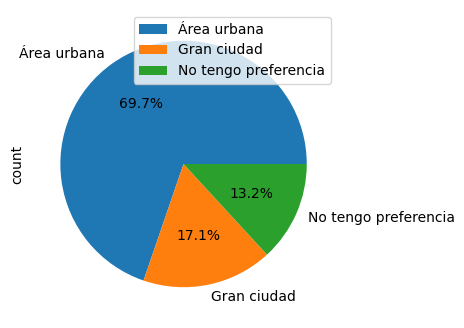

In [27]:
# XX_PUE_ciudad_urbano

# plot
print(encuesta['PUE_ciudad_urbano'].value_counts())
encuesta['PUE_ciudad_urbano'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['PUE_ciudad_urbano']=="Gran ciudad",'PUE_ciudad_urbano_']=0
encuesta.loc[encuesta['PUE_ciudad_urbano']=="No tengo preferencia",'PUE_ciudad_urbano_']=0.5
encuesta.loc[encuesta['PUE_ciudad_urbano']=="Área urbana",'PUE_ciudad_urbano_']=1

# Drop PUE_ciudad_urbano
encuesta.drop(['PUE_ciudad_urbano'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_ciudad_urbano_':'XX_PUE_ciudad_urbano'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo7
encuesta.loc[encuesta['XX_PUE_ciudad_urbano']==0,'PUE_ratioPueblo7'] = -4
encuesta.loc[encuesta['XX_PUE_ciudad_urbano']==0.5,'PUE_ratioPueblo7'] = -2
encuesta.loc[encuesta['XX_PUE_ciudad_urbano']==1,'PUE_ratioPueblo7'] = 0

PUE_cultural_ciudad
Algo        36
Mucho       21
No mucho    15
Nada         4
Name: count, dtype: int64

 (76, 167)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\1126317265.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_cultural_ciudad']=="Mucho",'PUE_cultural_ciudad_']=0
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\1126317265.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_PUE_cultural_ciudad']==0,'PUE_ratioPueblo8'] = -4


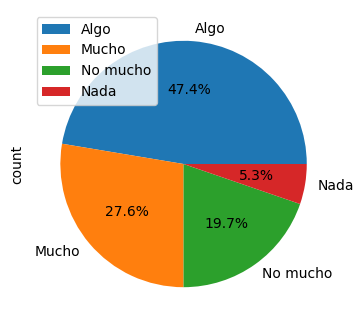

In [28]:
# XX_PUE_cultural_ciudad

# plot
print(encuesta['PUE_cultural_ciudad'].value_counts())
encuesta['PUE_cultural_ciudad'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['PUE_cultural_ciudad']=="Mucho",'PUE_cultural_ciudad_']=0
encuesta.loc[encuesta['PUE_cultural_ciudad']=="Algo",'PUE_cultural_ciudad_']=1/3
encuesta.loc[encuesta['PUE_cultural_ciudad']=="No mucho",'PUE_cultural_ciudad_']=2/3
encuesta.loc[encuesta['PUE_cultural_ciudad']=="Nada",'PUE_cultural_ciudad_']=1

# Drop PUE_cultural_ciudad
encuesta.drop(['PUE_cultural_ciudad'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_cultural_ciudad_':'XX_PUE_cultural_ciudad'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo8
encuesta.loc[encuesta['XX_PUE_cultural_ciudad']==0,'PUE_ratioPueblo8'] = -4
encuesta.loc[encuesta['XX_PUE_cultural_ciudad']==1/3,'PUE_ratioPueblo8'] = -2
encuesta.loc[encuesta['XX_PUE_cultural_ciudad']==2/3,'PUE_ratioPueblo8'] = 2
encuesta.loc[encuesta['XX_PUE_cultural_ciudad']==1,'PUE_ratioPueblo8'] = 4

PUE_ciudad_siempre
Sí    59
No    17
Name: count, dtype: int64

 (76, 168)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\4082778876.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_ciudad_siempre']=="Sí",'PUE_ciudad_siempre_']=1
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\4082778876.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_ciudad_siempre']==0,'PUE_ratioPueblo9'] = 4


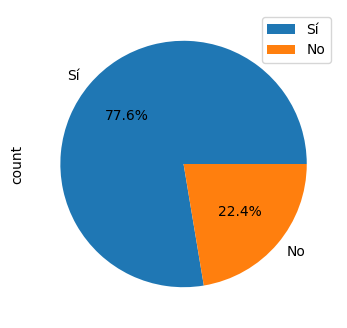

In [29]:
# PUE_ciudad_siempre

# plot
print(encuesta['PUE_ciudad_siempre'].value_counts())
encuesta['PUE_ciudad_siempre'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['PUE_ciudad_siempre']=="Sí",'PUE_ciudad_siempre_']=1
encuesta['PUE_ciudad_siempre_']=encuesta['PUE_ciudad_siempre_'].fillna(0).astype(int)

# Drop PUE_ciudad_siempre
encuesta.drop(['PUE_ciudad_siempre'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_ciudad_siempre_':'PUE_ciudad_siempre'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo9
encuesta.loc[encuesta['PUE_ciudad_siempre']==0,'PUE_ratioPueblo9'] = 4
encuesta.loc[encuesta['PUE_ciudad_siempre']==1,'PUE_ratioPueblo9'] = -4

In [30]:
# XX_PUE_ratioPueblo

encuesta['PUE_ratioPuebloo']=encuesta['PUE_ratioPueblo']+encuesta['PUE_ratioPueblo2']+encuesta['PUE_ratioPueblo3']+encuesta['PUE_ratioPueblo4']+encuesta['PUE_ratioPueblo5']+encuesta['PUE_ratioPueblo6']+encuesta['PUE_ratioPueblo7']+encuesta['PUE_ratioPueblo8']+encuesta['PUE_ratioPueblo9']
encuesta.drop(['PUE_ratioPueblo', 'PUE_ratioPueblo2', 'PUE_ratioPueblo3', 'PUE_ratioPueblo4', 'PUE_ratioPueblo5', 'PUE_ratioPueblo6', 'PUE_ratioPueblo7', 'PUE_ratioPueblo8', 'PUE_ratioPueblo9'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_ratioPuebloo':'XX_PUE_ratioPueblo'}, inplace=True)

# standarize to 0-1
encuesta['XX_PUE_ratioPueblo'] = (encuesta['XX_PUE_ratioPueblo']-encuesta['XX_PUE_ratioPueblo'].min())/(encuesta['XX_PUE_ratioPueblo'].max()-encuesta['XX_PUE_ratioPueblo'].min())
print(encuesta.shape)

(76, 161)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\1642449023.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta['PUE_ratioPuebloo']=encuesta['PUE_ratioPueblo']+encuesta['PUE_ratioPueblo2']+encuesta['PUE_ratioPueblo3']+encuesta['PUE_ratioPueblo4']+encuesta['PUE_ratioPueblo5']+encuesta['PUE_ratioPueblo6']+encuesta['PUE_ratioPueblo7']+encuesta['PUE_ratioPueblo8']+encuesta['PUE_ratioPueblo9']


## 1.4 OBJ (Objetivo): OBJ_zona_temperatura_, OBJ_zona_clima_estable, XX_OBJ_zona_clima2_seco, OBJ_zona_vivir_, XX_OBJ_zona_población, XX_OBJ_zona_proximidad

C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\88367288.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_temperatura'].str.contains('Frio'),'OBJ_zona_temperatura_frio'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\88367288.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_temperatura'].str.contains('Medio'),'OBJ_zona_temperatura_medio'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\88367288.py:6: PerformanceWarning: DataFrame is highly fragment

(76, 164)


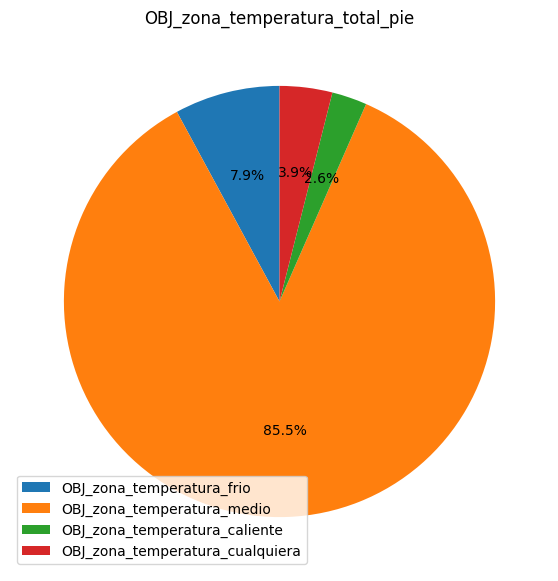

In [31]:
# OBJ_zona_temperatura_

# Change OBJ_zona_temperatura to binary
encuesta.loc[encuesta['OBJ_zona_temperatura'].str.contains('Frio'),'OBJ_zona_temperatura_frio'] = 1
encuesta.loc[encuesta['OBJ_zona_temperatura'].str.contains('Medio'),'OBJ_zona_temperatura_medio'] = 1
encuesta.loc[encuesta['OBJ_zona_temperatura'].str.contains('Caliente'),'OBJ_zona_temperatura_caliente'] = 1
encuesta.loc[encuesta['OBJ_zona_temperatura'].str.contains('Cualquiera'),'OBJ_zona_temperatura_cualquiera'] = 1

# compile
encuesta.drop(['OBJ_zona_temperatura'], axis=1, inplace=True)# Drop OBJ_zona_temperatura
OBJ_zona_temperatura=encuesta.filter(regex='^OBJ_zona_temperatura').fillna(0)# Fill na
OBJ_zona_temperatura = OBJ_zona_temperatura.astype(int)# Change OBJ_zona_temperatura to int
encuesta[OBJ_zona_temperatura.columns] = OBJ_zona_temperatura# Add OBJ_zona_temperatura to encuesta
print(encuesta.shape)

# plot
OBJ_zona_temperatura_total=OBJ_zona_temperatura.T
OBJ_zona_temperatura_total['total']=OBJ_zona_temperatura_total.sum(axis=1)
OBJ_zona_temperatura_total_pie=OBJ_zona_temperatura_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='OBJ_zona_temperatura_total_pie',figsize=(7,7))
plt.ylabel('')
plt.show()

OBJ_zona_clima
Que no cambien mucho las temperaturas a lo largo del año.        64
Que hayan extremos. Verano mucho calor e Invierno mucho frio.    12
Name: count, dtype: int64

 (76, 164)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\1582949856.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_clima']=="Que no cambien mucho las temperaturas a lo largo del año.",'OBJ_zona_clima_']=1


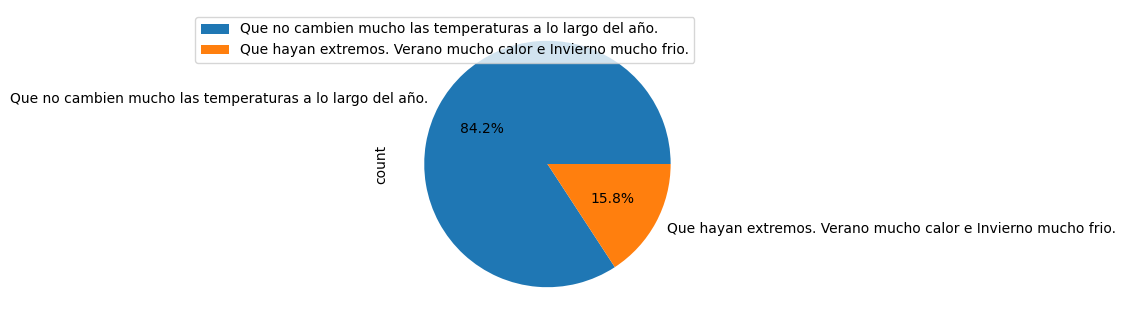

In [32]:
# OBJ_zona_clima_estable

# plot
print(encuesta['OBJ_zona_clima'].value_counts())
encuesta['OBJ_zona_clima'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['OBJ_zona_clima']=="Que no cambien mucho las temperaturas a lo largo del año.",'OBJ_zona_clima_']=1
encuesta['OBJ_zona_clima_']=encuesta['OBJ_zona_clima_'].fillna(0).astype(int)

# Drop OBJ_zona_clima
encuesta.drop(['OBJ_zona_clima'], axis=1, inplace=True)
encuesta.rename(columns={'OBJ_zona_clima_':'OBJ_zona_clima_estable'}, inplace=True)
print("\n",encuesta.shape)

OBJ_zona_clima2
Seco          40
Cualquiera    22
Húmedo        14
Name: count, dtype: int64

 (76, 164)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\135725698.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_clima2']=="Húmedo",'OBJ_zona_clima2_']=0


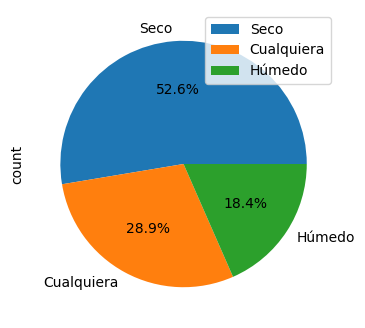

In [33]:
# XX_OBJ_zona_clima2_seco

# plot
print(encuesta['OBJ_zona_clima2'].value_counts())
encuesta['OBJ_zona_clima2'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['OBJ_zona_clima2']=="Húmedo",'OBJ_zona_clima2_']=0
encuesta.loc[encuesta['OBJ_zona_clima2']=="Cualquiera",'OBJ_zona_clima2_']=0.5
encuesta.loc[encuesta['OBJ_zona_clima2']=="Seco",'OBJ_zona_clima2_']=1

# Drop OBJ_zona_clima2
encuesta.drop(['OBJ_zona_clima2'], axis=1, inplace=True)
encuesta.rename(columns={'OBJ_zona_clima2_':'XX_OBJ_zona_clima2_seco'}, inplace=True)
print("\n",encuesta.shape)

(76, 169)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\2589914764.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona costera'),'OBJ_zona_vivir_costera'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\2589914764.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona de montaña'),'OBJ_zona_vivir_montaña'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\2589914764.py:6: PerformanceWarning: DataFrame is highly fra

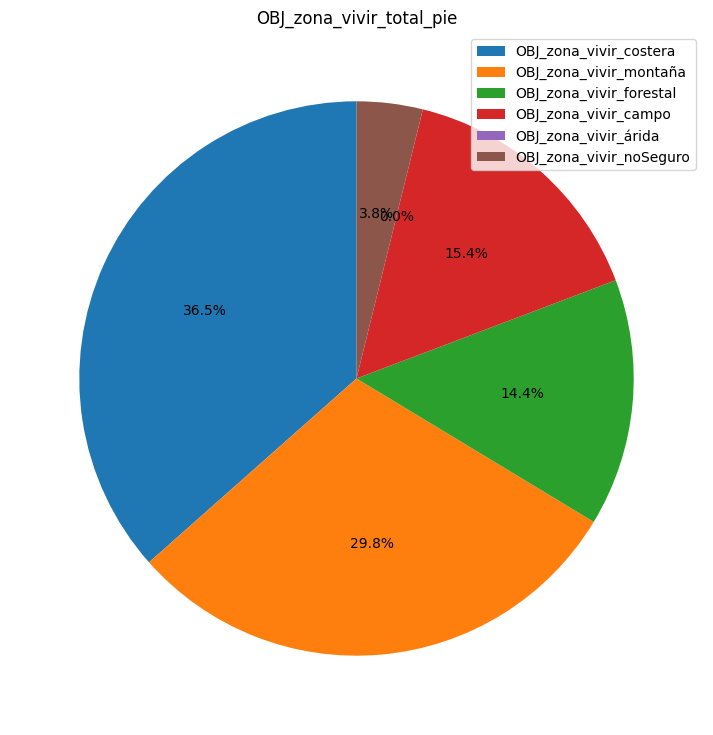

In [34]:
# OBJ_zona_vivir_

# Change OBJ_zona_vivir to binary
encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona costera'),'OBJ_zona_vivir_costera'] = 1
encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona de montaña'),'OBJ_zona_vivir_montaña'] = 1
encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona forestal'),'OBJ_zona_vivir_forestal'] = 1
encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona de campo'),'OBJ_zona_vivir_campo'] = 1
encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona árida'),'OBJ_zona_vivir_árida'] = 1
encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('No estoy seguro/No aplica'),'OBJ_zona_vivir_noSeguro'] = 1

# compile
encuesta.drop(['OBJ_zona_vivir'], axis=1, inplace=True)# Drop OBJ_zona_vivir
OBJ_zona_vivir=encuesta.filter(regex='^OBJ_zona_vivir').fillna(0)# Fill na
OBJ_zona_vivir = OBJ_zona_vivir.astype(int)# Change OBJ_zona_vivir to int
encuesta[OBJ_zona_vivir.columns] = OBJ_zona_vivir# Add OBJ_zona_vivir to encuesta
print(encuesta.shape)

# plot
OBJ_zona_vivir_total=OBJ_zona_vivir.T
OBJ_zona_vivir_total['total']=OBJ_zona_vivir_total.sum(axis=1)
OBJ_zona_vivir_total_pie=OBJ_zona_vivir_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='OBJ_zona_vivir_total_pie',figsize=(9,9))
plt.ylabel('')
plt.show()

C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\3867676243.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_población']=="Muy alto (ciudad grande: Mexico DF)",'OBJ_zona_población_']=0


OBJ_zona_población
Medio (ciudad pequeña: Granollers)          37
Alto (ciudad media: Barcelona)              16
Bajo (pueblos)                              16
Muy alto (ciudad grande: Mexico DF)          2
Muy Bajo (aldeas o pueblos muy pequeños)     2
Pueblos en riesgo de despoblación            2
Cualquiera                                   1
Name: count, dtype: int64

 (76, 169)


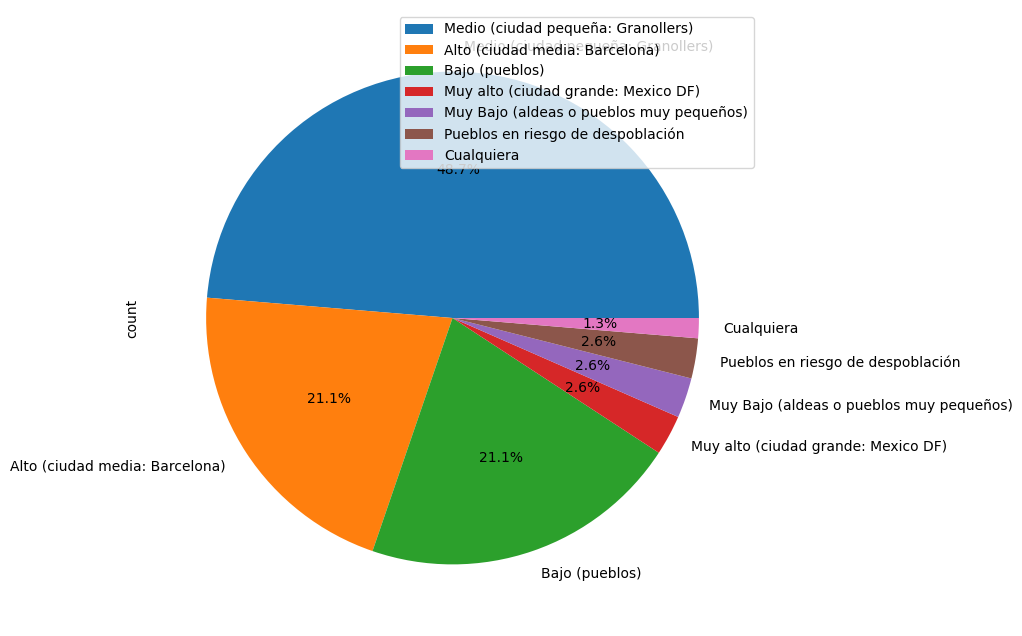

In [35]:
# XX_OBJ_zona_población

# plot
print(encuesta['OBJ_zona_población'].value_counts())
encuesta['OBJ_zona_población'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(8,8))

# to categorical
encuesta.loc[encuesta['OBJ_zona_población']=="Muy alto (ciudad grande: Mexico DF)",'OBJ_zona_población_']=0
encuesta.loc[encuesta['OBJ_zona_población']=="Alto (ciudad media: Barcelona)",'OBJ_zona_población_']=1/5
encuesta.loc[encuesta['OBJ_zona_población']=="Medio (ciudad pequeña: Granollers)",'OBJ_zona_población_']=2/5
encuesta.loc[encuesta['OBJ_zona_población']=="Cualquiera",'OBJ_zona_población_']=0.5
encuesta.loc[encuesta['OBJ_zona_población']=="Bajo (pueblos)",'OBJ_zona_población_']=3/5
encuesta.loc[encuesta['OBJ_zona_población']=="Muy Bajo (aldeas o pueblos muy pequeños)",'OBJ_zona_población_']=4/5
encuesta.loc[encuesta['OBJ_zona_población']=="Pueblos en riesgo de despoblación",'OBJ_zona_población_']=1


# Drop OBJ_zona_población
encuesta.drop(['OBJ_zona_población'], axis=1, inplace=True)
encuesta.rename(columns={'OBJ_zona_población_':'XX_OBJ_zona_población'}, inplace=True)
print("\n",encuesta.shape)

C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\1324800071.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_proximidad']=="Mucho (deben estar cerca)",'OBJ_zona_proximidad_']=0


OBJ_zona_proximidad
Medio                        38
Mucho (deben estar cerca)    31
Poco                          7
Name: count, dtype: int64

 (76, 169)


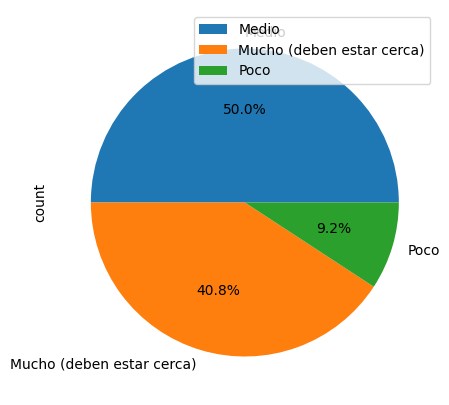

In [36]:
# XX_OBJ_zona_proximidad

# plot
print(encuesta['OBJ_zona_proximidad'].value_counts())
encuesta['OBJ_zona_proximidad'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(5,5))

# to categorical
encuesta.loc[encuesta['OBJ_zona_proximidad']=="Mucho (deben estar cerca)",'OBJ_zona_proximidad_']=0
encuesta.loc[encuesta['OBJ_zona_proximidad']=="Medio",'OBJ_zona_proximidad_']=0.5
encuesta.loc[encuesta['OBJ_zona_proximidad']=="Cualquiera",'OBJ_zona_proximidad_']=0.6
encuesta.loc[encuesta['OBJ_zona_proximidad']=="Poco",'OBJ_zona_proximidad_']=1

# Drop OBJ_zona_proximidad
encuesta.drop(['OBJ_zona_proximidad'], axis=1, inplace=True)
encuesta.rename(columns={'OBJ_zona_proximidad_':'XX_OBJ_zona_proximidad'}, inplace=True)
print("\n",encuesta.shape)

## 1.5 TFM (Treball Final Máster): TFM_espacios_, TFM_actividades, TFM_compartir, TFM_muadrse

(76, 175)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\640010794.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_espacios'].str.contains('Fuera de casa (trabajo, estudio, ocio, etc…)',regex=False),'TFM_espacios_fuera'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\640010794.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_espacios'].str.contains('Dormitorio (dormir + otros)',regex=False),'TFM_espacios_dormitorio'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\6

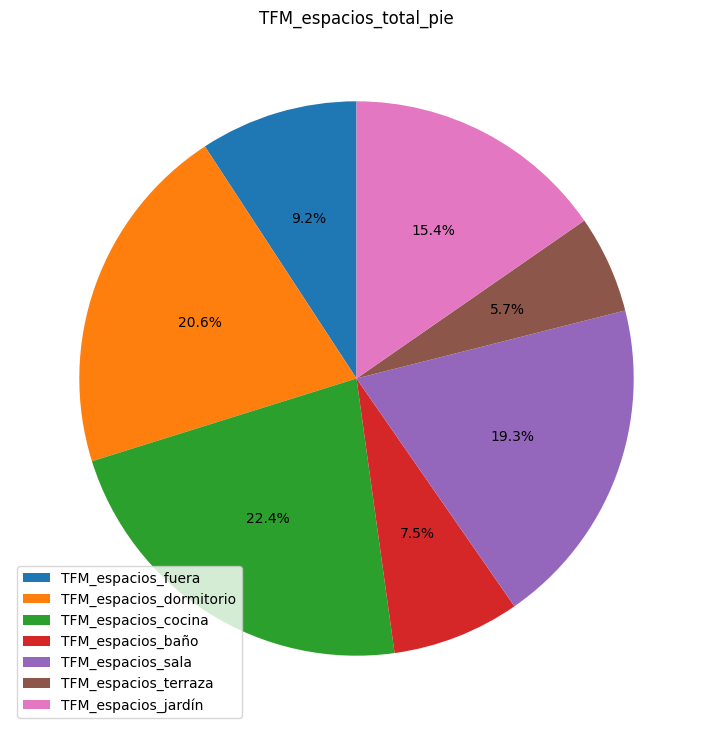

In [37]:
# TFM_espacios_

# Change TFM_espacios to binary
encuesta.loc[encuesta['TFM_espacios'].str.contains('Fuera de casa (trabajo, estudio, ocio, etc…)',regex=False),'TFM_espacios_fuera'] = 1
encuesta.loc[encuesta['TFM_espacios'].str.contains('Dormitorio (dormir + otros)',regex=False),'TFM_espacios_dormitorio'] = 1
encuesta.loc[encuesta['TFM_espacios'].str.contains('Cocina'),'TFM_espacios_cocina'] = 1
encuesta.loc[encuesta['TFM_espacios'].str.contains('Baño'),'TFM_espacios_baño'] = 1
encuesta.loc[encuesta['TFM_espacios'].str.contains('Sala de estar'),'TFM_espacios_sala'] = 1
encuesta.loc[encuesta['TFM_espacios'].str.contains('Terraza'),'TFM_espacios_terraza'] = 1
encuesta.loc[encuesta['TFM_espacios'].str.contains('Jardín'),'TFM_espacios_jardín'] = 1

# compile
encuesta.drop(['TFM_espacios'], axis=1, inplace=True)# Drop TFM_espacios
TFM_espacios=encuesta.filter(regex='^TFM_espacios').fillna(0)# Fill na
TFM_espacios = TFM_espacios.astype(int)# Change TFM_espacios to int
encuesta[TFM_espacios.columns] = TFM_espacios# Add TFM_espacios to encuesta
print(encuesta.shape)

# plot
TFM_espacios_total=TFM_espacios.T
TFM_espacios_total['total']=TFM_espacios_total.sum(axis=1)
TFM_espacios_total_pie=TFM_espacios_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='TFM_espacios_total_pie',figsize=(9,9))
plt.ylabel('')
plt.show()

(76, 183)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\3298452275.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_actividades'].str.contains('Leer'),'TFM_actividades_leer'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\3298452275.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_actividades'].str.contains('Cocinar'),'TFM_actividades_cocinar'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\3298452275.py:6: PerformanceWarning: DataFrame is highly fragmented.  This 

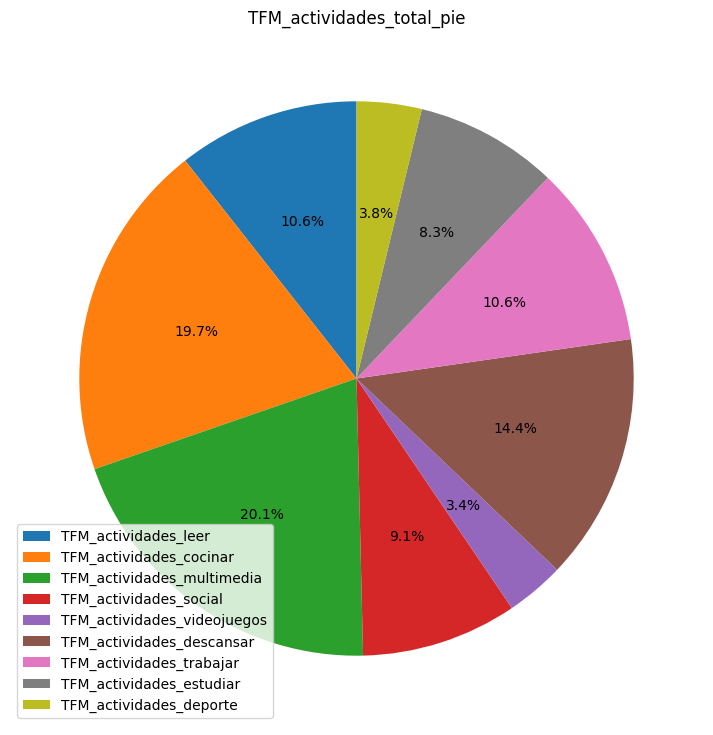

In [38]:
# TFM_actividades_

# Change TFM_actividades to binary
encuesta.loc[encuesta['TFM_actividades'].str.contains('Leer'),'TFM_actividades_leer'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Cocinar'),'TFM_actividades_cocinar'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Ver contenido multimedia'),'TFM_actividades_multimedia'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Reuniones sociales en el hogar'),'TFM_actividades_social'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Videojuegos'),'TFM_actividades_videojuegos'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Descansar (no cuenta dormir por la noche)', regex=False),'TFM_actividades_descansar'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Trabajar'),'TFM_actividades_trabajar'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Estudiar'),'TFM_actividades_estudiar'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Hacer deporte'),'TFM_actividades_deporte'] = 1

# compile
encuesta.drop(['TFM_actividades'], axis=1, inplace=True)# Drop TFM_actividades
TFM_actividades=encuesta.filter(regex='^TFM_actividades').fillna(0)# Fill na
TFM_actividades = TFM_actividades.astype(int)# Change TFM_actividades to int
encuesta[TFM_actividades.columns] = TFM_actividades# Add TFM_actividades to encuesta
print(encuesta.shape)

# plot
TFM_actividades_total=TFM_actividades.T
TFM_actividades_total['total']=TFM_actividades_total.sum(axis=1)
TFM_actividades_total_pie=TFM_actividades_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='TFM_actividades_total_pie',figsize=(9,9))
plt.ylabel('')
plt.show()

TFM_compartir
No    48
Si    28
Name: count, dtype: int64

 (76, 183)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\139929348.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_compartir']=="Si",'TFM_compartir_']=1


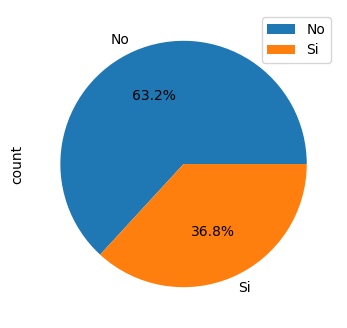

In [39]:
# TFM_compartir

# plot
print(encuesta['TFM_compartir'].value_counts())
encuesta['TFM_compartir'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['TFM_compartir']=="Si",'TFM_compartir_']=1
encuesta['TFM_compartir_']=encuesta['TFM_compartir_'].fillna(0).astype(int)

# Drop TFM_compartir
encuesta.drop(['TFM_compartir'], axis=1, inplace=True)
encuesta.rename(columns={'TFM_compartir_':'TFM_compartir'}, inplace=True)
print("\n",encuesta.shape)

(76, 187)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\3759458732.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Sala de estar'),'TFM_compartir_no_sala'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\3759458732.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Cocina'),'TFM_compartir_no_cocina'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\3759458732.py:9: PerformanceWarning: DataFrame is highly fragmen

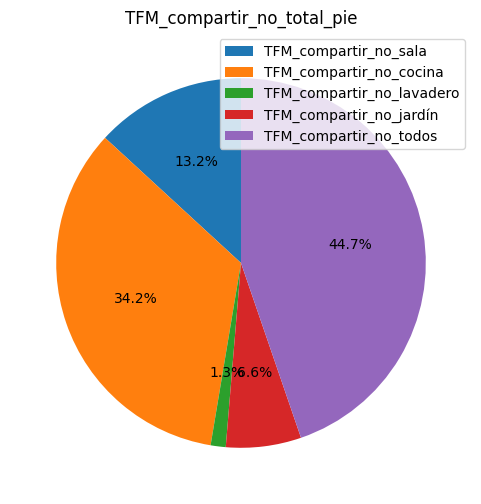

In [40]:
# TFM_compartir_no

#fill na to 'Todos
encuesta['TFM_compartir_no'].fillna('Todos', inplace=True)

# Change TFM_compartir_no to binary
encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Sala de estar'),'TFM_compartir_no_sala'] = 1
encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Cocina'),'TFM_compartir_no_cocina'] = 1
encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Lavadero'),'TFM_compartir_no_lavadero'] = 1
encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Jardin'),'TFM_compartir_no_jardín'] = 1
encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Todos'),'TFM_compartir_no_todos'] = 1

# compile
encuesta.drop(['TFM_compartir_no'], axis=1, inplace=True)# Drop TFM_compartir_no
TFM_compartir_no=encuesta.filter(regex='^TFM_compartir_no').fillna(0)# Fill na
TFM_compartir_no = TFM_compartir_no.astype(int)# Change TFM_compartir_no to int
encuesta[TFM_compartir_no.columns] = TFM_compartir_no# Add TFM_compartir_no to encuesta
print(encuesta.shape)

# plot
TFM_compartir_no_total=TFM_compartir_no.T
TFM_compartir_no_total['total']=TFM_compartir_no_total.sum(axis=1)
TFM_compartir_no_total_pie=TFM_compartir_no_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='TFM_compartir_no_total_pie',figsize=(6,6))
plt.ylabel('')
plt.show()

TFM_muadrse
Si    52
No    24
Name: count, dtype: int64

 (76, 187)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\645999273.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_muadrse']=="Si",'TFM_muadrse_']=1


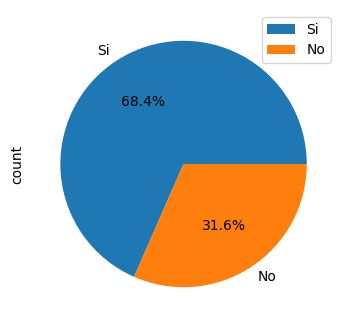

In [41]:
# TFM_muadrse

# plot
print(encuesta['TFM_muadrse'].value_counts())
encuesta['TFM_muadrse'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['TFM_muadrse']=="Si",'TFM_muadrse_']=1
encuesta['TFM_muadrse_']=encuesta['TFM_muadrse_'].fillna(0).astype(int)

# Drop TFM_muadrse
encuesta.drop(['TFM_muadrse'], axis=1, inplace=True)
encuesta.rename(columns={'TFM_muadrse_':'TFM_muadrse'}, inplace=True)
print("\n",encuesta.shape)

In [42]:
encuesta['correoo']=encuesta['correo']
encuesta.drop(['correo'], axis=1, inplace=True)
encuesta.rename(columns={'correoo':'correo'}, inplace=True)
encuesta['correo'].fillna('No', inplace=True)

C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\245192305.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta['correoo']=encuesta['correo']


# 2. Clusterización OBJ (Ojetivo)

In [43]:
encuesta1=encuesta.copy()
encuesta=encuesta.drop(['OBJ_zona_vivir_árida','correo'], axis=1)
OBJ=encuesta.filter(regex='OBJ_')

addcolumns=['PP_sobre_ti_social','PP_sobre_ti_familia','PP_sobre_ti_aventurero','PP_sobre_ti_espiritualidad','PP_sobre_ti_vivir','PP_sobre_ti_minimalista','PP_sobre_ti_MAmbiente','PP_sobre_ti_playa','PP_sobre_ti_deporte','PP_sobre_ti_aireLibre','PP_sobre_ti_tecnología','PUE_preferencias_entorno_naturalezaPaz','PUE_preferencias_entorno_ciudadClultura','PUE_preferencias_entorno_ciudadServicios','PUE_preferencias_entorno_ciudadArquitectura','PUE_preferencias_entorno_ciudadEducación','PUE_preferencias_entorno_ciudadTransporte','XX_PUE_ratioPueblo']
#addcolumns to OBJ
OBJ[addcolumns]=encuesta[addcolumns]

#drop some columns after checking characteristic importance
OBJ.drop(['OBJ_zona_temperatura_caliente','OBJ_zona_temperatura_cualquiera','PP_sobre_ti_vivir','OBJ_zona_vivir_noSeguro','OBJ_zona_temperatura_frio','OBJ_zona_temperatura_medio','PP_sobre_ti_social','PP_sobre_ti_tecnología','OBJ_zona_clima_estable','PP_sobre_ti_minimalista'], axis=1, inplace=True)

#join some columns
OBJ['XX_PUE_preferencias_entorno_ciudad_CSET']=OBJ['PUE_preferencias_entorno_ciudadClultura']+OBJ['PUE_preferencias_entorno_ciudadServicios']+OBJ['PUE_preferencias_entorno_ciudadEducación']+OBJ['PUE_preferencias_entorno_ciudadTransporte']
OBJ.drop(['PUE_preferencias_entorno_ciudadClultura','PUE_preferencias_entorno_ciudadServicios','PUE_preferencias_entorno_ciudadArquitectura','PUE_preferencias_entorno_ciudadEducación','PUE_preferencias_entorno_ciudadTransporte'], axis=1, inplace=True)
#standarize to 0-1
OBJ['XX_PUE_preferencias_entorno_ciudad_CSET'] = (OBJ['XX_PUE_preferencias_entorno_ciudad_CSET']-OBJ['XX_PUE_preferencias_entorno_ciudad_CSET'].min())/(OBJ['XX_PUE_preferencias_entorno_ciudad_CSET'].max()-OBJ['XX_PUE_preferencias_entorno_ciudad_CSET'].min())
print(OBJ.shape)

print(OBJ.shape)
OBJ.head()

(76, 17)
(76, 17)


C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\636070400.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OBJ[addcolumns]=encuesta[addcolumns]
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\636070400.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OBJ[addcolumns]=encuesta[addcolumns]
C:\Users\xavie\AppData\Local\Temp\ipykernel_3524\636070400.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

XX_OBJ_zona_clima2_seco  OBJ_zona_vivir_costera  OBJ_zona_vivir_montaña   
0                      1.0                       1                       0  \
1                      1.0                       1                       0   
2                      1.0                       0                       1   
3                      0.0                       0                       1   
4                      0.5                       0                       0   

   OBJ_zona_vivir_forestal  OBJ_zona_vivir_campo  XX_OBJ_zona_población   
0                        0                     0                    0.4  \
1                        0                     0                    0.2   
2                        0                     0                    0.2   
3                        1                     0                    0.4   
4                        1                     0                    0.2   

   XX_OBJ_zona_proximidad  PP_sobre_ti_familia  PP_sobre_ti_aventurero   
0                     0.0                    1                       0  \
1                     0.5                    1                       0   
2                     0.0                    0                       0   
3                     0.0                    1                       0   
4                     0.0                    1                       0   

   PP_sobre_ti_espiritualidad  PP_sobre_ti_MAmbiente  PP_sobre_ti_playa   
0                           1                      1                  1  \
1                           0                      0                  0   
2                           0                      0                  0   
3                           0                      1                  0   
4                           0                      1                  1   

   PP_sobre_ti_deporte  PP_sobre_ti_aireLibre   
0                    0                      0  \
1                    0                      1   
2                    0                      0   
3                    0                      0   
4                    0                      0   

   PUE_preferencias_entorno_naturalezaPaz  XX_PUE_ratioPueblo   
0                                       0            0.201681  \
1                                       1            0.243697   
2                                       1            0.378151   
3                                       1            0.201681   
4                                       1            0.294118   

   XX_PUE_preferencias_entorno_ciudad_CSET  
0                                     0.75  
1                                     0.50  
2                                     0.50  
3                                     0.50  
4                                     0.50

## 2.1 FIND K

In [442]:
## Define the parameter values to search
#param_grid = {
#    'n_clusters': [4],  # Número de clústeres
#    'init': ['k-means++', 'random'],  # Método de inicialización de centroides
#    'n_init': ['auto', 'warn', 10],  # Número de veces que se ejecuta el algoritmo con diferentes centroides
#    'max_iter': [100, 300],  # Número máximo de iteraciones
#    'tol': [0.00001, 0.0001],  # Tolerancia para el criterio de parada
#    'random_state': [42],  # Semilla para el generador de números aleatorios
#    'copy_x': [True, False],  # Si se copian los datos de entrada
#    'algorithm': ['elkan', 'lloyd', 'auto']  # Algoritmo utilizado para el cálculo de los centroides
#}

In [443]:
## Build a instance of K-means
#kmeans = KMeans()
#
## Build a GridSearchCV instance with the model, the dictionary of parameters and the cross-validation strategy
#cv = KFold(n_splits=15, shuffle=True, random_state=42)  # Ejemplo de validación cruzada con 5 divisiones
#grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=cv)
## Adjust the model using GridSearch
#grid_search.fit(OBJ)
#
## Obtain the best parameters and the best score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("#Best Parameters:", best_params)
#print("#Best Score:", best_score)

#Best Parameters: {'algorithm': 'elkan', 'copy_x': True, 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 5, 'n_init': 'warn', 'random_state': 42, 'tol': 1e-05}
#Best Score: -21.822075789941774

# After dropping ['OBJ_zona_temperatura_caliente','OBJ_zona_temperatura_cualquiera']
#Best Parameters: {'algorithm': 'elkan', 'copy_x': True, 'init': 'random', 'max_iter': 100, 'n_clusters': 5, 'n_init': 'auto', 'random_state': 42, 'tol': 1e-05}
#Best Score: -21.771821685060374

# After dropping ['OBJ_zona_temperatura_caliente','OBJ_zona_temperatura_cualquiera', 'PP_sobre_ti_vivir']
#Best Parameters: {'algorithm': 'elkan', 'copy_x': True, 'init': 'random', 'max_iter': 100, 'n_clusters': 4, 'n_init': 'auto', 'random_state': 42, 'tol': 1e-05}
#Best Score: -21.796668830064768

# After dropping ['OBJ_zona_temperatura_caliente','OBJ_zona_temperatura_cualquiera', 'PP_sobre_ti_vivir','OBJ_zona_vivir_noSeguro']
#Best Parameters: {'algorithm': 'elkan', 'copy_x': True, 'init': 'random', 'max_iter': 100, 'n_clusters': 4, 'n_init': 'auto', 'random_state': 42, 'tol': 1e-05}
#Best Score: -21.22887466032874

#After joining ['PUE_preferencias_entorno_ciudadClultura','PUE_preferencias_entorno_ciudadServicios','PUE_preferencias_entorno_ciudadArquitectura','PUE_preferencias_entorno_ciudadEducación','PUE_preferencias_entorno_ciudadTransporte']
#Best Parameters: {'algorithm': 'elkan', 'copy_x': True, 'init': 'random', 'max_iter': 100, 'n_clusters': 4, 'n_init': 'auto', 'random_state': 42, 'tol': 1e-05}
#Best Score: -16.735093445924516

#Afterjoining '' and droping some columns
#Best Parameters: {'algorithm': 'elkan', 'copy_x': True, 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4, 'n_init': 'auto', 'random_state': 42, 'tol': 1e-05}
#Best Score: -13.307263933081325


Los distintos métodos (elbow, silhouette, índice Davies-Bouldin y índice Calinski-Harabasz) se basan en diferentes criterios y métricas para evaluar la calidad de los clusters obtenidos con diferentes valores de K:

- ***3.Elbow method***: Inercia o **suma de cuadrados dentro del cluster**.
    - **Ventajas**: Es un método sencillo y fácil de implementar. Ayuda a identificar un punto de inflexión en la inercia, lo que puede proporcionar una estimación inicial del número óptimo de clusters.
    - **Aplicabilidad**: Es adecuado cuando se requiere una evaluación rápida del número de clusters, pero puede ser menos preciso en la determinación del K óptimo.
    - Criterio: Busca el punto en el gráfico donde la inercia comienza a aplanarse, formando un "codo".
    - Interpretación: El K óptimo es aquel que se encuentra en el punto del "codo" donde añadir más clusters no proporciona una reducción significativa de la inercia.
    - Fijarte en: La ubicación del "codo" en el gráfico para determinar el K óptimo.
- ***1.Silhouette method***: Coeficiente de silueta que mide **cuán similar es un punto a su propio cluster en comparación con los otros clusters** más cercanos.
    - **Ventajas**: Es ampliamente utilizado y proporciona una medida directa de la calidad de los clusters, teniendo en cuenta la separación y la cohesión. Es especialmente útil cuando se desea una evaluación más detallada de la estructura de los clusters y su interpretabilidad.
    - **Aplicabilidad**: Es adecuado para una variedad de conjuntos de datos y se utiliza ampliamente en problemas de agrupación.
    - Criterio: Busca el valor de K que maximiza el coeficiente de silueta promedio.
    - Interpretación: El K óptimo es aquel que proporciona la máxima separación entre los clusters y la máxima cohesión dentro de cada cluster.
    - Fijarte en: El valor de K que produce el coeficiente de silueta promedio más alto.
- ***4.Índice Davies-Bouldin***: Mide la **compacidad dentro de los clusters y la separación entre los clusters**.
    - **Ventajas**: Proporciona una medida de la compacidad y la separación de los clusters, ayudando a evaluar la calidad de la agrupación.
    - **Aplicabilidad**: Puede ser útil cuando se desea una medida más detallada de la estructura de los clusters, pero puede ser menos utilizado en comparación con los otros métodos mencionados anteriormente.
    - Criterio: Busca minimizar el valor del índice Davies-Bouldin.
    - Interpretación: El K óptimo es aquel que minimiza el índice Davies-Bouldin, lo que indica clusters bien separados y bien definidos.
    - Fijarte en: El valor de K que produce el índice Davies-Bouldin más bajo.
- ***2.Índice Calinski-Harabasz***: Mide la **relación entre la dispersión dentro de los clusters y la dispersión entre los clusters**.
    - **Ventajas**: Proporciona una medida de la dispersión entre los clusters y la dispersión dentro de los clusters, lo que ayuda a evaluar la compacidad y separación de los clusters.
    - **Aplicabilidad**: Es adecuado para datos con clusters bien definidos y separados, y se utiliza en problemas donde la interpretación de los clusters es importante.
    - Criterio: Busca maximizar el valor del índice Calinski-Harabasz.
    - Interpretación: El K óptimo es aquel que maximiza el índice Calinski-Harabasz, lo que indica clusters bien definidos y separados.
    - Fijarte en: El valor de K que produce el índice Calinski-Harabasz más alto.

"El método Elbow nos permite identificar el punto de inflexión en la curva de la suma de las distancias al cuadrado (inercia) en el algoritmo K-means. Este punto de inflexión indica un equilibrio entre la capacidad de explicar la varianza de los datos y el número de clústeres, lo que nos ayuda a seleccionar un número óptimo de clústeres para nuestros datos."

***ELBOW METHOD WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS***
- **BUCLE FOR** para realizar el procedimiento de K-means con cross-validation <**num_iterations**> veces. En cada iteración, se crea un objeto KMeans con **max_clusters** y **random_state**.
    - **BUCLE FOR** para realizar el procedimiento de cross-validation <**num_splits**> veces. En cada iteración del bucle, se realizará una partición diferente de los datos de entrada en conjuntos de entrenamiento y prueba.
        - **BUCLE FOR**: en cada partición, se ajusta el modelo K-means para cada valor de K en el rango de 1 a max_clusters. [*np.linspace es una función de NumPy que genera una secuencia de números espaciados uniformemente entre dos valores dados*]
            - Se almacenan las **inercias** resultantes para cada valor de **K** [en 1 partición], en una lista llamada **inertia_k**.
        - Después de completar las particiones, se almacena la lista inertia_k en la lista **inertia_iteration**, lo que representa las inercias de K-means para cada valor de K y partición, en una sola iteración.
    - Después de completar todas las iteraciones de cross-validation, la lista inertia_iteration con las inercias de cada valor de K se almacena en la lista **inertia_iterations**, que contendrá las inercias de K-means para cada valor de K en todas las iteraciones.
- Se calcula la media de las inercias para cada valor de K a través de todas las iteraciones utilizando np.mean y axis=0. Esto resulta en una lista llamada **inertia_mean** que contiene la inercia promedio para cada valor de K.
- Finalmente, se grafica la curva de la inercia promedio versus el número de clusters K utilizando plt.plot. La variable np.linspace(1, max_clusters, max_clusters, dtype=int) genera una secuencia de enteros de **1 a max_clusters**, que se utiliza en el eje x del gráfico, mientras que la lista **inertia_mean** se utiliza en el eje y.

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

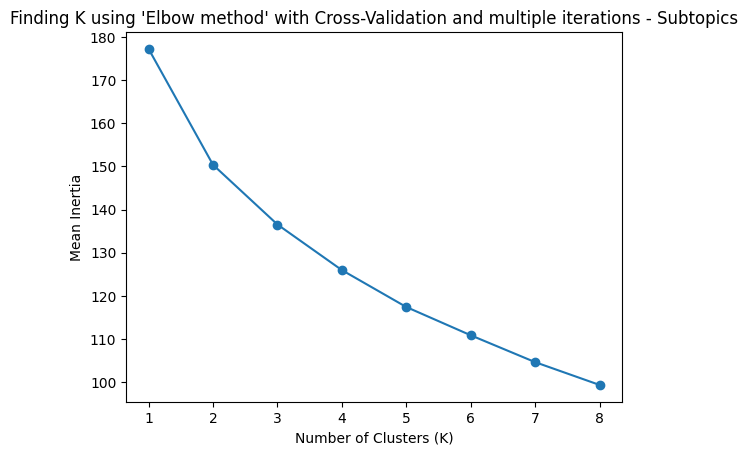

In [444]:
# ELBOW METHOD WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS --> 4 > 5 > 3
###########################################################################################

# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 8

# List to store the results of inertia for each K in each iteration
inertia_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    
    # List to store the inertia for each K in this iteration
    inertia_iteration = []
    
    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(OBJ):# Loop over each split
        X_train = OBJ.iloc[train_index] # Get the training data for this split
        
        # Find the inertia of each K [for this split]
        inertia_k = [] # List to store the inertia of each K [for this split]
        for k in np.linspace(1, max_clusters, max_clusters, dtype=int): # Loop over each K
            kmeans= KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=50, n_clusters=k, n_init='warn', random_state=iteration, tol=0.0001)
            kmeans.n_clusters = k # Actualize the number of clusters in the KMeans object
            kmeans.fit(X_train) # Fit the KMeans object with the training data
            inertia_k.append(kmeans.inertia_) # Store the inertia of each K [for this split]
        
        # Store the inertia results of each K, each split [for this iteration]
        inertia_iteration.append(inertia_k)
    
    # Store the inertia results of each K, each split, each iteration
    inertia_iterations.append(inertia_iteration)

# Calculate the mean inertia for each K across all iterations and splits
inertia_mean = np.mean(inertia_iterations, axis=0) # Calculate the mean inertia across all iterations
inertia_mean = np.mean(inertia_mean, axis=0) # Calculate the mean inertia across all splits

# Plot the curve of mean inertia vs K
plt.plot(np.linspace(1, max_clusters, max_clusters, dtype=int), inertia_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Inertia')
plt.title("Finding K using 'Elbow method' with Cross-Validation and multiple iterations - Subtopics")
plt.show()

El coeficiente de silueta mide la cohesión y la separación de los clusters en relación con otros clusters. Un valor de coeficiente de silueta más cercano a 1 indica que las muestras están bien agrupadas en sus respectivos clusters, mientras que un valor más cercano a -1 indica que las muestras están mal agrupadas y pertenecen a clusters incorrectos. Un valor cercano a 0 indica superposición de clusters o clusters que están muy cerca uno del otro.

"El método Silhouette es una técnica de evaluación para medir la calidad de un agrupamiento (clustering) en ciencia de datos. La métrica de Silhouette se basa en la comparación de la distancia promedio del punto con su propio clúster y la distancia promedio del punto con los otros clústeres. El valor de Silhouette varía entre -1 y 1, donde valores más cercanos a 1 indican una mejor separación entre clústeres y una agrupación más adecuada de los datos."

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

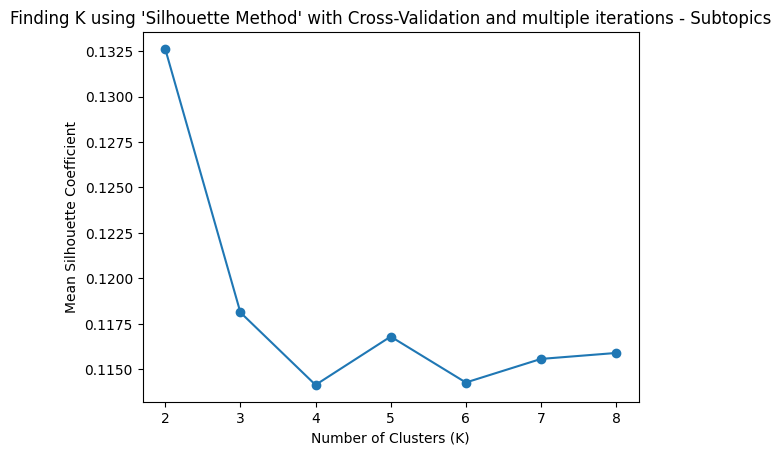

In [445]:
# SILHOUETTE METHOD WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS --> 3 > 4 > 5
###########################################################################################

# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 8

# List to store the results of silhouette scores for each K in each iteration
silhouette_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the silhouette scores for each K in this iteration
    silhouette_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(OBJ):# Loop over each split
        X_train = OBJ.iloc[train_index] # Get the training data for this split

        # Calculate the silhouette scores of each K [for this split]
        silhouette_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            #kmeans = KMeans(n_clusters=k, random_state=iteration) # Create a KMeans object
            kmeans= KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=50, n_clusters=k, n_init='warn', random_state=iteration, tol=0.0001)

            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = silhouette_score(X_train, labels) # Calculate the silhouette score of this K [for this split]
            silhouette_k.append(score) # Store the silhouette scores of each K [for this split]
        
        # Store the silhouette scores of each K, each split [for this iteration]
        silhouette_iteration.append(silhouette_k) 
    
    # Store the silhouette scores of each K, each split, each iteration
    silhouette_iterations.append(silhouette_iteration)

# Calculate the mean silhouette scores for each K across all iterations and splits
silhouette_mean = np.mean(silhouette_iterations, axis=0) # Calculate the mean silhouette scores across all iterations
silhouette_mean = np.mean(silhouette_mean, axis=0) # Calculate the mean silhouette scores across all splits

# Plot the silhouette coefficient curve
plt.plot(range(2, max_clusters + 1), silhouette_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Silhouette Coefficient')
plt.title("Finding K using 'Silhouette Method' with Cross-Validation and multiple iterations - Subtopics")
plt.show()

En el gráfico del Índice Davies-Bouldin, buscamos el valor de K que minimiza el índice, es decir, donde la curva alcanza su valor más bajo. El índice Davies-Bouldin mide la similitud promedio entre cada cluster y su cluster más cercano. Un valor más bajo del índice indica una mejor separación entre los clusters. Por lo tanto, el valor de K que minimiza el Índice Davies-Bouldin es el que proporciona una mejor estructura de clustering.

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

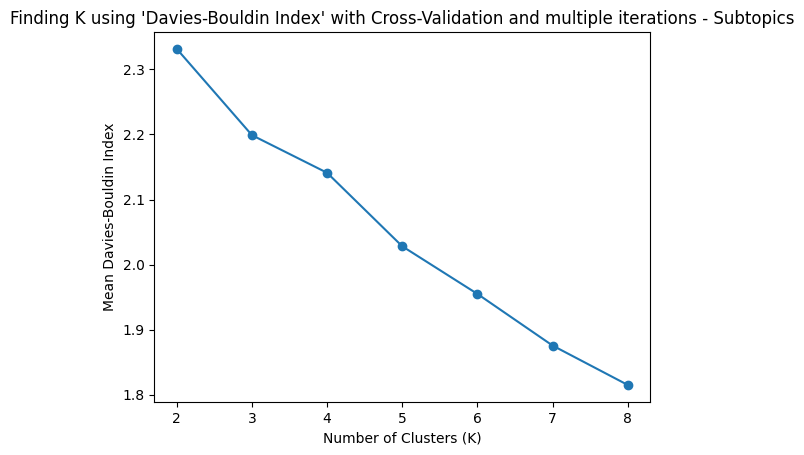

In [446]:
# Índice Davies-Bouldin WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS --> 6 > 5 >> 4
###########################################################################################

# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 8

# List to store the results of Davies-Bouldin index for each K in each iteration
davies_bouldin_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the Davies-Bouldin index for each K in this iteration
    davies_bouldin_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(OBJ): # Loop over each split
        X_train = OBJ.iloc[train_index] # Get the training data for this split

        # Calculate the Davies-Bouldin index of each K [for this split]
        davies_bouldin_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans= KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=50, n_clusters=k, n_init='warn', random_state=iteration, tol=0.0001)
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = davies_bouldin_score(X_train, labels) # Calculate the Davies-Bouldin index of this K [for this split]
            davies_bouldin_k.append(score) # Store the Davies-Bouldin index of each K [for this split]

        # Store the Davies-Bouldin index of each K, each split [for this iteration]
        davies_bouldin_iteration.append(davies_bouldin_k) 

    # Store the Davies-Bouldin index of each K, each split, each iteration
    davies_bouldin_iterations.append(davies_bouldin_iteration)

# Calculate the mean Davies-Bouldin index for each K across all iterations and splits
davies_bouldin_mean = np.mean(davies_bouldin_iterations, axis=0) # Calculate the mean Davies-Bouldin index across all iterations
davies_bouldin_mean = np.mean(davies_bouldin_mean, axis=0) # Calculate the mean Davies-Bouldin index across all splits

# Plot the Davies-Bouldin index curve
plt.plot(range(2, max_clusters + 1), davies_bouldin_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Davies-Bouldin Index')
plt.title("Finding K using 'Davies-Bouldin Index' with Cross-Validation and multiple iterations - Subtopics")
plt.show()

La interpretación del gráfico es similar al método del codo, pero en lugar de buscar el "codo" o la curva donde la inercia comienza a aplanarse, en el índice Calinski-Harabasz buscamos el punto donde el índice alcanza su máximo. En otras palabras, buscamos el "codo" en el gráfico que indica el número óptimo de clusters.

Por lo tanto, debes buscar el punto en el gráfico donde el índice Calinski-Harabasz alcanza su máximo. Ese será el valor óptimo de K que proporciona una buena separación entre los clusters y una agrupación significativa de los datos. Es decir, es el punto en el que se obtiene el mejor equilibrio entre la compactación de los clusters y la separación entre ellos.

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

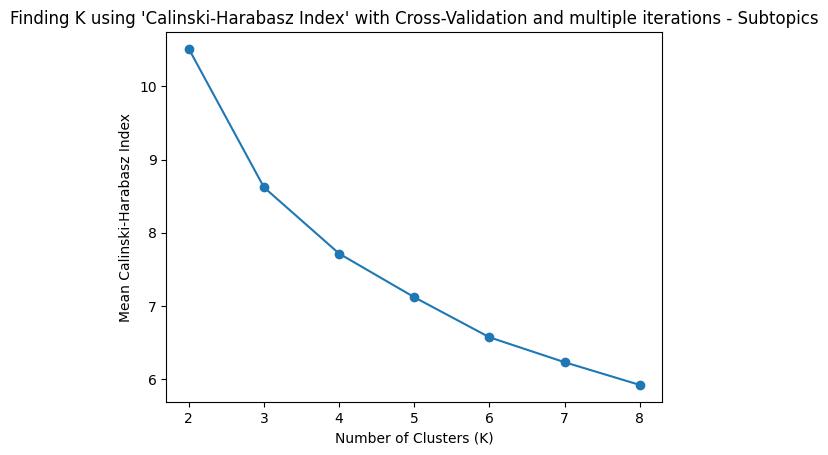

In [447]:
# índice Calinski-Harabasz WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS --> 3 > 4 > 5
###########################################################################################


# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5
k
# Max number of clusters we want to test
max_clusters = 8

# List to store the results of Calinski-Harabasz index for each K in each iteration
calinski_harabasz_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the Calinski-Harabasz index for each K in this iteration
    calinski_harabasz_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(OBJ): # Loop over each split
        X_train = OBJ.iloc[train_index] # Get the training data for this split

        # Calculate the Calinski-Harabasz index of each K [for this split]
        calinski_harabasz_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans= KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=50, n_clusters=k, n_init='warn', random_state=iteration, tol=0.0001)
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = calinski_harabasz_score(X_train, labels) # Calculate the Calinski-Harabasz index of this K [for this split]
            calinski_harabasz_k.append(score) # Store the Calinski-Harabasz index of each K [for this split]

        # Store the Calinski-Harabasz index of each K, each split [for this iteration]
        calinski_harabasz_iteration.append(calinski_harabasz_k) 

    # Store the Calinski-Harabasz index of each K, each split, each iteration
    calinski_harabasz_iterations.append(calinski_harabasz_iteration)

# Calculate the mean Calinski-Harabasz index for each K across all iterations and splits
calinski_harabasz_mean = np.mean(calinski_harabasz_iterations, axis=0) # Calculate the mean Calinski-Harabasz index across all iterations
calinski_harabasz_mean = np.mean(calinski_harabasz_mean, axis=0) # Calculate the mean Calinski-Harabasz index across all splits

# Plot the Calinski-Harabasz index curve
plt.plot(range(2, max_clusters + 1), calinski_harabasz_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Calinski-Harabasz Index')
plt.title("Finding K using 'Calinski-Harabasz Index' with Cross-Validation and multiple iterations - Subtopics")
plt.show()

In [448]:
bestK = pd.DataFrame({'elbow': [4, 5, 3], 'silhouette': [3, 4, 5], 'davies_bouldin': [6, 5, 4], 'calinski_harabasz': [3, 4, 5]})
bestK

elbow  silhouette  davies_bouldin  calinski_harabasz
0      4           3               6                  3
1      5           4               5                  4
2      3           5               4                  5

## 2.2 FIT K-MEANS

En el caso del algoritmo K-means, no es necesario realizar validación cruzada o múltiples iteraciones, ya que el K-means es un algoritmo de aprendizaje no supervisado que busca agrupar los datos en K grupos predefinidos. A diferencia de los modelos supervisados como XGBoost o SVM, el K-means no tiene parámetros que se ajusten durante el entrenamiento y, por lo tanto, no necesita validación cruzada ni múltiples iteraciones.

El K-means es un algoritmo determinístico y, dado un número de clusters K y unas condiciones iniciales, siempre convergerá al mismo resultado. La inicialización de los centroides puede afectar los resultados, pero una vez que se fijan los centroides iniciales, el algoritmo encontrará los clusters correspondientes.

OBJ_cluster_labels
3    25
1    21
0    18
2    12
Name: count, dtype: int64

Inertia: 159.598537676275

N_iter: 6


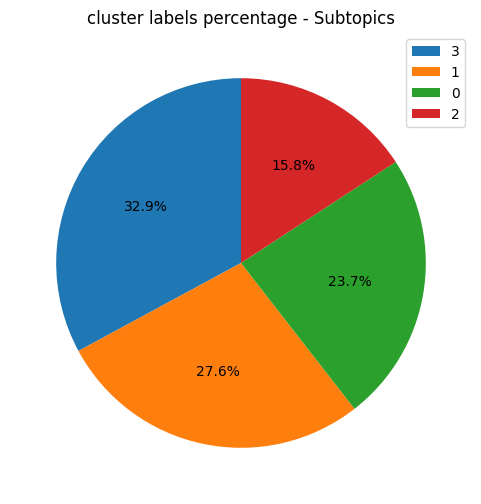

In [51]:
# Make the clusterization with the optimal number of clusters and the best parameters
#Best Parameters: {'algorithm': 'elkan', 'copy_x': True, 'init': 'random', 'max_iter': 100, 'n_clusters': 5, 'n_init': 'auto', 'random_state': 42, 'tol': 1e-05}
kmeans= KMeans(algorithm='elkan', copy_x=True, init='random', max_iter=100, n_clusters=4, n_init='auto', random_state=42, tol=1e-05)
kmeans.fit(OBJ)

# OBTAIN THE LABELS OF THE CLUSTERS ASSIGNED TO EACH SAMPLE AND ADD THEM TO THE DATAFRAMES
cluster_labels = kmeans.labels_
# encuesta
encuesta_=encuesta.copy()
encuesta_['OBJ_cluster_labels'] = cluster_labels
# OBJ
OBJ_=OBJ.copy()
OBJ_['OBJ_cluster_labels'] = cluster_labels
# Obtain the number of samples for each cluster
cluster_labels_=encuesta_['OBJ_cluster_labels'].value_counts()
print(cluster_labels_)

# OBTAIN ATTRIBUTES OF THE CLUSTERS
# Obtain the centroids of the clusters
centroids = kmeans.cluster_centers_
# Obtain Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
inertia = kmeans.inertia_
print("\nInertia:",inertia)
# Obtain the number of iterations required to converge
n_iter = kmeans.n_iter_
print("\nN_iter:",n_iter)

# Plot pie 
cluster_labels_k3_plot=cluster_labels_.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='cluster labels percentage - Subtopics',figsize=(6,6))
plt.ylabel('')
plt.show()

## 2.3. Statistical Analysis

- Es una corrección conservadora que ajusta el valor crítico para cada prueba individual dividiendo el nivel de significancia original (α) por el número total de pruebas (m).
- Asegura que la probabilidad global de cometer un error de tipo I (rechazar incorrectamente la hipótesis nula) se mantenga bajo control, pero puede ser demasiado estricta y resultar en una pérdida de poder estadístico.

Al establecer el parámetro correction=True en la función chi2_contingency, se aplicará la corrección de Yates automáticamente. Esto ajustará los p-valores para tener en cuenta los valores cero en las tablas de contingencia.

#If correction=True, and the degrees of freedom is 1, apply Yates’ correction for continuity. The effect of the correction is to adjust each observed value by 0.5 towards the corresponding expected value.

In [52]:
# Prepare the data for the hypothesis test
X = OBJ_.drop('OBJ_cluster_labels', axis=1)  # Predictor variables
y = OBJ_['OBJ_cluster_labels']  # Cluster tags

# Hypothesis test and multiple test correction for binary variables
p_values = []
p_values_corrected = []
significance_threshold = 0.05  # Significance threshold

for column in X.columns:
    if column.startswith('XX_'):
        # Perform ANOVA or Kruskal-Wallis test for numeric variables
        groups = [X[column][y == label] for label in y.unique()]
        if len(groups) > 1:
            if all(isinstance(val, (int, float)) for val in X[column]):
                # Perform ANOVA for normally distributed data
                p = f_oneway(*groups).pvalue
            else:
                # Perform Kruskal-Wallis for non-normally distributed data
                p = kruskal(*groups).pvalue
            p_values.append(p)
        else:
            p_values.append(1.0)  # If all groups are the same, p-value is 1.0
    else:
        # Perform chi-squared test for binary variables
        contingency_table = pd.crosstab(X[column], y)
        chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)
        p_values.append(p)
p_values

[0.07039703284507673,
 1.8085698124405986e-10,
 0.00011086098467763264,
 0.0017082073898642594,
 8.52368046980465e-07,
 0.0016521053505923775,
 0.012069502603834669,
 0.08367313391990293,
 0.00017942805160456416,
 4.944430802539688e-05,
 0.012544574752719154,
 0.0011168925802500559,
 0.045825846873237965,
 2.474130656502797e-12,
 0.003954840355178357,
 0.0001388643213531754,
 0.06445646935714405]

Cuando se realizan múltiples pruebas de hipótesis simultáneamente, existe una mayor probabilidad de obtener falsos positivos (errores de tipo I), es decir, concluir incorrectamente que hay una diferencia significativa cuando en realidad no la hay.

Así que a continuación corregimos los valores p. La corrección de valores p ayuda a controlar este problema al ajustar los valores p para tener en cuenta el número de pruebas realizadas. Uno de los métodos comunes para la corrección es el método de Bonferroni. La corrección de Bonferroni es una técnica que ayuda a controlar este problema ajustando el valor crítico para cada prueba individual para mantener el nivel global de significancia

El método de Bonferroni establece un umbral de significancia más estricto dividiendo el umbral original (por ejemplo, 0.05) por el número de pruebas realizadas. Esto reduce el riesgo de obtener falsos positivos y ayuda a garantizar que las diferencias significativas observadas sean más confiables.

En el código, la función multipletests() de la biblioteca statsmodels se utiliza para aplicar la corrección de Bonferroni a los valores p obtenidos en las pruebas de hipótesis. Devuelve los valores p corregidos en p_values_corrected y las decisiones de rechazo (True o False) en reject.

El valor de "rejectionsH0" representa la fracción esperada de hipótesis nulas que se rechazarían por azar cuando se utiliza el método de corrección. En tu caso, el valor de 0.0009859231655185985 indica que aproximadamente el 0.0986% de las hipótesis nulas se rechazarían por azar. Esto significa que, en general, el método de corrección de Bonferroni utilizado es bastante conservador y controla de manera efectiva la tasa global de error tipo I.

El valor de "upperlLimitCI" se refiere al límite superior del intervalo de confianza de Benjamini-Hochberg para los p-valores corregidos. En tu caso, el valor de 0.0009615384615384616 indica el límite superior de este intervalo. Este valor puede ser útil si deseas tener una idea del rango de los p-valores corregidos después de la corrección de múltiples pruebas.

In [518]:
# Multiple test correction
reject, p_values_corrected, rejectionsH0, upperlLimitCI= multipletests(p_values, alpha=significance_threshold, method='bonferroni')

print("reject:",reject)
print("\np_values_corrected:",p_values_corrected)
print("\nrejectionsH0:",rejectionsH0)
print("\nupperlLimitCI:",upperlLimitCI)

reject: [False  True  True  True  True  True False False  True  True False  True
 False  True False  True False]

p_values_corrected: [1.00000000e+00 3.07456868e-09 1.88463674e-03 2.90395256e-02
 1.44902568e-05 2.80857910e-02 2.05181544e-01 1.00000000e+00
 3.05027688e-03 8.40553236e-04 2.13257771e-01 1.89871739e-02
 7.79039397e-01 4.20602212e-11 6.72322860e-02 2.36069346e-03
 1.00000000e+00]

rejectionsH0: 0.0030127052790058784

upperlLimitCI: 0.0029411764705882353


In [519]:
# Identification of significant variables
OBJ_significance = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})

# Filter significant variables
OBJ_significance_true = OBJ_significance[OBJ_significance['Significant']]
OBJ_significance_true.drop('Significant', axis=1, inplace=True)
significant_variables=OBJ_significance_true['Variable'].tolist()
print("Variables significativas:")
OBJ_significance_true.sort_values(by=['p-value_corrected'])

Variables significativas:


C:\Users\xavie\AppData\Local\Temp\ipykernel_15508\2405746424.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OBJ_significance_true.drop('Significant', axis=1, inplace=True)


Variable       p-value  p-value_corrected
13       PP_sobre_ti_aireLibre  2.474131e-12       4.206022e-11
1       OBJ_zona_vivir_costera  1.808570e-10       3.074569e-09
4         OBJ_zona_vivir_campo  8.523680e-07       1.449026e-05
9   PP_sobre_ti_espiritualidad  4.944431e-05       8.405532e-04
2       OBJ_zona_vivir_montaña  1.108610e-04       1.884637e-03
15          XX_PUE_ratioPueblo  1.388643e-04       2.360693e-03
8       PP_sobre_ti_aventurero  1.794281e-04       3.050277e-03
11           PP_sobre_ti_playa  1.116893e-03       1.898717e-02
5        XX_OBJ_zona_población  1.652105e-03       2.808579e-02
3      OBJ_zona_vivir_forestal  1.708207e-03       2.903953e-02

Primero, se define la lista significant_variables que contiene los nombres de las variables que han mostrado diferencias significativas.

A continuación, se inicia un bucle for para iterar sobre cada variable en significant_variables.

Para cada variable, se crea una tabla de contingencia utilizando la función pd.crosstab(), que muestra la distribución de frecuencia de los grupos de la variable en relación con los clústeres.

Se obtiene una lista de los grupos presentes en la variable utilizando contingency_table.columns.tolist().

Se anidan dos bucles for para comparar cada par de grupos. El primer bucle itera sobre el índice i, que representa el grupo 1, y el segundo bucle itera sobre el índice j, que representa el grupo 2. Esto garantiza que se comparen todos los pares únicos de grupos.

Dentro de los bucles anidados, se seleccionan los nombres de los grupos group1 y group2 correspondientes a los índices i y j, respectivamente.

Se crea una nueva tabla de contingencia contingency_table_group que contiene solo los dos grupos seleccionados.

Se realiza la prueba de Chi-cuadrado utilizando chi2_contingency(). El resultado es el estadístico de Chi-cuadrado chi2, el p-valor p y otros valores relacionados que no son necesarios en este caso.

Se verifica si el p-valor es significativo, es decir, si es menor que el umbral de significancia establecido. Si lo es, se considera que hay diferencias significativas entre los grupos y se guarda la información de la variable, los dos grupos y el p-valor en la lista group_differences.

Después de finalizar los bucles, se crea un DataFrame group_differences_df a partir de la lista group_differences y se asignan nombres de columnas adecuados.

Finalmente, se imprime el DataFrame group_differences_df, que muestra las diferencias significativas entre grupos para cada variable.

In [520]:
# Make multiple comparison tests for each pair of groups in significant variables
group_differences = []

for variable in OBJ_significance_true['Variable']:
    if variable.startswith('XX_'):
        # Perform t-tests for numeric variables
        groups = y.unique()
        
        # Generate all possible combinations of groups
        group_combinations = list(combinations(groups, 2))
        
        for group1, group2 in group_combinations:
            data_group1 = X.loc[y == group1, variable]
            data_group2 = X.loc[y == group2, variable]
            
            t_stat, p = ttest_ind(data_group1, data_group2)

            
            # If the p-value is significant, it is considered that the groups differ
            if p < significance_threshold:
                group_differences.append((variable, group1, group2, p))
    else:
        # Perform chi2 test for binary variables
        contingency_table = pd.crosstab(X[variable], y)
        groups = contingency_table.columns.tolist()

        for i in range(len(groups)):
            for j in range(i+1, len(groups)):
                group1 = groups[i]
                group2 = groups[j]

                # Make chi2 test to compare the groups
                contingency_table_group = contingency_table[[group1, group2]]
                # Add a small value to the cells to avoid zeros
                contingency_table_group = contingency_table_group.add(0.01)
                chi2, p, _, _ = chi2_contingency(contingency_table_group, correction=True)

                # If the p-value is significant, it is considered that the groups differ
                if p < significance_threshold:
                    group_differences.append((variable, group1, group2, p))

# Convert the results to a DataFrame
group_differences_df = pd.DataFrame(group_differences, columns=['Variable', 'Group X', 'Group Y', 'p-value'])
print("Diferencias significativas entre grupos:")
print(group_differences_df)


Diferencias significativas entre grupos:
                      Variable  Group X  Group Y       p-value
0       OBJ_zona_vivir_costera        0        1  1.518115e-02
1       OBJ_zona_vivir_costera        0        3  8.162924e-06
2       OBJ_zona_vivir_costera        1        2  4.699198e-04
3       OBJ_zona_vivir_costera        1        3  9.031047e-11
4       OBJ_zona_vivir_costera        2        3  3.138797e-03
5       OBJ_zona_vivir_montaña        0        1  2.390688e-02
6       OBJ_zona_vivir_montaña        0        2  1.230584e-03
7       OBJ_zona_vivir_montaña        0        3  1.470668e-04
8      OBJ_zona_vivir_forestal        0        1  3.460574e-02
9      OBJ_zona_vivir_forestal        1        3  1.898846e-03
10        OBJ_zona_vivir_campo        0        2  3.780788e-04
11        OBJ_zona_vivir_campo        1        2  2.697320e-02
12        OBJ_zona_vivir_campo        1        3  1.536938e-02
13        OBJ_zona_vivir_campo        2        3  4.997191e-06
14       XX_OB

In [521]:
# Define a list to store the aggregation results
aggregation_results = []

# Iterate over the columns and apply the aggregation functions separately
for column in encuesta_.columns:
    column_aggregations = encuesta_.groupby('OBJ_cluster_labels')[column].agg([
        ('sum', 'sum'),
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std')
    ])
    column_aggregations.columns = [f"{column}_{agg}" for agg in column_aggregations.columns]
    aggregation_results.append(column_aggregations)

# Concatenate the results into a single DataFrame
cluster_agg = pd.concat(aggregation_results, axis=1)

El código recorre las variables significativas, extrae el género de cada variable y luego genera gráficos de barras para las medias de las variables de cada género en el DataFrame cluster_agg. Esto automatiza el proceso de generación de gráficos para los géneros cuyas variables están marcadas como significativas.

Se define una lista llamada significant_variables para almacenar las variables significativas extraídas de subtopics_significance_true['Variable'].

Se crea un conjunto (genres) para almacenar los géneros únicos presentes en las variables significativas.

Se itera sobre cada variable en significant_variables.

Dentro del bucle, se divide el nombre de la variable usando _ como separador, y se extrae el género utilizando variable.split('_')[0]. Esto se hace para obtener el género de cada variable.

El género se agrega al conjunto genres utilizando genres.add(genre). Esto asegura que solo se almacenen géneros únicos en el conjunto.

Después del bucle, se itera sobre cada género en genres.

Dentro del bucle, se filtran las columnas en el DataFrame cluster_agg utilizando cluster_agg.filter(regex=f'^{genre}'). Esto selecciona todas las columnas que comienzan con el nombre del género.

Luego, se filtran las columnas resultantes para seleccionar solo aquellas que tienen "mean" al final del nombre utilizando genre_columns.filter(regex='mean$'). Estas columnas representan las medias de las variables para cada clúster dentro de ese género.

Se verifica si hay columnas seleccionadas en el paso anterior utilizando genre_mean_columns.shape[1] > 0.

Si hay columnas seleccionadas, se genera un gráfico de barras utilizando genre_mean_columns.plot(kind='bar', title=f'cluster_agg_{genre}_mean', figsize=(15, 6)). Esto muestra las medias de las variables para cada clúster en forma de gráfico de barras.

Finalmente, se agrega el título del gráfico, las etiquetas de los ejes x e y, y se muestra el gráfico utilizando plt.show().

In [463]:
significant_variables_by_genre

{'OBJ': ['OBJ_zona_vivir_costera',
  'OBJ_zona_vivir_montaña',
  'OBJ_zona_vivir_forestal',
  'OBJ_zona_vivir_campo'],
 'XX': ['XX_OBJ_zona_población', 'XX_PUE_ratioPueblo'],
 'PP': ['PP_sobre_ti_aventurero',
  'PP_sobre_ti_espiritualidad',
  'PP_sobre_ti_playa',
  'PP_sobre_ti_aireLibre']}

In [524]:
genre_mean_columns

PP_género_Mujer_mean  PP_género_Hombre_mean   
OBJ_cluster_labels                                                
0                               0.555556               0.444444  \
1                               0.619048               0.380952   
2                               0.750000               0.166667   
3                               0.640000               0.360000   

                    PP_género_NB_mean  PP_género_PND_mean   
OBJ_cluster_labels                                          
0                            0.000000                 0.0  \
1                            0.000000                 0.0   
2                            0.083333                 0.0   
3                            0.000000                 0.0   

                    PP_estado_civil_soltero_mean  PP_estado_civil_Casado_mean   
OBJ_cluster_labels                                                              
0                                       0.277778                     0.333333  \
1                                       0.476190                     0.333333   
2                                       0.416667                     0.250000   
3                                       0.320000                     0.440000   

                    PP_estado_civil_relación_mean   
OBJ_cluster_labels                                  
0                                        0.388889  \
1                                        0.142857   
2                                        0.250000   
3                                        0.160000   

                    PP_estado_civil_separado_mean  PP_estado_civil_viudo_mean   
OBJ_cluster_labels                                                              
0                                        0.000000                    0.000000  \
1                                        0.000000                    0.047619   
2                                        0.083333                    0.000000   
3                                        0.080000                    0.000000   

                    PP_convivencia_familia_mean  ...   
OBJ_cluster_labels                               ...   
0                                      0.444444  ...  \
1                                      0.333333  ...   
2                                      0.583333  ...   
3                                      0.480000  ...   

                    PP_sobre_ti_MAmbiente_mean  PP_sobre_ti_provechoso_mean   
OBJ_cluster_labels                                                            
0                                     0.833333                     0.388889  \
1                                     0.476190                     0.238095   
2                                     0.833333                     0.416667   
3                                     0.440000                     0.200000   

                    PP_sobre_ti_playa_mean  PP_sobre_ti_deporte_mean   
OBJ_cluster_labels                                                     
0                                 0.055556                  0.555556  \
1                                 0.095238                  0.190476   
2                                 0.250000                  0.333333   
3                                 0.520000                  0.200000   

                    PP_sobre_ti_pasatiemposCreativos_mean   
OBJ_cluster_labels                                          
0                                                0.500000  \
1                                                0.333333   
2                                                0.583333   
3                                                0.440000   

                    PP_sobre_ti_aireLibre_mean  PP_sobre_ti_tecnología_mean   
OBJ_cluster_labels                                                            
0                                     0.888889                     0.277778  \
1                                     0.047619                     0.142857   
2                            

In [525]:
significant_variables_genre

['PP_sobre_ti_aventurero_mean',
 'PP_sobre_ti_espiritualidad_mean',
 'PP_sobre_ti_playa_mean',
 'PP_sobre_ti_aireLibre_mean']

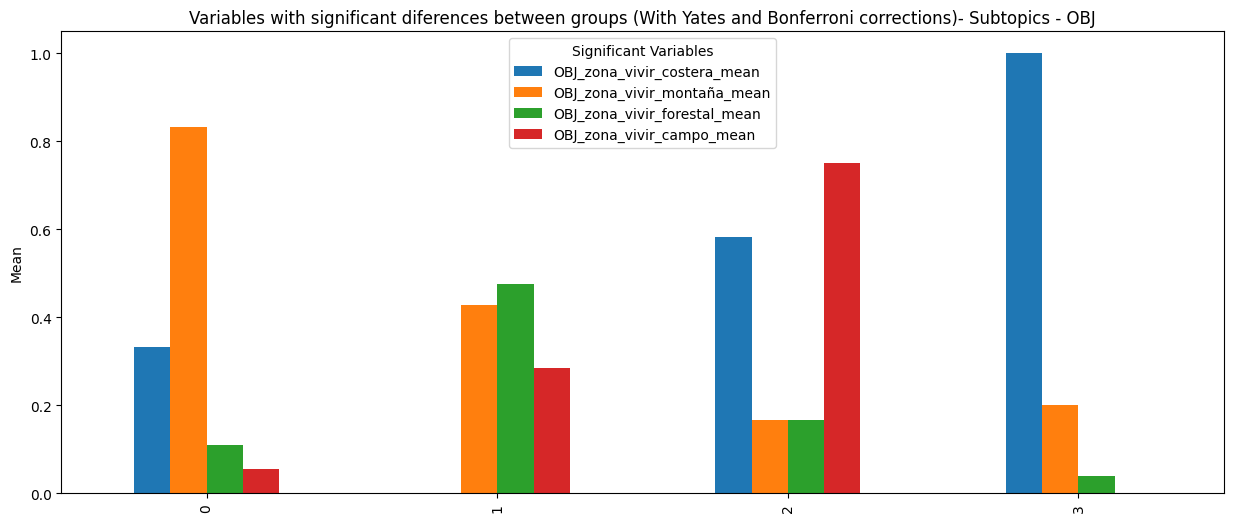

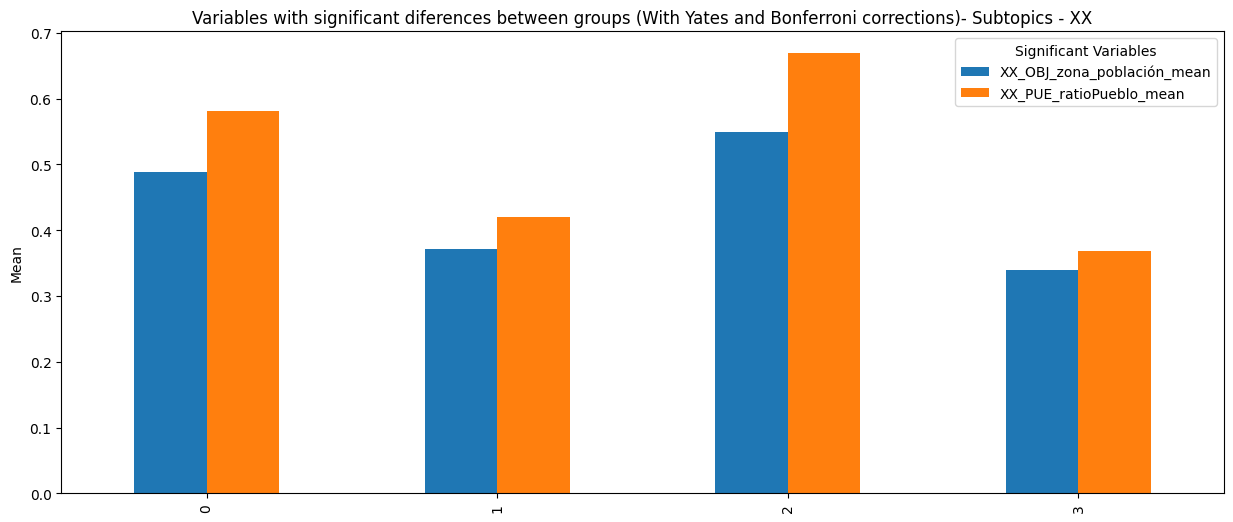

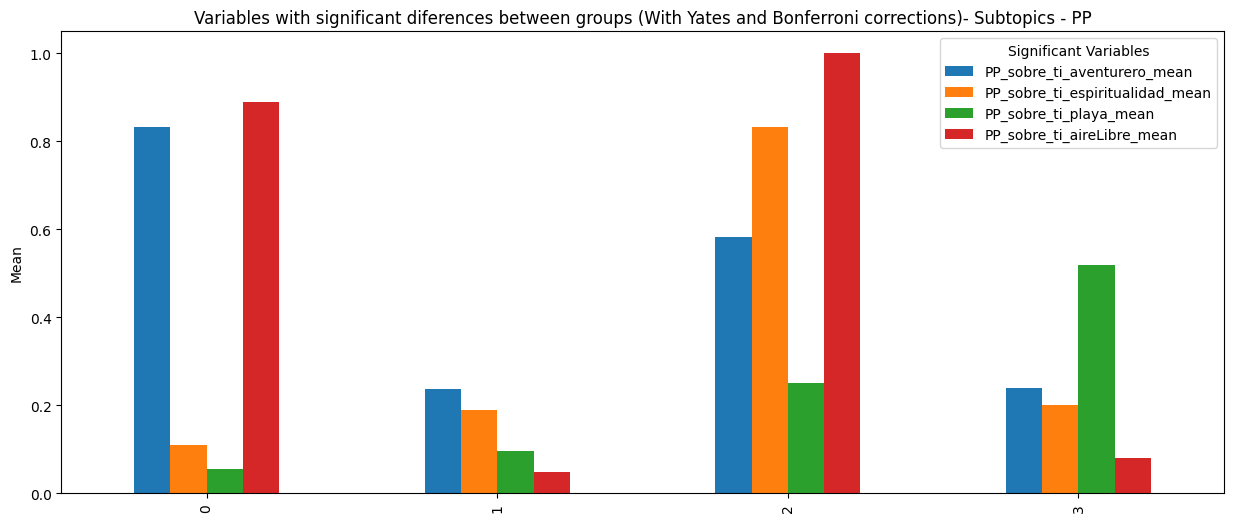

In [584]:
# Obtain the list of significant variables
#significant_variables = subtopics_significance_true['Variable'].tolist()

# Create a dictionary to store the significant variables by genre
significant_variables_by_genre = {}

# Group the significant variables by genre
for variable in significant_variables:
    genre = variable.split('_')[0]
    if genre not in significant_variables_by_genre:
        significant_variables_by_genre[genre] = []
    significant_variables_by_genre[genre].append(variable)

# Iterate over the genres and plot the significant variables
for genre, variables in significant_variables_by_genre.items():
    genre_columns = cluster_agg.filter(regex=f'^{genre}')
    genre_mean_columns = genre_columns.filter(regex='mean$')
    
    if genre_mean_columns.shape[1] > 0:
        # Filter the significant variables for the current genre
        significant_variables_genre = [variable + '_mean' for variable in variables if variable + '_mean' in genre_mean_columns.columns]
        if significant_variables_genre:
            ax = genre_mean_columns[significant_variables_genre].plot(kind='bar', title=f'Variables with significant diferences between groups (With Yates and Bonferroni corrections)- Subtopics - {genre}', figsize=(15, 6))
            plt.xlabel('')
            plt.ylabel('Mean')
            plt.legend(title='Significant Variables')
            plt.show()

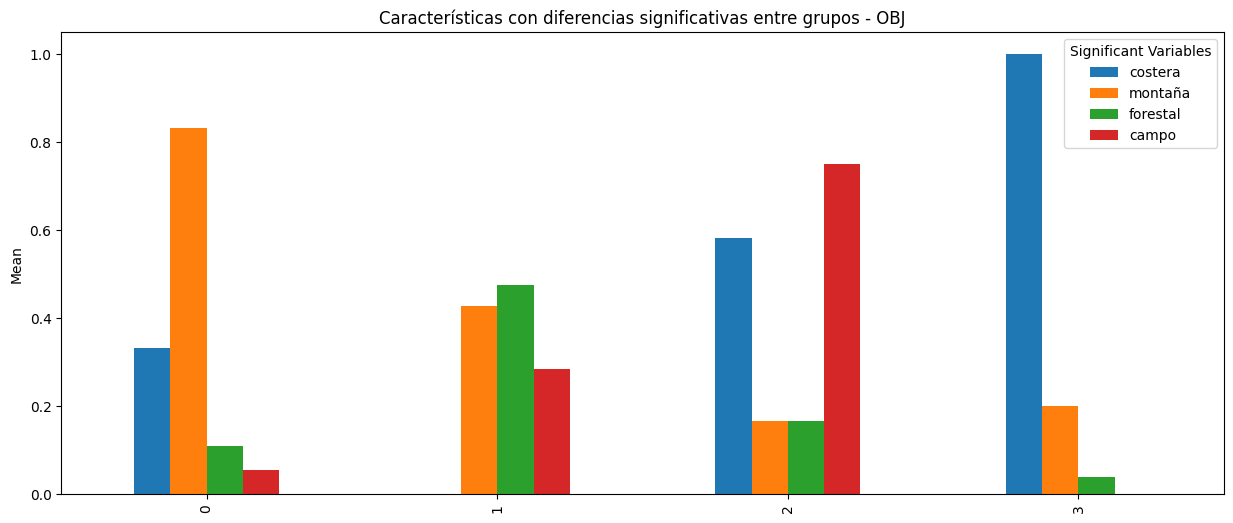

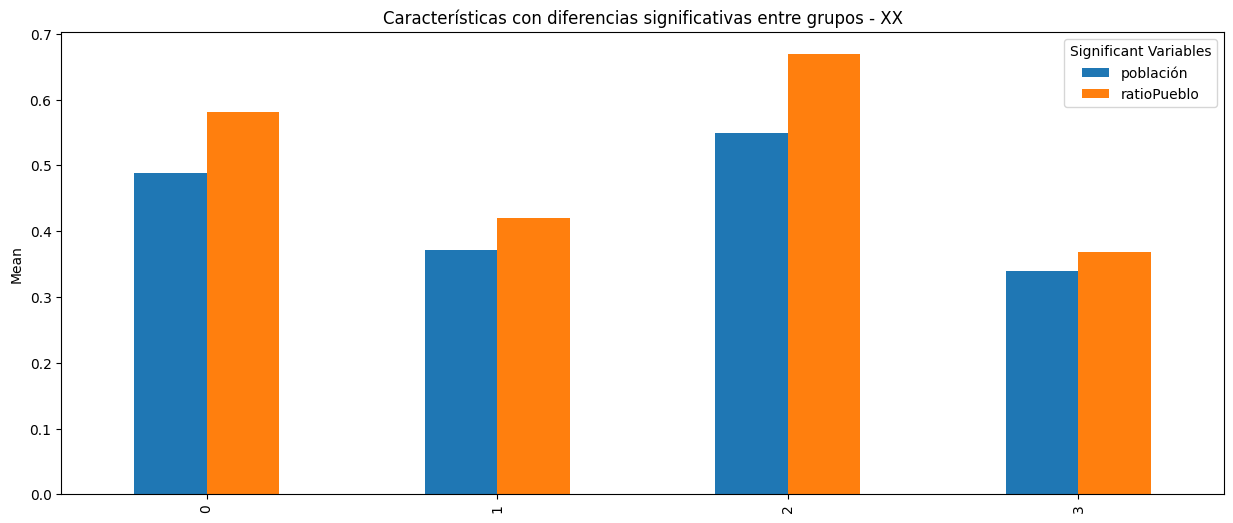

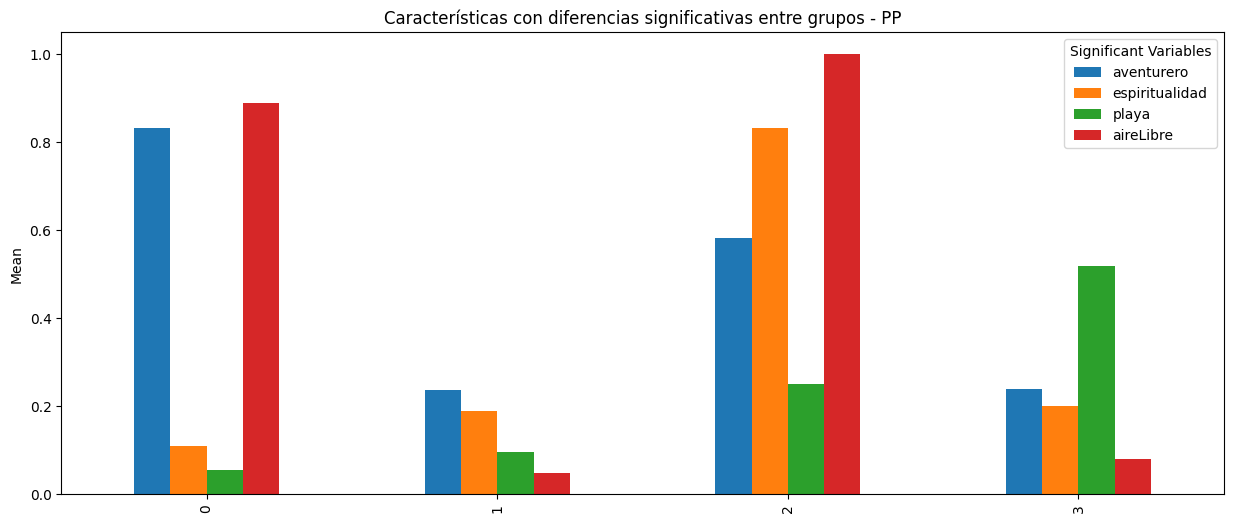

In [585]:
# Obtain the list of significant variables
#significant_variables = subtopics_significance_true['Variable'].tolist()

# Create a dictionary to store the significant variables by genre
significant_variables_by_genre = {}

# Group the significant variables by genre
for variable in significant_variables:
    genre = variable.split('_')[0]
    if genre not in significant_variables_by_genre:
        significant_variables_by_genre[genre] = []
    significant_variables_by_genre[genre].append(variable)

# Iterate over the genres and plot the significant variables
for genre, variables in significant_variables_by_genre.items():
    genre_columns = cluster_agg.filter(regex=f'^{genre}')
    genre_mean_columns = genre_columns.filter(regex='mean$')
    
    if genre_mean_columns.shape[1] > 0:
        # Filter the significant variables for the current genre
        significant_variables_genre = [variable + '_mean' for variable in variables if variable + '_mean' in genre_mean_columns.columns]
        if significant_variables_genre:
            ax = genre_mean_columns[significant_variables_genre].plot(kind='bar', title=f'Características con diferencias significativas entre grupos - {genre}', figsize=(15, 6))
            plt.xlabel('')
            plt.ylabel('Mean')
            # Obtén los nuevos nombres para las etiquetas de la leyenda
            new_legend_labels = [variable.split('_')[-2] for variable in significant_variables_genre]

            # Asigna los nuevos nombres a las etiquetas de la leyenda
            ax.legend(new_legend_labels, title='Significant Variables')

            plt.show()

In [244]:
selected_columns = [column + '_mean' for column in significant_variables]
OBJ_mean = cluster_agg[selected_columns]
OBJ_mean

OBJ_zona_vivir_costera_mean  OBJ_zona_vivir_montaña_mean   
OBJ_cluster_labels                                                             
0                                      0.333333                     0.833333  \
1                                      0.000000                     0.428571   
2                                      0.583333                     0.166667   
3                                      1.000000                     0.200000   

                    OBJ_zona_vivir_forestal_mean  OBJ_zona_vivir_campo_mean   
OBJ_cluster_labels                                                            
0                                       0.111111                   0.055556  \
1                                       0.476190                   0.285714   
2                                       0.166667                   0.750000   
3                                       0.040000                   0.000000   

                    XX_OBJ_zona_población_mean  PP_sobre_ti_aventurero_mean   
OBJ_cluster_labels                                                            
0                                     0.488889                     0.833333  \
1                                     0.371429                     0.238095   
2                                     0.550000                     0.583333   
3                                     0.340000                     0.240000   

                    PP_sobre_ti_espiritualidad_mean  PP_sobre_ti_playa_mean   
OBJ_cluster_labels                                                            
0                                          0.111111                0.055556  \
1                                          0.190476                0.095238   
2                                          0.833333                0.250000   
3                                          0.200000                0.520000   

                    PP_sobre_ti_aireLibre_mean  XX_PUE_ratioPueblo_mean  
OBJ_cluster_labels                                                       
0                                     0.888889                 0.581699  
1                                     0.047619                 0.420568  
2                                     1.000000                 0.668768  
3                                     0.080000                 0.367731

In [245]:
# Make a table with the conclusions
group_caracterization=[
    ['0', '<3', '', '<1', '<2', '', '', '', '<2', '<3', ''],
    ['1', '<(0,2,3)', '<0', '', '<2', '<(0,2)', '<(0,2)', '<0', '<2', '<3', '<(0,2)'],
    ['2', '<3', '<0', '-', '', '', '', '-', '', '-', ''],
    ['3', '', '<0', '<1', '<(1,2)', '<(0,2)', '<(0,2)', '<0', '<2', '', '<(0,2)'],
]
OBJ_group_caracterization_columns=['k', 'OBJ_zona_vivir_costera', 'OBJ_zona_vivir_montaña', 'OBJ_zona_vivir_forestal', 'OBJ_zona_vivir_campo', 'XX_OBJ_zona_población','XX_PUE_ratioPueblo', 'PP_sobre_ti_aventurero', 'PP_sobre_ti_espiritualidad','PP_sobre_ti_playa','PP_sobre_ti_aireLibre']
OBJ_group_caracterization=pd.DataFrame(group_caracterization, columns=OBJ_group_caracterization_columns)
OBJ_group_caracterization

k OBJ_zona_vivir_costera OBJ_zona_vivir_montaña OBJ_zona_vivir_forestal   
0  0                     <3                                             <1  \
1  1               <(0,2,3)                     <0                           
2  2                     <3                     <0                       -   
3  3                                            <0                      <1   

  OBJ_zona_vivir_campo XX_OBJ_zona_población XX_PUE_ratioPueblo   
0                   <2                                           \
1                   <2                <(0,2)             <(0,2)   
2                                                                 
3               <(1,2)                <(0,2)             <(0,2)   

  PP_sobre_ti_aventurero PP_sobre_ti_espiritualidad PP_sobre_ti_playa   
0                                                <2                <3  \
1                     <0                         <2                <3   
2                      -                                            -   
3                     <0                         <2                     

  PP_sobre_ti_aireLibre  
0                        
1                <(0,2)  
2                        
3                <(0,2)

In [246]:
# Make a table with the conclusions
group_caracterization2=[
    ['0', '1', '3', '1', '1', '3', '3', '3', '1', '1', '3'],
    ['1', '0', '1', '2', '1', '2', '2', '1', '1', '1', '0'],
    ['2', '1', '1', 'x', '2', '3', '3', 'x', '3', 'x', '3'],
    ['3', '3', '1', '1', '0', '2', '2', '1', '1', '2', '0'],
]
OBJ_group_caracterization2=pd.DataFrame(group_caracterization2, columns=OBJ_group_caracterization_columns)
OBJ_group_caracterization2

k OBJ_zona_vivir_costera OBJ_zona_vivir_montaña OBJ_zona_vivir_forestal   
0  0                      1                      3                       1  \
1  1                      0                      1                       2   
2  2                      1                      1                       x   
3  3                      3                      1                       1   

  OBJ_zona_vivir_campo XX_OBJ_zona_población XX_PUE_ratioPueblo   
0                    1                     3                  3  \
1                    1                     2                  2   
2                    2                     3                  3   
3                    0                     2                  2   

  PP_sobre_ti_aventurero PP_sobre_ti_espiritualidad PP_sobre_ti_playa   
0                      3                          1                 1  \
1                      1                          1                 1   
2                      x                          3                 x   
3                      1                          1                 2   

  PP_sobre_ti_aireLibre  
0                     3  
1                     0  
2                     3  
3                     0

In [294]:
# Make a table with the conclusions
#ine
group_caracterization3=[
    ['0', 'forestal, espiritual, playa', 'costa, campo', 'montaña, pueblo, aventurero, libre', 'Pocos habitantes, en la montaña, con actividades al aire libre (de aventura)', 'Poble, rmontaña, reserva natural, actividades de aventura', 'Taull'],
    ['1', 'costa, aventurero, espiritual, playa, libre', 'montaña, forestal, campo, pueblo', '', 'Muchos habitantes (el que más), en (montaña, campo o forestal)', 'escairón, busquen serveis, pero estar chill, sense activitats', 'Escairón'],
    ['2', '', 'costa, montaña', 'campo, pueblo, espiritual, libre', 'Pocos habitantes (el que menos), en el campo, con actividades al aire libre (chill y de espiritualidad)', 'El que més patrimoni religioso (igual Andalucía)', 'Serratto, Belchite'],
    ['3', 'forestal, campo, aventurero, espiritual, libre', 'montaña, pueblo, playa', 'costa', 'Muchos habitantes, en la costa', 'playa, bastante poblado', 'Caleya'],
]
OBJ_group_caracterization3=pd.DataFrame(group_caracterization3, columns=['GRUPO', 'POCO', 'MEDIO', 'MUCHO', 'DESCRIPCIÓN', 'HOLA', 'PUEBLO'])
OBJ_group_caracterization3

GRUPO                                            POCO   
0     0                     forestal, espiritual, playa  \
1     1     costa, aventurero, espiritual, playa, libre   
2     2                                                   
3     3  forestal, campo, aventurero, espiritual, libre   

                              MEDIO                               MUCHO   
0                      costa, campo  montaña, pueblo, aventurero, libre  \
1  montaña, forestal, campo, pueblo                                       
2                    costa, montaña    campo, pueblo, espiritual, libre   
3            montaña, pueblo, playa                               costa   

                                         DESCRIPCIÓN   
0  Pocos habitantes, en la montaña, con actividad...  \
1  Muchos habitantes (el que más), en (montaña, c...   
2  Pocos habitantes (el que menos), en el campo, ...   
3                     Muchos habitantes, en la costa   

                                                HOLA              PUEBLO  
0  Poble, rmontaña, reserva natural, actividades ...               Taull  
1  escairón, busquen serveis, pero estar chill, s...            Escairón  
2   El que més patrimoni religioso (igual Andalucía)  Serratto, Belchite  
3                            playa, bastante poblado              Caleya

In [295]:
OBJ_group_caracterization3.to_excel('OBJ_group_caracterization.xlsx', index=False)

- OBJ_zona_vivir_costera
- PP_sobre_ti_aireLibre: Aficiones al aire libre (senderismo, camping, etc.)
- XX_PUE_ratioPueblo: 1 = pueblo, 0 = ciudad
- PP_sobre_ti_aventurero: Me considero aventurero / intrépido y disfruto de experiencias emocionantes
- OBJ_zona_vivir_campo
- OBJ_zona_vivir_montaña
- PP_sobre_ti_espiritualidad: La espiritualidad o religión desempeñan un papel importante en mi vida
- PP_sobre_ti_playa: Antes playa que montaña
- OBJ_zona_vivir_forestal
- PUE_preferencias_entorno_ciudad_CSET: Disfruto de las opciones culturales y de entretenimiento, servicios, educación y transporte que ofrece la vida en la ciudad (1)
- PP_sobre_ti_deporte: Practico deporte regularmente
- XX_OBJ_zona_población: 0 = ciudad, 1 = pueblo
- PP_sobre_ti_MAmbiente: Me preocupa el medio ambiente
- PP_sobre_ti_familia: La familia como parte fundamental en mi vida
- PUE_preferencias_entorno_naturalezaPaz: Me siento en paz en espacios naturales como bosques o campos
- XX_OBJ_zona_clima2_seco: 0 = húmedo, 1 = seco
- XX_OBJ_zona_proximidad: 0 = cerca de ciudad, 1 = lejos

################################### VARIABLES ELIMINADES

- OBJ_zona_temperatura_caliente:
- OBJ_zona_temperatura_cualquiera: 
- PP_sobre_ti_vivir: Vivir para trabajar
- OBJ_zona_vivir_noSeguro
- OBJ_zona_temperatura_frio
- OBJ_zona_temperatura_medio
- PP_sobre_ti_social: Le doy mucha importancia a las actividades sociales
- PP_sobre_ti_tecnología: Afición a la tecnología
- OBJ_zona_clima_estable
- PP_sobre_ti_minimalista: Me considero minimalista en mi estilo de vida
- PUE_preferencias_entorno_ciudadArquitectura: Encuentro inspiración en la arquitectura urbana y la vida en la ciudad

In [248]:
columns= ['PP_sobre_ti_aireLibre', 'OBJ_zona_vivir_costera', 'PP_sobre_ti_espiritualidad', 'OBJ_cluster_labels']
prueba = OBJ_[columns]
prueba

PP_sobre_ti_aireLibre  OBJ_zona_vivir_costera  PP_sobre_ti_espiritualidad   
0                       0                       1                           1  \
1                       1                       1                           0   
2                       0                       0                           0   
3                       0                       0                           0   
4                       0                       0                           0   
..                    ...                     ...                         ...   
71                      0                       1                           0   
72                      0                       1                           0   
73                      0                       0                           0   
74                      1                       1                           1   
75                      0                       0                           0   

    OBJ_cluster_labels  
0                    3  
1                    3  
2                    1  
3                    1  
4                    1  
..                 ...  
71                   3  
72                   3  
73                   1  
74                   2  
75                   1  

[76 rows x 4 columns]

In [249]:
# Define una función que aplique las condiciones
def nueva_columna(row):
    if row['PP_sobre_ti_aireLibre'] < 0.5:
        if row['OBJ_zona_vivir_costera'] < 0.5:
            return 1
        else:
            return 0
    else:
        if row['PP_sobre_ti_espiritualidad'] < 0.5:
            return 3
        else:
            return 2

# Aplica la función a cada fila del DataFrame
prueba['nueva_col'] = prueba.apply(nueva_columna, axis=1)

prueba['comparación']=prueba['OBJ_cluster_labels']==prueba['nueva_col']

prueba

C:\Users\xavie\AppData\Local\Temp\ipykernel_19024\222920849.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['nueva_col'] = prueba.apply(nueva_columna, axis=1)
C:\Users\xavie\AppData\Local\Temp\ipykernel_19024\222920849.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['comparación']=prueba['OBJ_cluster_labels']==prueba['nueva_col']


PP_sobre_ti_aireLibre  OBJ_zona_vivir_costera  PP_sobre_ti_espiritualidad   
0                       0                       1                           1  \
1                       1                       1                           0   
2                       0                       0                           0   
3                       0                       0                           0   
4                       0                       0                           0   
..                    ...                     ...                         ...   
71                      0                       1                           0   
72                      0                       1                           0   
73                      0                       0                           0   
74                      1                       1                           1   
75                      0                       0                           0   

    OBJ_cluster_labels  nueva_col  comparación  
0                    3          0        False  
1                    3          3         True  
2                    1          1         True  
3                    1          1         True  
4                    1          1         True  
..                 ...        ...          ...  
71                   3          0        False  
72                   3          0        False  
73                   1          1         True  
74                   2          2         True  
75                   1          1         True  

[76 rows x 6 columns]

In [252]:
prueba['comparación'].value_counts()

comparación
False    43
True     33
Name: count, dtype: int64

In [256]:
len(prueba[prueba['comparación']==True])

33

- Grupo 0: costa, montaña, 
- Grupo 1: costa, 
- Grupo 2: 
- Grupo 3: costa, montaña, 

# 3 Gradient Boosting

### Gridsearch

In [257]:
#param_grid = {
#    'loss': ['log_loss'],  # Loss function to be optimized
#    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree by learning_rate
#    'n_estimators': [50, 100, 200],  # The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
##    'subsample': [0.75, 0.9, 1.0],  # The fraction of samples to be used for fitting the individual base learners
#    'criterion': ['friedman_mse', 'squared_error'],  # The function to measure the quality of a split
#    'min_samples_split': [2, 3, 4, 8],  # The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3, 4],  # The minimum number of samples required to be at a leaf node
##    'min_weight_fraction_leaf': [0.0, 0.0001],  # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
##    'max_depth': [1, 2, 3, 5, None],  # The maximum depth of the tree
##    'min_impurity_decrease': [0.0, 0.0001],  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
##    'init': ['BaseEstimator', None],  # An estimator object that is used to compute the initial predictions
#    'random_state': [42],  # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
##    'max_features': ['sqrt', 'log2', None],  # The number of features to consider when looking for the best split
##    'max_leaf_nodes': [None, 3, 5],  # Grow trees with max_leaf_nodes in best-first fashion
##    'warm_start': [True, False],  # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
##    'validation_fraction': [0.05, 0.1, 0.2],  # The proportion of training data to set aside as validation set for early stopping
##    'n_iter_no_change': [None, 5, 10],  # Number of iterations with no improvement to wait before early stopping
##    'tol': [0.0001, 0.001],  # Tolerance for the early stopping
##    'ccp_alpha': [0.0, 0.0001],  # Complexity parameter used for Minimal Cost-Complexity Pruning
#}

# [0.75       1.         0.86666667 1.         0.93333333]
#Mean cross-validation score: 0.9099999999999999
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 50, 'random_state': 42}
#Best score: 0.9099999999999999

In [258]:
#param_grid = {
#    'loss': ['log_loss'],  # Loss function to be optimized
#    'learning_rate': [0.075, 0.1, 0.15],  # Learning rate shrinks the contribution of each tree by learning_rate
#    'n_estimators': [100],  # The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
##    'subsample': [0.75, 0.9, 1.0],  # The fraction of samples to be used for fitting the individual base learners
#    'criterion': ['friedman_mse', 'squared_error'],  # The function to measure the quality of a split
#    'min_samples_split': [5, 6, 8, 9],  # The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 3, 5, 6],  # The minimum number of samples required to be at a leaf node
##    'min_weight_fraction_leaf': [0.0, 0.0001],  # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
##    'max_depth': [1, 2, 3, 5, None],  # The maximum depth of the tree
##    'min_impurity_decrease': [0.0, 0.0001],  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
##    'init': ['BaseEstimator', None],  # An estimator object that is used to compute the initial predictions
#    'random_state': [42],  # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'max_features': ['sqrt', 'log2', None],  # The number of features to consider when looking for the best split
##    'max_leaf_nodes': [None, 3, 5],  # Grow trees with max_leaf_nodes in best-first fashion
##    'warm_start': [True, False],  # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
##    'validation_fraction': [0.05, 0.1, 0.2],  # The proportion of training data to set aside as validation set for early stopping
##    'n_iter_no_change': [None, 5, 10],  # Number of iterations with no improvement to wait before early stopping
#    'tol': [0.00001, 0.0001, 0.001],  # Tolerance for the early stopping
##    'ccp_alpha': [0.0, 0.0001],  # Complexity parameter used for Minimal Cost-Complexity Pruning
#}
# [1.         1.         0.93333333 1.         0.93333333]
#Mean cross-validation score: 0.9733333333333334
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.15, 'loss': 'log_loss', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 100, 'random_state': 42, 'tol': 1e-05}
#Best score: 0.9733333333333334

In [259]:
#param_grid = {
#    'loss': ['log_loss'],  # Loss function to be optimized
#    'learning_rate': [0.125, 0.15, 0.175],  # Learning rate shrinks the contribution of each tree by learning_rate
#    'n_estimators': [100],  # The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
#    'subsample': [0.75, 0.9, 1.0],  # The fraction of samples to be used for fitting the individual base learners
#    'criterion': ['friedman_mse'],  # The function to measure the quality of a split
#    'min_samples_split': [8, 9, 10, 11],  # The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3, 7],  # The minimum number of samples required to be at a leaf node
##    'min_weight_fraction_leaf': [0.0, 0.0001],  # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
##    'max_depth': [1, 2, 3, 5, None],  # The maximum depth of the tree
##    'min_impurity_decrease': [0.0, 0.0001],  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
##    'init': ['BaseEstimator', None],  # An estimator object that is used to compute the initial predictions
#    'random_state': [42],  # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'max_features': ['sqrt', 'log2', None],  # The number of features to consider when looking for the best split
##    'max_leaf_nodes': [None, 3, 5],  # Grow trees with max_leaf_nodes in best-first fashion
##    'warm_start': [True, False],  # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
##    'validation_fraction': [0.05, 0.1, 0.2],  # The proportion of training data to set aside as validation set for early stopping
##    'n_iter_no_change': [None, 5, 10],  # Number of iterations with no improvement to wait before early stopping
#    'tol': [0.0,0.00001],  # Tolerance for the early stopping
##    'ccp_alpha': [0.0, 0.0001],  # Complexity parameter used for Minimal Cost-Complexity Pruning
#}
# [1.         1.         0.93333333 1.         0.93333333]
#Mean cross-validation score: 0.9733333333333334
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.15, 'loss': 'log_loss', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 100, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0}
#Best score: 0.9733333333333334

In [260]:
#param_grid = {
#    'loss': ['log_loss'],  # Loss function to be optimized
#    'learning_rate': [0.15],  # Learning rate shrinks the contribution of each tree by learning_rate
#    'n_estimators': [100],  # The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
#    'subsample': [0.95, 1.0],  # The fraction of samples to be used for fitting the individual base learners
#    'criterion': ['friedman_mse'],  # The function to measure the quality of a split
#    'min_samples_split': [2, 4, 9],  # The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 3],  # The minimum number of samples required to be at a leaf node
#    'min_weight_fraction_leaf': [0.0, 0.0001],  # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
##    'max_depth': [1, 2, 3, 5, None],  # The maximum depth of the tree
#    'min_impurity_decrease': [0.0, 0.0001],  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
#    'init': ['zero', None],  # An estimator object that is used to compute the initial predictions
#    'random_state': [42],  # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'max_features': ['sqrt', 'log2', None],  # The number of features to consider when looking for the best split
##    'max_leaf_nodes': [None, 3, 5],  # Grow trees with max_leaf_nodes in best-first fashion
##    'warm_start': [True, False],  # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
##    'validation_fraction': [0.05, 0.1, 0.2],  # The proportion of training data to set aside as validation set for early stopping
##    'n_iter_no_change': [None, 5, 10],  # Number of iterations with no improvement to wait before early stopping
#    'tol': [0.0],  # Tolerance for the early stopping
#    'ccp_alpha': [0.0, 0.0001],  # Complexity parameter used for Minimal Cost-Complexity Pruning
#}
# [1.         1.         0.93333333 1.         0.93333333]
#Mean cross-validation score: 0.9733333333333334
#Best parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.15, 'loss': 'log_loss', 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0}
#Best score: 0.9733333333333334

In [261]:
#param_grid = {
#    'loss': ['log_loss'],  # Loss function to be optimized
#    'learning_rate': [0.15],  # Learning rate shrinks the contribution of each tree by learning_rate
#    'n_estimators': [100],  # The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
#    'subsample': [1.0],  # The fraction of samples to be used for fitting the individual base learners
#    'criterion': ['friedman_mse'],  # The function to measure the quality of a split
#    'min_samples_split': [9],  # The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1],  # The minimum number of samples required to be at a leaf node
#    'min_weight_fraction_leaf': [0.0],  # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
#    'max_depth': [3, 4, 5, None],  # The maximum depth of the tree
#    'min_impurity_decrease': [0.0],  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
#    'init': ['zero', None],  # An estimator object that is used to compute the initial predictions
#    'random_state': [42],  # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'max_features': ['sqrt'],  # The number of features to consider when looking for the best split
##    'max_leaf_nodes': [None, 3, 5],  # Grow trees with max_leaf_nodes in best-first fashion
#    'warm_start': [True, False],  # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
#    'validation_fraction': [0.075, 0.1, 0.15],  # The proportion of training data to set aside as validation set for early stopping
#    'n_iter_no_change': [None, 2, 3, 4, 5],  # Number of iterations with no improvement to wait before early stopping
#    'tol': [0.0],  # Tolerance for the early stopping
#    'ccp_alpha': [0.0],  # Complexity parameter used for Minimal Cost-Complexity Pruning
#}
# [0.875 1.    1.    1.    1.   ]
#Mean cross-validation score: 0.975
#Best parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': 'zero', 'learning_rate': 0.15, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': 5, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0, 'validation_fraction': 0.1, 'warm_start': True}
#Best score: 0.975

# [0.875 1.    1.    1.    1.   ]
#Mean cross-validation score: 0.975
#Best parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': 'zero', 'learning_rate': 0.15, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': 4, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0, 'warm_start': True}
#Best score: 0.975

# [1. 1. 1. 1. 1.]
#Mean cross-validation score: 1.0
#Best parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': 'zero', 'learning_rate': 0.15, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': 2, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0, 'validation_fraction': 0.075, 'warm_start': True}
#Best score: 1.0

In [262]:
#gb = GradientBoostingClassifier()
#grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)
#
#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print("#",cv_scores)
#print("#Mean cross-validation score:", mean_cv_score)
#
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("#Best parameters:", best_params)
#print("#Best score:", best_score)

### GB

In [53]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 15
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a Gradient Boosting model with the best parameters found
        gb= GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=0.125, loss='log_loss', max_depth=3, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_iter_no_change=None, random_state=iteration, subsample=0.9, tol=0.0, validation_fraction=0.05, warm_start=True)

        # Train the model
        gb.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(gb.feature_importances_)
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = gb.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

X.rename(columns={'XX_OBJ_zona_clima2_seco':'OBJ - Clima Seco', 'OBJ_zona_vivir_costera': 'OBJ - Vivir Costa', 'OBJ_zona_vivir_montaña': 'OBJ - Vivir Montaña', 'OBJ_zona_vivir_forestal': 'OBJ - Vivir Forestal', 'OBJ_zona_vivir_campo': 'OBJ - Vivir Campo', 'XX_OBJ_zona_población': 'XX - Población', 'XX_OBJ_zona_proximidad': 'XX - Proximidad (a Ciudad)', 'PP_sobre_ti_familia':'PP - Familia', 'PP_sobre_ti_aventurero':'PP - Aventurero', 'PP_sobre_ti_espiritualidad':'PP - Espiritualidad', 'PP_sobre_ti_MAmbiente':'PP - Medio Ambiente', 'PP_sobre_ti_playa':'PP - Playa', 'PP_sobre_ti_deporte':'PP - Deporte', 'PP_sobre_ti_aireLibre':'PP - Aire Libre', 'PUE_preferencias_entorno_naturalezaPaz':'Naturaleza y Paz', 'XX_PUE_ratioPueblo':'XX - Ratio Pueblo', 'XX_PUE_preferencias_entorno_ciudad_CSET':'Ciudad (Cul, Serv, Ed, Transp)'}, inplace=True)

# Build the final dataset with the features and their importance
OBJ_GB = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_weighted})

# Results
accuracy_mean_OBJ_GB = np.mean(accuracy_list)
accuracy_std_mean_OBJ_GB = np.mean(accuracy_std_list)
print("#accuracy_mean_OBJ_GB:", accuracy_mean_OBJ_GB)
print("OBJ_GB.shape:",OBJ_GB.shape)
print("sum importance:",OBJ_GB['importance'].sum())
OBJ_GB.head()

#gb= GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init='zero', learning_rate=0.025, loss='log_loss', max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42, subsample=0.95, tol=0.0001)
#accuracy_mean_OBJ_GB: 0.7615555555555555

#droping ['OBJ_zona_temperatura_caliente','OBJ_zona_temperatura_cualquiera','PP_sobre_ti_vivir','OBJ_zona_vivir_noSeguro]
#accuracy_mean_OBJ_GB: 0.913888888888889

#gb= GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=0.125, loss='log_loss', max_depth=3, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_iter_no_change=None, random_state=iteration, subsample=0.9, tol=0.0, validation_fraction=0.05, warm_start=True)
#accuracy_mean_OBJ_GB: 0.9226666666666667

#############################################
#After joining PUE_preferencias_entorno_ciudadXX and droping arquitectura & OBJ_zona_temperatura_frio, OBJ_zona_temperatura_medio, PP_sobre_ti_social, PP_sobre_ti_tecnología, OBJ_zona_clima_estable, PP_sobre_ti_minimalista
#accuracy_mean_OBJ_GB: 0.9445555555555557
#############################################

#gb= GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.15, loss='log_loss', max_features='sqrt', min_samples_leaf=1, min_samples_split=9, n_estimators=100, random_state=iteration, tol=1e-05)
#accuracy_mean_OBJ_GB: 0.9211666666666667

#gb= GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.15, loss='log_loss', max_features='sqrt', min_samples_leaf=1, min_samples_split=9, n_estimators=100, random_state=iteration, subsample=0.9, tol=0.0)
#accuracy_mean_OBJ_GB: 0.9236666666666667

#gb= GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=0.15, loss='log_loss', max_features='sqrt', min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=9, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=iteration, subsample=1.0, tol=0.0)
#accuracy_mean_OBJ_GB: 0.9211666666666667

#accuracy_mean_OBJ_GB: 0.9445555555555557
OBJ_GB.shape: (17, 2)
sum importance: 1.0


characteristics  importance
0      OBJ - Clima Seco    0.015289
1     OBJ - Vivir Costa    0.235859
2   OBJ - Vivir Montaña    0.060522
3  OBJ - Vivir Forestal    0.032030
4     OBJ - Vivir Campo    0.061222

In [54]:
OBJ_groupby=OBJ_.groupby('OBJ_cluster_labels').mean()
OBJ_groupby

XX_OBJ_zona_clima2_seco  OBJ_zona_vivir_costera   
OBJ_cluster_labels                                                    
0                                  0.583333                0.333333  \
1                                  0.666667                0.000000   
2                                  0.500000                0.583333   
3                                  0.820000                1.000000   

                    OBJ_zona_vivir_montaña  OBJ_zona_vivir_forestal   
OBJ_cluster_labels                                                    
0                                 0.833333                 0.111111  \
1                                 0.428571                 0.476190   
2                                 0.166667                 0.166667   
3                                 0.200000                 0.040000   

                    OBJ_zona_vivir_campo  XX_OBJ_zona_población   
OBJ_cluster_labels                                                
0                               0.055556               0.488889  \
1                               0.285714               0.371429   
2                               0.750000               0.550000   
3                               0.000000               0.340000   

                    XX_OBJ_zona_proximidad  PP_sobre_ti_familia   
OBJ_cluster_labels                                                
0                                 0.388889             0.833333  \
1                                 0.285714             0.714286   
2                                 0.583333             0.416667   
3                                 0.240000             0.760000   

                    PP_sobre_ti_aventurero  PP_sobre_ti_espiritualidad   
OBJ_cluster_labels                                                       
0                                 0.833333                    0.111111  \
1                                 0.238095                    0.190476   
2                                 0.583333                    0.833333   
3                                 0.240000                    0.200000   

                    PP_sobre_ti_MAmbiente  PP_sobre_ti_playa   
OBJ_cluster_labels                                             
0                                0.833333           0.055556  \
1                                0.476190           0.095238   
2                                0.833333           0.250000   
3                                0.440000           0.520000   

                    PP_sobre_ti_deporte  PP_sobre_ti_aireLibre   
OBJ_cluster_labels                                               
0                              0.555556               0.888889  \
1                              0.190476               0.047619   
2                              0.333333               1.000000   
3                              0.200000               0.080000   

                    PUE_preferencias_entorno_naturalezaPaz   
OBJ_cluster_labels                                           
0                                                 1.000000  \
1                                                 0.857143   
2                                                 1.000000   
3                                                 0.640000   

                    XX_PUE_ratioPueblo   
OBJ_cluster_labels                       
0                             0.581699  \
1                             0.420568   
2                             0.668768   
3                             0.367731   

                    XX_PUE_preferencias_entorno_ciudad_CSET  
OBJ_cluster_labels                                           
0                                                  0.513889  
1                                                  0.404762  
2                                                  0.187500  
3                                                  0.420000

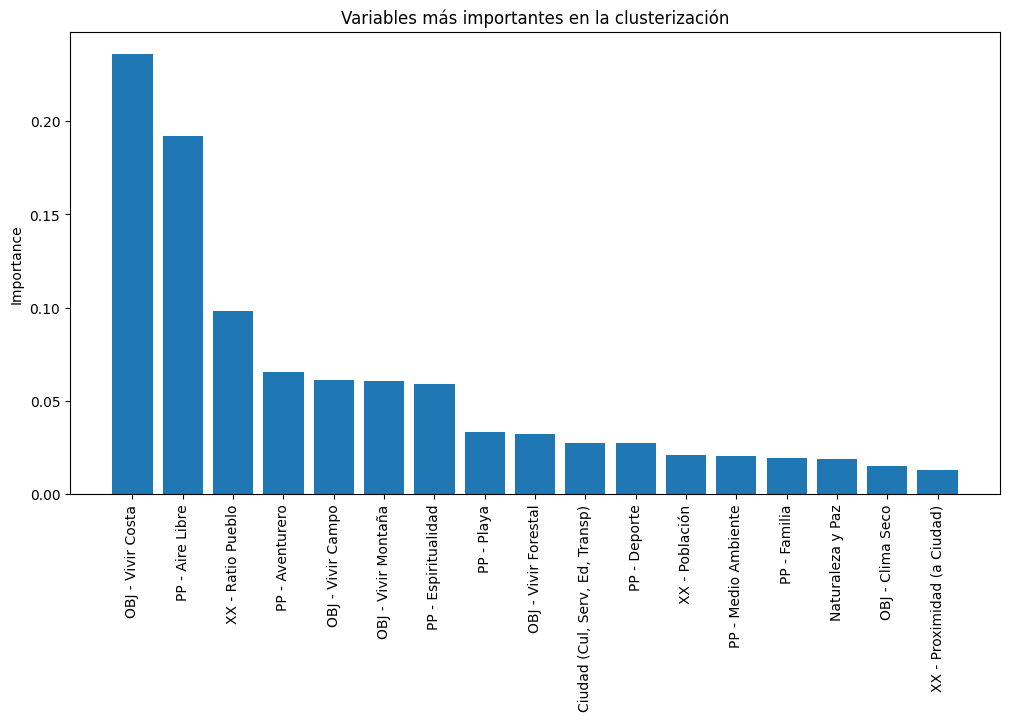

In [57]:
#OBJ_GB.rename(columns={'XX_OBJ_zona_clima2_seco':'OBJ - Clima Seco', 'OBJ_zona_vivir_costera': 'OBJ - Vivir Costa', 'OBJ_zona_vivir_montaña': 'OBJ - Vivir Montaña', 'OBJ_zona_vivir_forestal': 'OBJ - Vivir Forestal', 'OBJ_zona_vivir_campo': 'OBJ - Vivir Campo', 'XX_OBJ_zona_población': 'XX - Población', 'XX_OBJ_zona_proximidad': 'XX - Proximidad (a Ciudad)', 'PP_sobre_ti_familia':'PP - Familia', 'PP_sobre_ti_aventurero':'PP - Aventurero', 'PP_sobre_ti_espiritualidad':'PP - Espiritualidad', 'PP_sobre_ti_MAmbiente':'PP - Medio Ambiente', 'PP_sobre_ti_playa':'PP - Playa', 'PP_sobre_ti_deporte':'PP - Deporte', 'PP_sobre_ti_aireLibre':'PP - Aire Libre', 'PUE_preferencias_entorno_naturalezaPaz':'Naturaleza y Paz', 'XX_PUE_ratioPueblo':'XX - Ratio Pueblo', 'XX_PUE_preferencias_entorno_ciudad_CSET':'Ciudad (Cultura, Servicios, E, Transporte)'}, inplace=True)


# Sort the DataFrame by descending importance
OBJ_GB_sorted = OBJ_GB.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(OBJ_GB_sorted['characteristics'], OBJ_GB_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Importance')
plt.title('Variables más importantes en la clusterización')
plt.show()
## Select the most important features
#OBJ_GB_top = OBJ_GB_sorted.head(6)['characteristics'].tolist()
#
## Get the values of the most important characteristics for each group
#OBJ_GB_groupValues = OBJ_[['OBJ_cluster_labels'] + OBJ_GB_top]
#
## Group by cluster and get feature values for each group
#OBJ_GB_groupedValues = OBJ_GB_groupValues.groupby('OBJ_cluster_labels').mean().reset_index()
#OBJ_GB_groupedValues

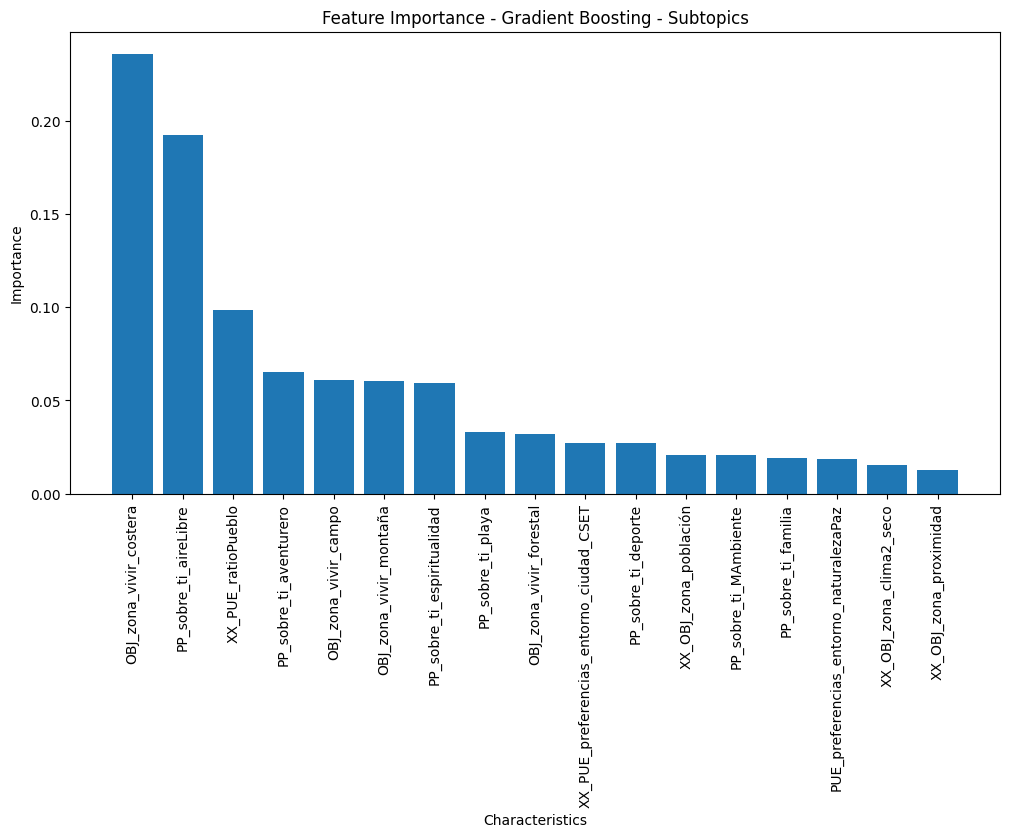

OBJ_cluster_labels  OBJ_zona_vivir_costera  PP_sobre_ti_aireLibre   
0                   0                0.333333               0.888889  \
1                   1                0.000000               0.047619   
2                   2                0.583333               1.000000   
3                   3                1.000000               0.080000   

   XX_PUE_ratioPueblo  PP_sobre_ti_aventurero  OBJ_zona_vivir_campo   
0            0.581699                0.833333              0.055556  \
1            0.420568                0.238095              0.285714   
2            0.668768                0.583333              0.750000   
3            0.367731                0.240000              0.000000   

   OBJ_zona_vivir_montaña  
0                0.833333  
1                0.428571  
2                0.166667  
3                0.200000

In [633]:
##########PP_ocupación.rename(columns={'PP_ocupación_estudiante':'Estudiante', 'PP_ocupación_empleadoCompleto': 'Empleado Completo', 'PP_ocupación_empleadoParcial': 'Empleado Parcial', 'PP_ocupación_autónomo': 'Autónomo', 'PP_ocupación_desempleado': 'Desempleado', 'PP_ocupación_juvilado': 'Juvilado', 'PP_ocupación_nómadaD': 'Nómada Digital'}, inplace=True)


# Sort the DataFrame by descending importance
OBJ_GB_sorted = OBJ_GB.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(OBJ_GB_sorted['characteristics'], OBJ_GB_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - Gradient Boosting - Subtopics')
plt.show()
# Select the most important features
OBJ_GB_top = OBJ_GB_sorted.head(6)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
OBJ_GB_groupValues = OBJ_[['OBJ_cluster_labels'] + OBJ_GB_top]

# Group by cluster and get feature values for each group
OBJ_GB_groupedValues = OBJ_GB_groupValues.groupby('OBJ_cluster_labels').mean().reset_index()
OBJ_GB_groupedValues

- OBJ_zona_vivir_costera
- PP_sobre_ti_aireLibre: Aficiones al aire libre (senderismo, camping, etc.)
- XX_PUE_ratioPueblo: 1 = pueblo, 0 = ciudad
- PP_sobre_ti_aventurero: Me considero aventurero / intrépido y disfruto de experiencias emocionantes
- OBJ_zona_vivir_campo
- OBJ_zona_vivir_montaña
- PP_sobre_ti_espiritualidad: La espiritualidad o religión desempeñan un papel importante en mi vida
- PP_sobre_ti_playa: Antes playa que montaña
- OBJ_zona_vivir_forestal
- PUE_preferencias_entorno_ciudad_CSET: Disfruto de las opciones culturales y de entretenimiento, servicios, educación y transporte que ofrece la vida en la ciudad (1)
- PP_sobre_ti_deporte: Practico deporte regularmente
- XX_OBJ_zona_población: 0 = ciudad, 1 = pueblo
- PP_sobre_ti_MAmbiente: Me preocupa el medio ambiente
- PP_sobre_ti_familia: La familia como parte fundamental en mi vida
- PUE_preferencias_entorno_naturalezaPaz: Me siento en paz en espacios naturales como bosques o campos
- XX_OBJ_zona_clima2_seco: 0 = húmedo, 1 = seco
- XX_OBJ_zona_proximidad: 0 = cerca de ciudad, 1 = lejos

################################### VARIABLES ELIMINADES

- OBJ_zona_temperatura_caliente:
- OBJ_zona_temperatura_cualquiera: 
- PP_sobre_ti_vivir: Vivir para trabajar
- OBJ_zona_vivir_noSeguro
- OBJ_zona_temperatura_frio
- OBJ_zona_temperatura_medio
- PP_sobre_ti_social: Le doy mucha importancia a las actividades sociales
- PP_sobre_ti_tecnología: Afición a la tecnología
- OBJ_zona_clima_estable
- PP_sobre_ti_minimalista: Me considero minimalista en mi estilo de vida
- PUE_preferencias_entorno_ciudadArquitectura: Encuentro inspiración en la arquitectura urbana y la vida en la ciudad

# 4 DecisionTreeClassifier

In [266]:
#param_grid = {
#    'criterion': ['gini', 'entropy', 'log_loss'],# The function to measure the quality of a split
#    'splitter': ['best', 'random'],# The strategy used to choose the split at each node
#    'max_depth': [2],# The maximum depth of the tree
#    'min_samples_split': [2, 3, 4, 5, 6, 7, 8],# The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3, 5, 6],# The minimum number of samples required to be at a leaf node
##    'min_weight_fraction_leaf': [0.0, 0.001],# The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
#    'max_features': ['sqrt', 'log2', None],# The number of features to consider when looking for the best split
##    'max_leaf_nodes': [None, 3, 5],# Grow trees with max_leaf_nodes in best-first fashion
##    'min_impurity_decrease': [0.0, 0.05, 0.01, 0.1],# A node will be split if this split induces a decrease of the impurity greater than or equal to this value
#    'random_state': [42],# Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'class_weight': ['balanced', None],# Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one
##    'ccp_alpha': [0.0, 0.05, 0.01, 0.1],# Complexity parameter used for Minimal Cost-Complexity Pruning
#}
# [0.75       1.         0.86666667 0.73333333 0.8       ]
#Mean cross-validation score: 0.8300000000000001
#Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
#Best score: 0.8300000000000001

In [267]:
#param_grid = {
#    'criterion': ['gini', 'entropy', 'log_loss'],# The function to measure the quality of a split
#    'splitter': ['best', 'random'],# The strategy used to choose the split at each node
#    'max_depth': [2],# The maximum depth of the tree
#    'min_samples_split': [2, 3, 4, 5, 6, 7, 8],# The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3, 5, 6],# The minimum number of samples required to be at a leaf node
#    'min_weight_fraction_leaf': [0.0, 0.001, 0.1],# The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
#    'max_features': ['sqrt', 'log2', None],# The number of features to consider when looking for the best split
#    'max_leaf_nodes': [None, 3, 5],# Grow trees with max_leaf_nodes in best-first fashion
#    'min_impurity_decrease': [0.0, 0.001, 0.1],# A node will be split if this split induces a decrease of the impurity greater than or equal to this value
#    'random_state': [42],# Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'class_weight': ['balanced', None],# Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one
#    'ccp_alpha': [0.0, 0.001, 0.1],# Complexity parameter used for Minimal Cost-Complexity Pruning
#}
# [0.75       1.         0.86666667 0.73333333 0.8       ]
#Mean cross-validation score: 0.8300000000000001
#Best parameters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
#Best score: 0.8300000000000001

In [268]:
#tree_model = DecisionTreeClassifier()
#grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)
#
#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print("#",cv_scores)
#print("#Mean cross-validation score:", mean_cv_score)
#
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("#Best parameters:", best_params)
#print("#Best score:", best_score)

In [276]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 1000
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
models_list = []

# Perform the training and evaluation process in each iteration
for iteration in range(num_iterations):
    # Divide the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    models_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Create an instance of the Decision Tree model with the best hyperparameters found
        #Best parameters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
        tree_model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini', max_depth=2, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.01, random_state=iteration, splitter='best')

        # Train the model
        tree_model.fit(X_train, y_train)
        
        # Get the feature importance
        feature_importances_iteration.append(tree_model.feature_importances_)
        
        # Realize predictions in the test set and calculate the model accuracy
        y_pred = tree_model.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
        
        # Store the model
        models_iteration.append(tree_model)
    
    # Calculate the mean feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    models_list.append(models_iteration)

# Find the index of the best model based on the highest accuracy
best_model_index = np.argmax(accuracy_list)

# Select the best model based on the highest accuracy
best_tree_model = models_list[best_model_index][0]

# Transformar los valores de y a strings
y_str = y.astype(str)

#print accuracy
print("accuracy:",accuracy_list[best_model_index])

# Export the best decision tree in DOT format
dot_data = export_graphviz(best_tree_model, out_file=None, feature_names=X.columns, class_names=y_str.unique(), filled=True, rounded=True, special_characters=True)

# Create the tree graph using graphviz
graph = graphviz.Source(dot_data)

# Show the tree graph
graph.render("DT_MD2")  # Save the tree graph as PDF
graph.view()  # Show the tree graph

#tree_model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=2, max_features=None, max_leaf_nodes=7, min_impurity_decrease=0.0, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=iteration, splitter='best')
#accuracy: 0.8550000000000001

#tree_model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini', max_depth=2, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=iteration, splitter='best')
#accuracy: 0.8975


accuracy: 0.8975


'DT_MD2.pdf'

In [279]:
hola = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
hola['comparación']=hola['y_pred']==hola['y_test']
hola['comparación'].value_counts()

comparación
True     13
False     2
Name: count, dtype: int64

In [280]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 1000
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
models_list = []

# Perform the training and evaluation process in each iteration
for iteration in range(num_iterations):
    # Divide the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    models_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Create an instance of the Decision Tree model with the best hyperparameters found
        #Best parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
        tree_model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=3, max_features=None, max_leaf_nodes=7, min_impurity_decrease=0.0, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=iteration, splitter='best')

        # Train the model
        tree_model.fit(X_train, y_train)
        
        # Get the feature importance
        feature_importances_iteration.append(tree_model.feature_importances_)
        
        # Realize predictions in the test set and calculate the model accuracy
        y_pred = tree_model.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
        
        # Store the model
        models_iteration.append(tree_model)
    
    # Calculate the mean feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    models_list.append(models_iteration)

# Find the index of the best model based on the highest accuracy
best_model_index = np.argmax(accuracy_list)

# Select the best model based on the highest accuracy
best_tree_model = models_list[best_model_index][0]

# Transformar los valores de y a strings
y_str = y.astype(str)

#print accuracy
print("accuracy:",accuracy_list[best_model_index])

# Export the best decision tree in DOT format
dot_data = export_graphviz(best_tree_model, out_file=None, feature_names=X.columns, class_names=y_str.unique(), filled=True, rounded=True, special_characters=True)

# Create the tree graph using graphviz
graph = graphviz.Source(dot_data)

# Show the tree graph
graph.render("DT_MD3")  # Save the tree graph as PDF
graph.view()  # Show the tree graph

#tree_model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=3, max_features=None, max_leaf_nodes=7, min_impurity_decrease=0.0, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=iteration, splitter='best')
#accuracy: 0.9233333333333335

accuracy: 0.9233333333333335


'DT_MD3.pdf'

In [281]:
hola = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
hola['comparación']=hola['y_pred']==hola['y_test']
hola['comparación'].value_counts()

comparación
True     12
False     3
Name: count, dtype: int64

Cómo se interpreta el gráfico: importante saber que se trata de 1 arbol como los que ha heco rf, pero no son las conclusiones de entre todos ellos

sport_leavingHome ≤ 0.5: Esta es la condición que se evalúa en este nodo del árbol. Significa que si el valor de la característica "sport_leavingHome" es menor o igual a 0.5, se sigue por el camino izquierdo (hijo izquierdo), de lo contrario, se sigue por el camino derecho (hijo derecho) del árbol.

gini = 0.661: El índice de impureza de Gini es una medida de qué tan mezclados están los registros en el nodo. En este caso, el valor de Gini es 0.661, lo que indica una cierta impureza en el nodo, es decir, los registros no están completamente homogéneos en términos de su clasificación en los grupos/clústeres.

samples = 153: Este es el número de registros de la muestra que llegan a este nodo en particular.

value = [60, 44, 49]: Esta es la distribución de las clases o grupos en el nodo. Los valores [60, 44, 49] indican la cantidad de registros pertenecientes a cada grupo/clúster. En este caso, hay 60 registros en el grupo 0, 44 registros en el grupo 1 y 49 registros en el grupo 2.

class = 2: Esta es la clase mayoritaria en el nodo, es decir, el grupo/clúster al que pertenecen la mayoría de los registros en este nodo. En este caso, la clase mayoritaria es el grupo 2.

En resumen, este nodo del árbol de decisión divide los registros según la característica "sport_leavingHome" y proporciona información sobre la impureza de los registros en el nodo, el número de registros en el nodo, la distribución de las clases y la clase mayoritaria en el nodo.